## *Crop Production: Exploratory Data Analysis*

In [1]:
## Data soruce:- https://data.world/thatzprem/agriculture-india

## *Data Preparation and Cleaning* 

#### *Importing required Libraries*

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [3]:
df = pd.read_csv("crop_production.csv")

In [4]:
df.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

##### *Dimensions of the dataset is 246091 rows and 7 columns*

In [5]:
df.shape

(246091, 7)

*Out of seven variables, we have four categorical variables(State_Name,District_Name, Season and Crop type) and three continuous variables in float(Area and Production) and integer(Crop_Year) format.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


##### *Checking Missing Data*

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
3730/246091

0.015156994770227274

In [9]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [10]:
df.shape

(242361, 7)

In [11]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [13]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [14]:
df['Production'].isna().sum()


0

In [15]:
df['State_Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Andaman and Nicobar Islands
1         Andaman and Nicobar Islands
2         Andaman and Nicobar Islands
3         Andaman and Nicobar Islands
4         Andaman and Nicobar Islands
                     ...             
246086                    West Bengal
246087                    West Bengal
246088                    West Bengal
246089                    West Bengal
246090                    West Bengal
Name: State_Name, Length: 242361, dtype: object>

<AxesSubplot:>

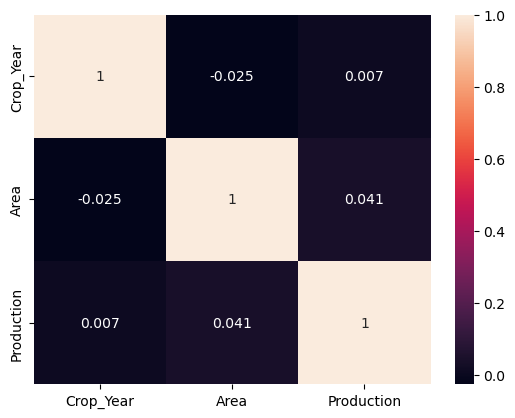

In [16]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [18]:
df.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [19]:
df.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [20]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

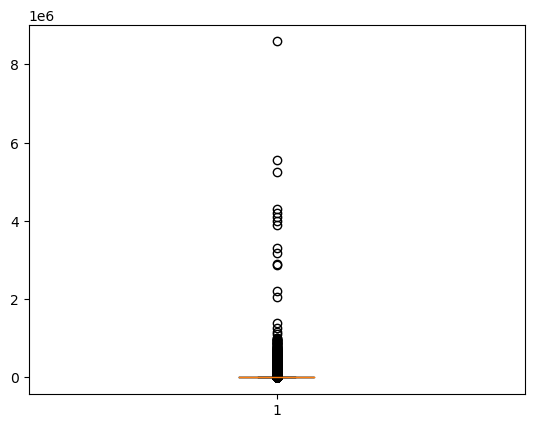

In [21]:
plt.boxplot(df.Area);

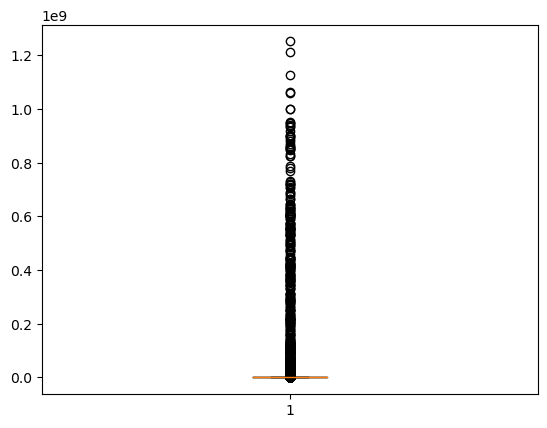

In [22]:
plt.boxplot(df.Production);

In [23]:
df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production')

C:\Users\david\AppData\Local\Temp\ipykernel_20572\509777669.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production')


State_Name    Production
5                    Chandigarh  6.395650e+04
20                      Mizoram  1.661540e+06
7        Dadra and Nagar Haveli  1.847871e+06
26                       Sikkim  2.435735e+06
18                      Manipur  5.230917e+06
2             Arunachal Pradesh  6.823913e+06
13                    Jharkhand  1.077774e+07
19                    Meghalaya  1.211250e+07
29                      Tripura  1.252292e+07
21                     Nagaland  1.276595e+07
12           Jammu and Kashmir   1.329102e+07
11             Himachal Pradesh  1.780517e+07
6                  Chhattisgarh  1.009519e+08
31                  Uttarakhand  1.321774e+08
22                       Odisha  1.609041e+08
25                    Rajasthan  2.813203e+08
28                   Telangana   3.351479e+08
4                         Bihar  3.664836e+08
10                      Haryana  3.812739e+08
23                   Puducherry  3.847245e+08
16               Madhya Pradesh  4.488407e+08
8                           Goa  5.057558e+08
9                       Gujarat  5.242913e+08
24                       Punjab  5.863850e+08
0   Andaman and Nicobar Islands  7.182232e+08
14                    Karnataka  8.634298e+08
17                  Maharashtra  1.263641e+09
32                  West Bengal  1.397904e+09
3                         Assam  2.111752e+09
30                Uttar Pradesh  3.234493e+09
27                   Tamil Nadu  1.207644e+10
1                Andhra Pradesh  1.732459e+10
15                       Kerala  9.788005e+10

<AxesSubplot:xlabel='Production', ylabel='State_Name'>

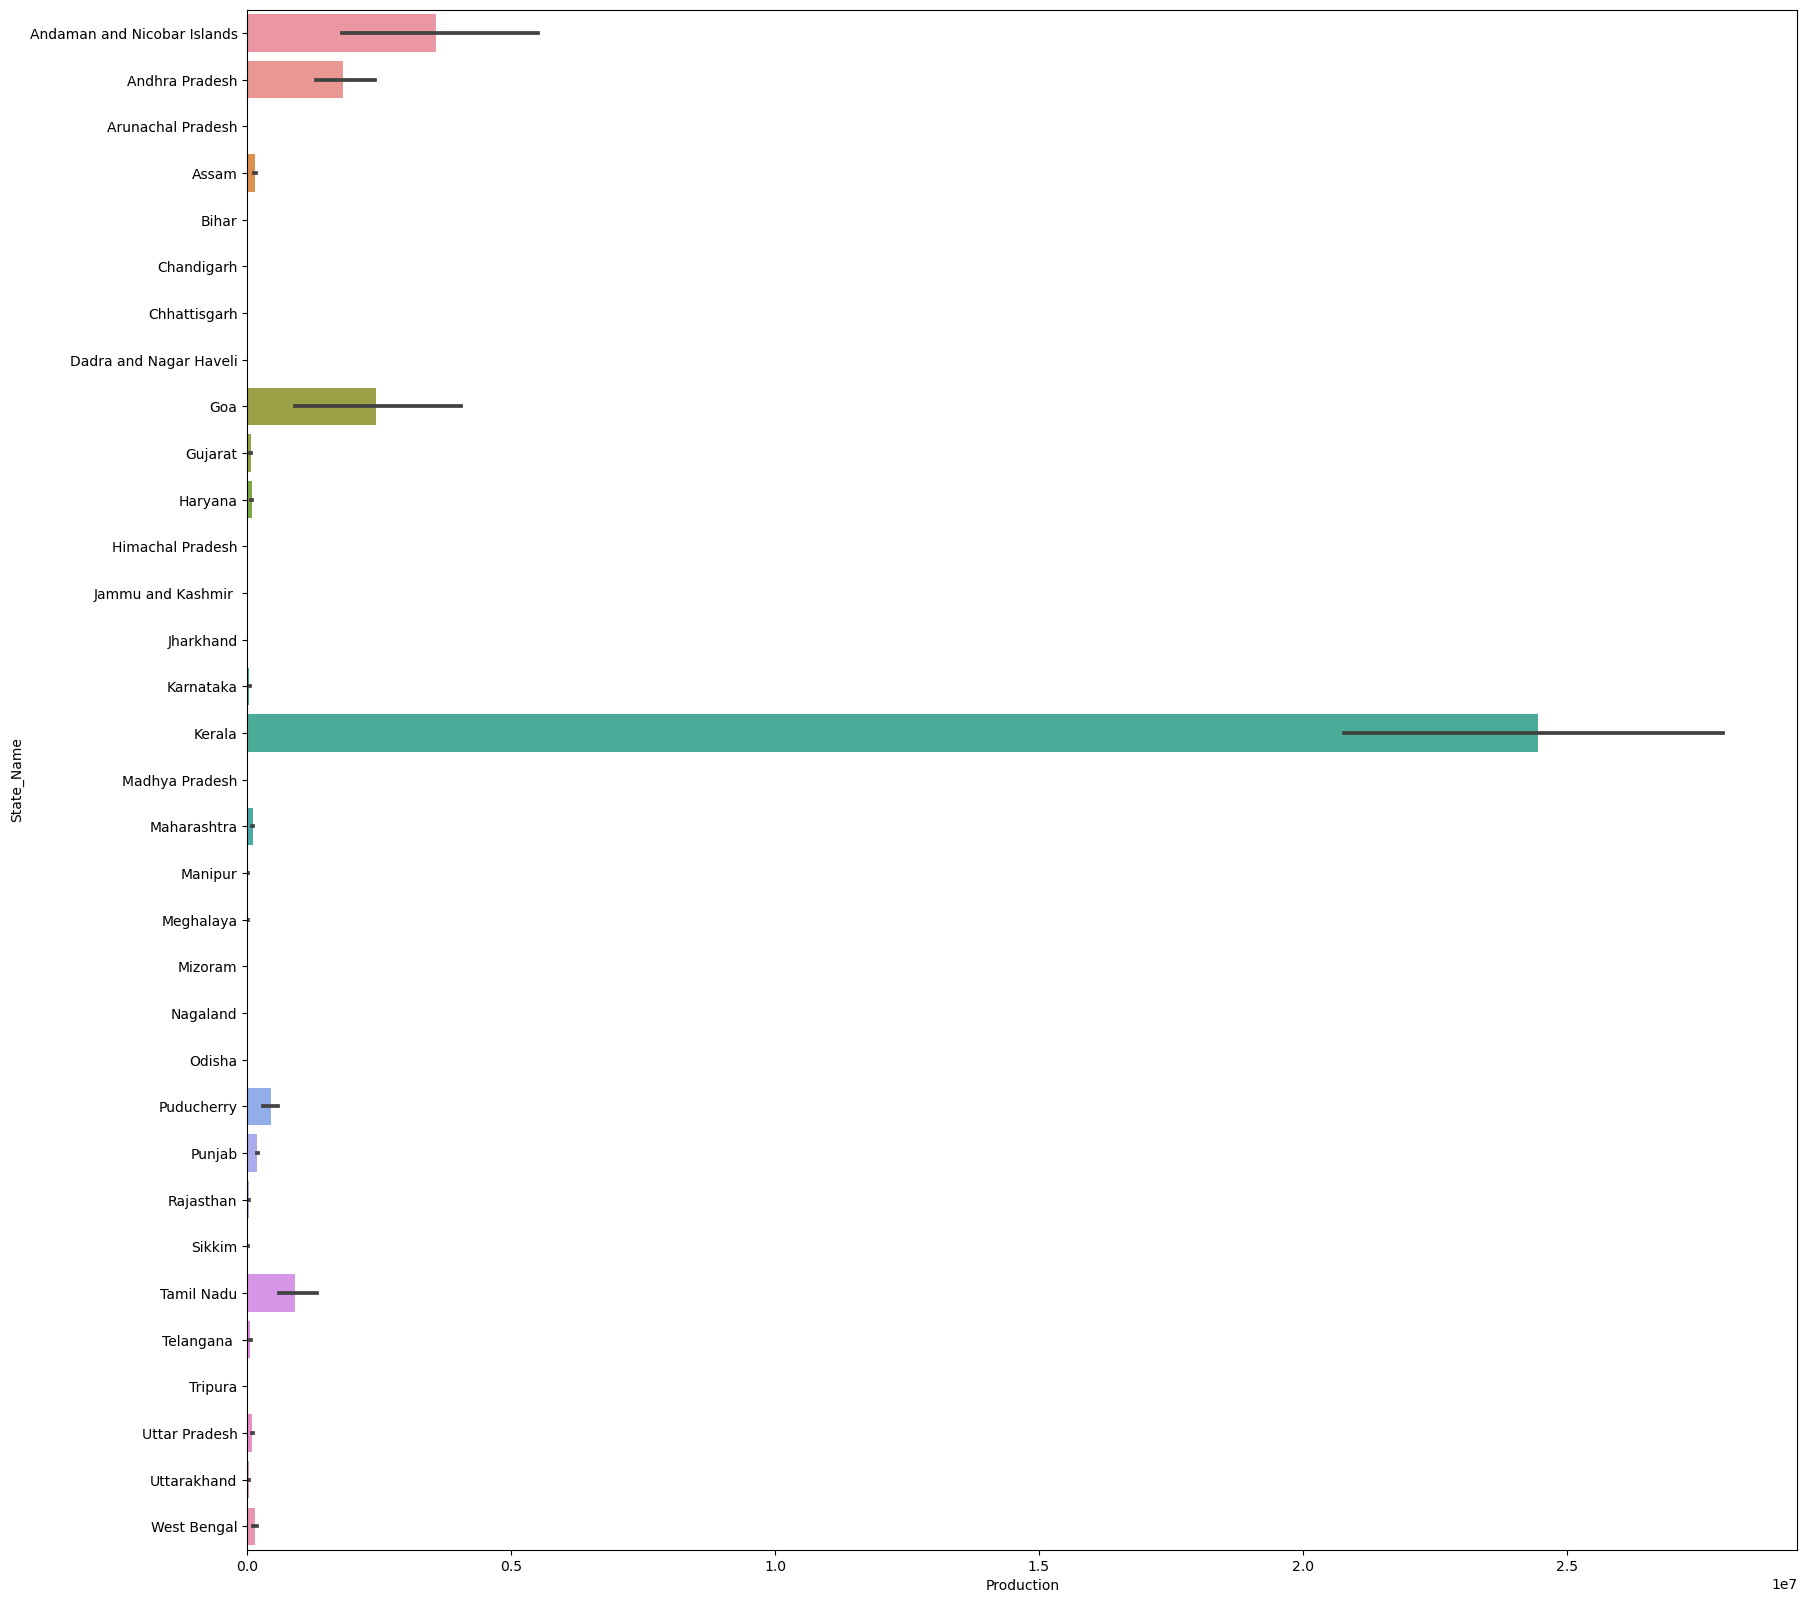

In [24]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['Production'],y= df["State_Name"])

In [25]:
# import plotly.express as px
# # data_canada = px.data.gapminder().query("country == 'Canada'")
# fig = px.bar(df,x='Production',y='State_Name')
# fig.show()


In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [28]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [29]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip() in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip() in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip() in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip() in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip() in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip() in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [30]:
df['Zones']=df.apply(get_zonal_names,axis=1)

In [31]:
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [32]:
df.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

In [33]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [34]:
def cat_crop(crop):
    if crop['Crop'] in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        value ='Cereal'

    elif crop['Crop'] in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        value ='Pulses'

    elif crop['Crop'] in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        value ='Fruits'

    elif crop['Crop'] in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        value ='Beans'

    elif crop['Crop'] in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
        value ='Vegetables'

    elif crop['Crop'] in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        value ='spices'
        
    elif crop['Crop'] in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        value = 'fibres'
        
    elif crop['Crop'] in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        value ='Nuts'
        
    elif crop['Crop'] in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        value = 'oilseeds'
        
    else :
        value = 'Commercial'
        
    return value


In [35]:
df['Crop_type'] = df.apply(cat_crop,axis=1)

In [36]:
df['Crop_type'].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
Commercial    23062
spices        21638
Nuts          11472
fibres         9785
Beans          9115
Fruits         6153
Name: Crop_type, dtype: int64

<AxesSubplot:xlabel='Zones', ylabel='Production'>

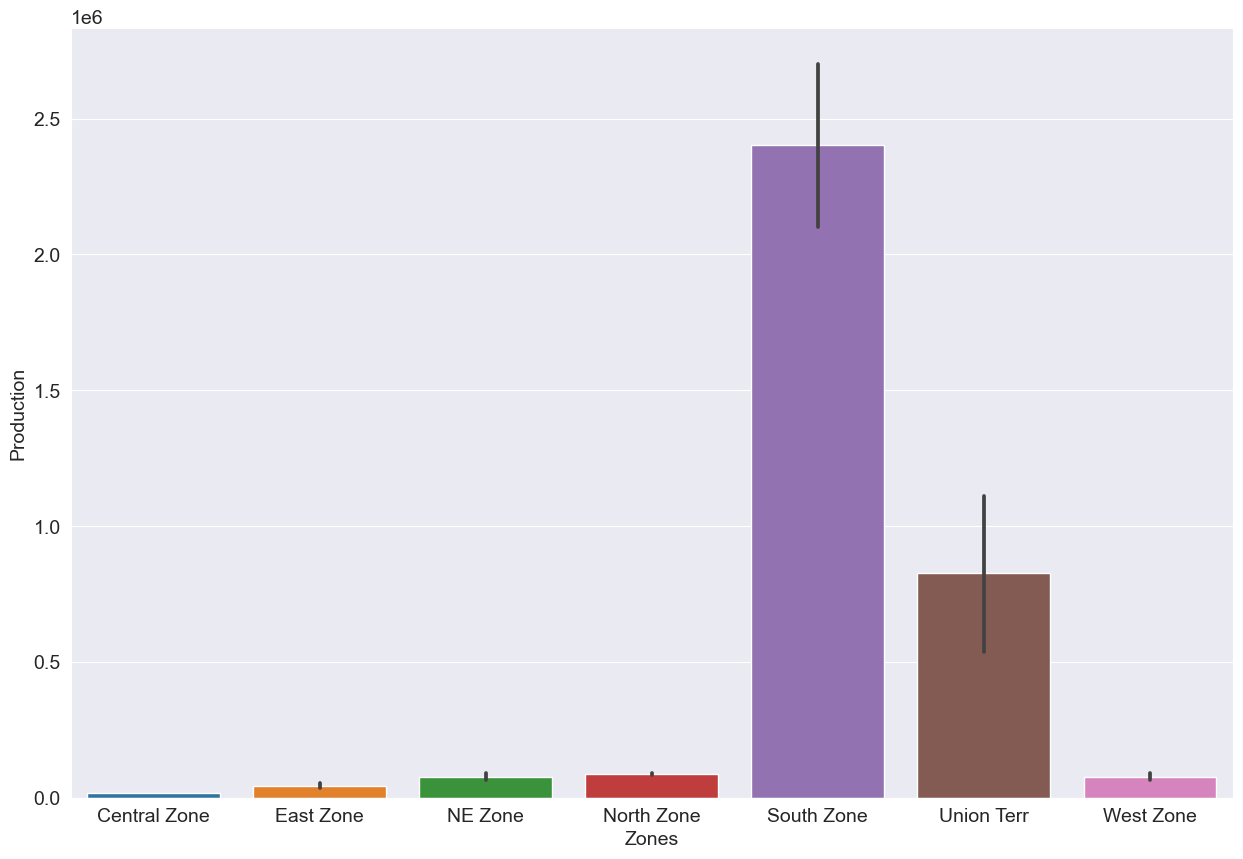

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x= df.Zones.sort_values(ascending=True), y=df.Production)

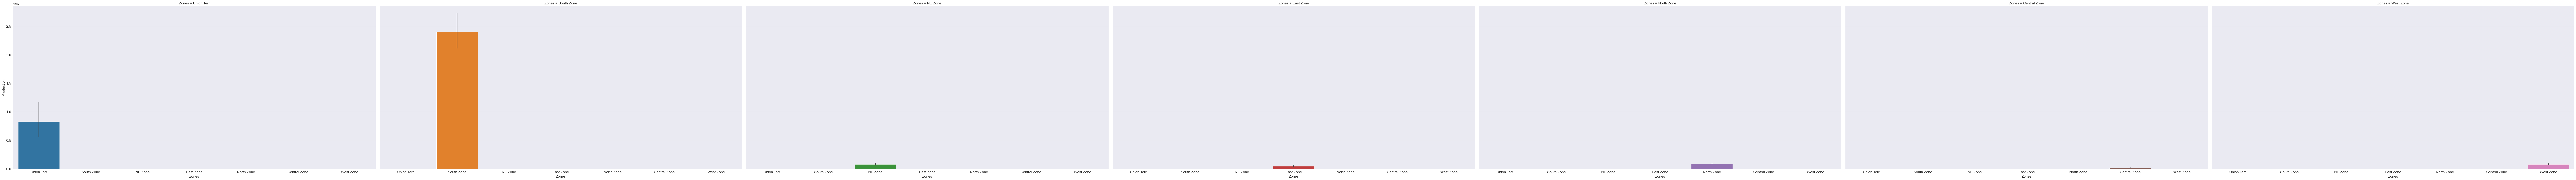

In [38]:

sns.catplot(
data=df, x='Zones', y="Production", col="Zones",
kind="bar", height=10, aspect=2,
)
sns.set(rc={'figure.figsize':(100,500)})

In [39]:
crop_type_production=dict(df['Crop_type'].value_counts())
crops =list(crop_type_production.keys())
crop_prod =list(crop_type_production.values())

In [40]:
print(crops,crop_prod)

['Cereal', 'Pulses', 'oilseeds', 'Vegetables', 'Commercial', 'spices', 'Nuts', 'fibres', 'Beans', 'Fruits'] [63283, 40898, 33801, 23154, 23062, 21638, 11472, 9785, 9115, 6153]


<AxesSubplot:>

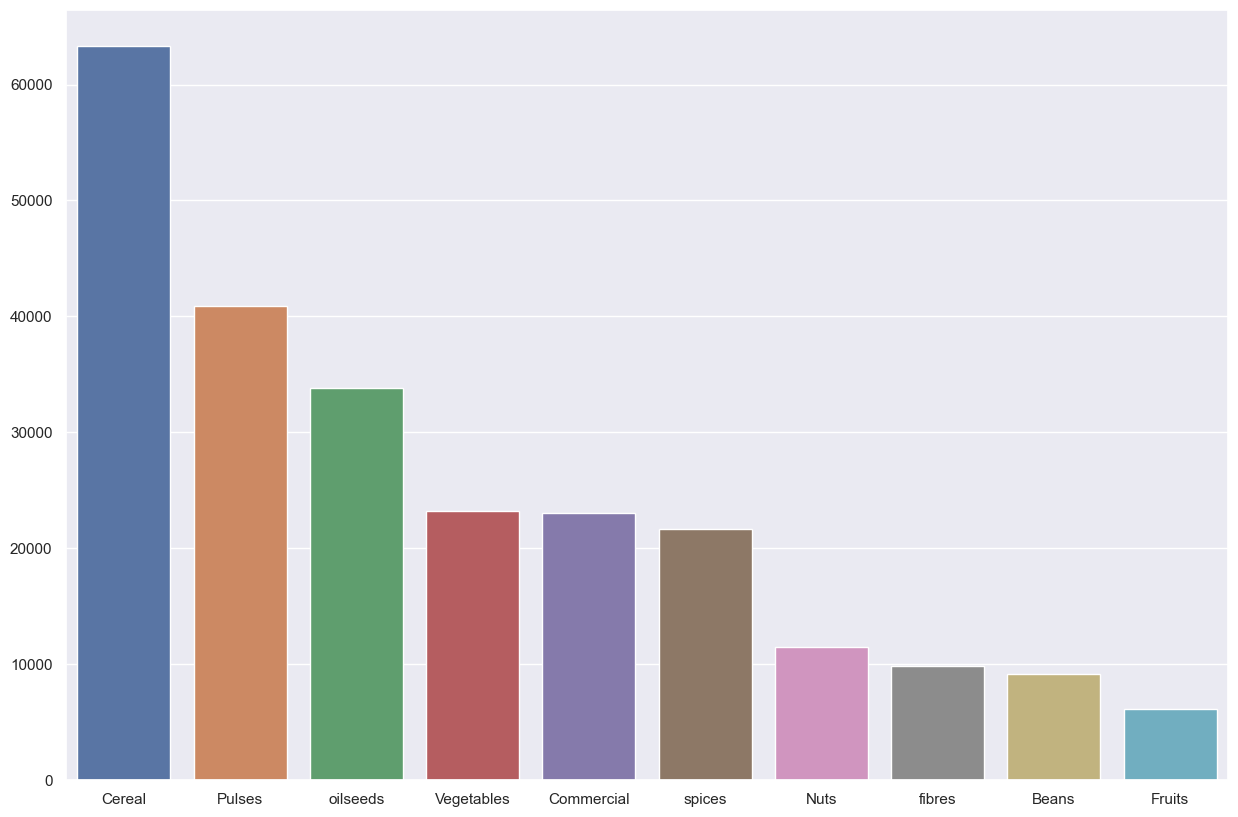

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=crops,y=crop_prod)

In [42]:
crop_production = dict(df.groupby('Crop_type')['Production'].sum())
crops =list(crop_production.keys())
crop_prod =list(crop_production.values())

In [43]:
df.groupby('Crop_type')['Production'].sum()

Crop_type
Beans         1.624564e+08
Cereal        3.594987e+09
Commercial    1.355485e+11
Fruits        1.717526e+08
Nuts          1.359093e+08
Pulses        2.084907e+08
Vegetables    6.230645e+08
fibres        4.914495e+08
oilseeds      1.864416e+08
spices        5.305029e+07
Name: Production, dtype: float64

In [44]:
crop_production

{'Beans': 162456381.4,
 'Cereal': 3594987220.22,
 'Commercial': 135548514610.33,
 'Fruits': 171752605.64,
 'Nuts': 135909313.09,
 'Pulses': 208490682.41,
 'Vegetables': 623064525.71,
 'fibres': 491449493.76,
 'oilseeds': 186441643.79,
 'spices': 53050291.04}

In [45]:
print(crops,crop_prod)

['Beans', 'Cereal', 'Commercial', 'Fruits', 'Nuts', 'Pulses', 'Vegetables', 'fibres', 'oilseeds', 'spices'] [162456381.4, 3594987220.22, 135548514610.33, 171752605.64, 135909313.09, 208490682.41, 623064525.71, 491449493.76, 186441643.79, 53050291.04]


<AxesSubplot:>

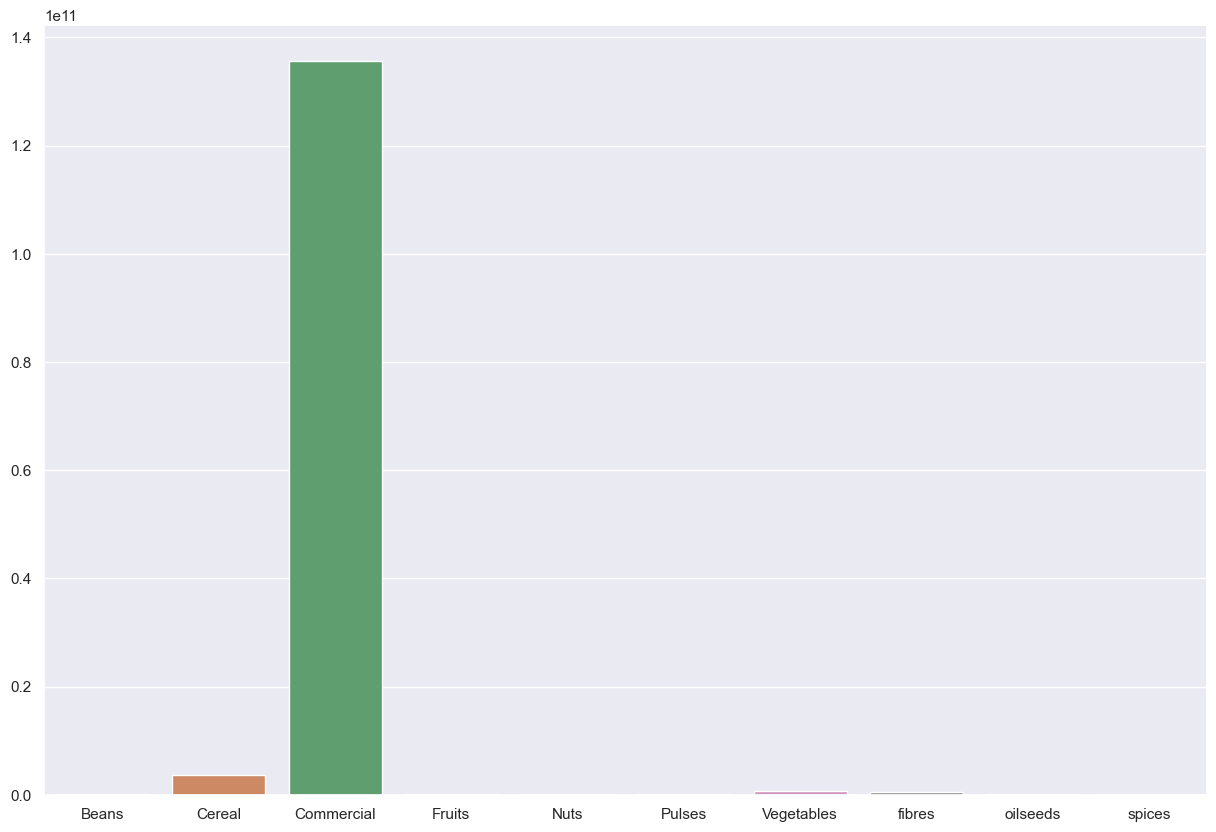

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=crops,y=crop_prod)

In [47]:
Season_production = dict(df.groupby('Season')['Production'].sum())
Seasons =list(Season_production.keys())
Season_prod =list(Season_production.values())

In [48]:
Season_prod

[64413768.22,
 4029970242.7,
 2051687553.08,
 170657925.03,
 134424837450.19,
 434549828.17]

(0.0, 134424837450.19)

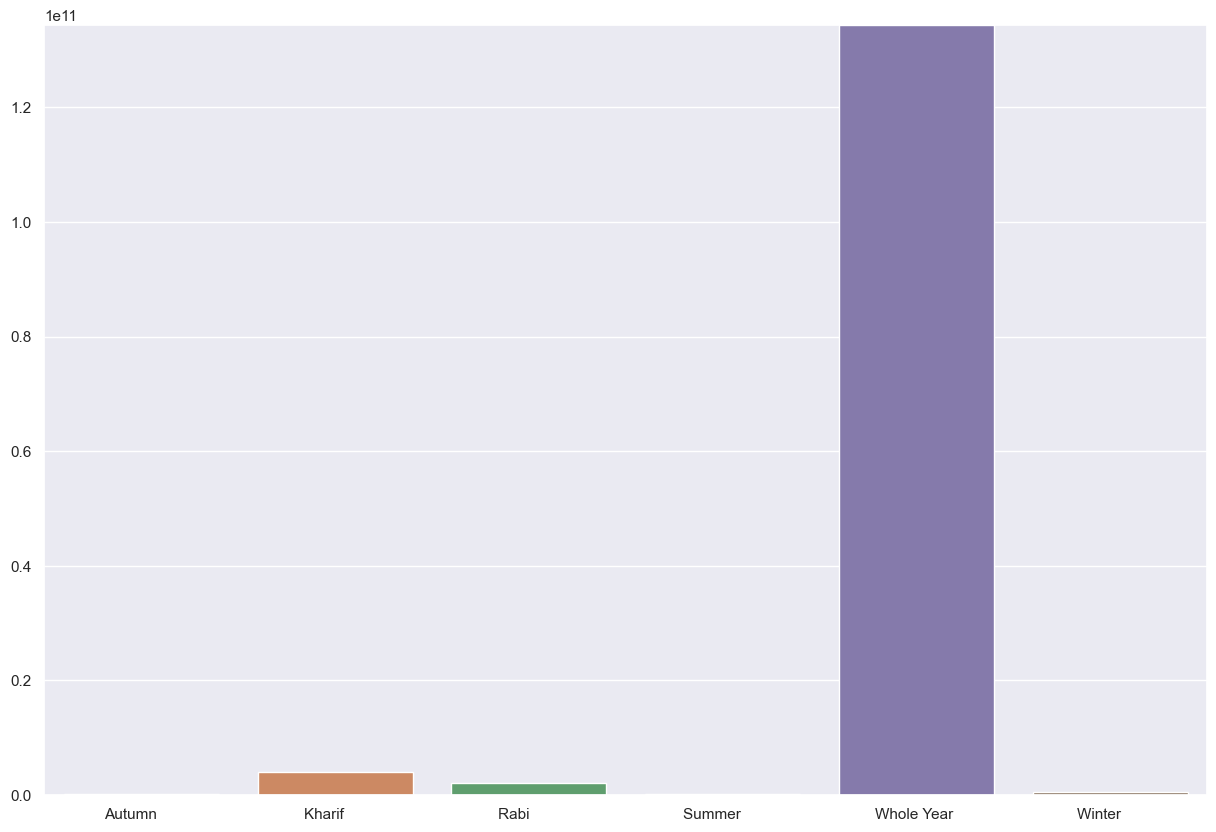

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=Seasons,y=Season_prod)
plt.ylim(0, 134424837450.19)

In [50]:
Season_production = dict(df.groupby('Season')['Production'].sum())
Seasons =list(Season_production.keys())
Season_prod =list(Season_production.values())

In [51]:
Seasons = Seasons[:4]
Seasons.append('Winter')
Seasons

['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Winter']

In [52]:
Season_prod = Season_prod[:4]
Season_prod.append(434549828.17)
Season_prod 

[64413768.22, 4029970242.7, 2051687553.08, 170657925.03, 434549828.17]

In [53]:
print(Seasons,Season_prod)

['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Winter'] [64413768.22, 4029970242.7, 2051687553.08, 170657925.03, 434549828.17]


<AxesSubplot:>

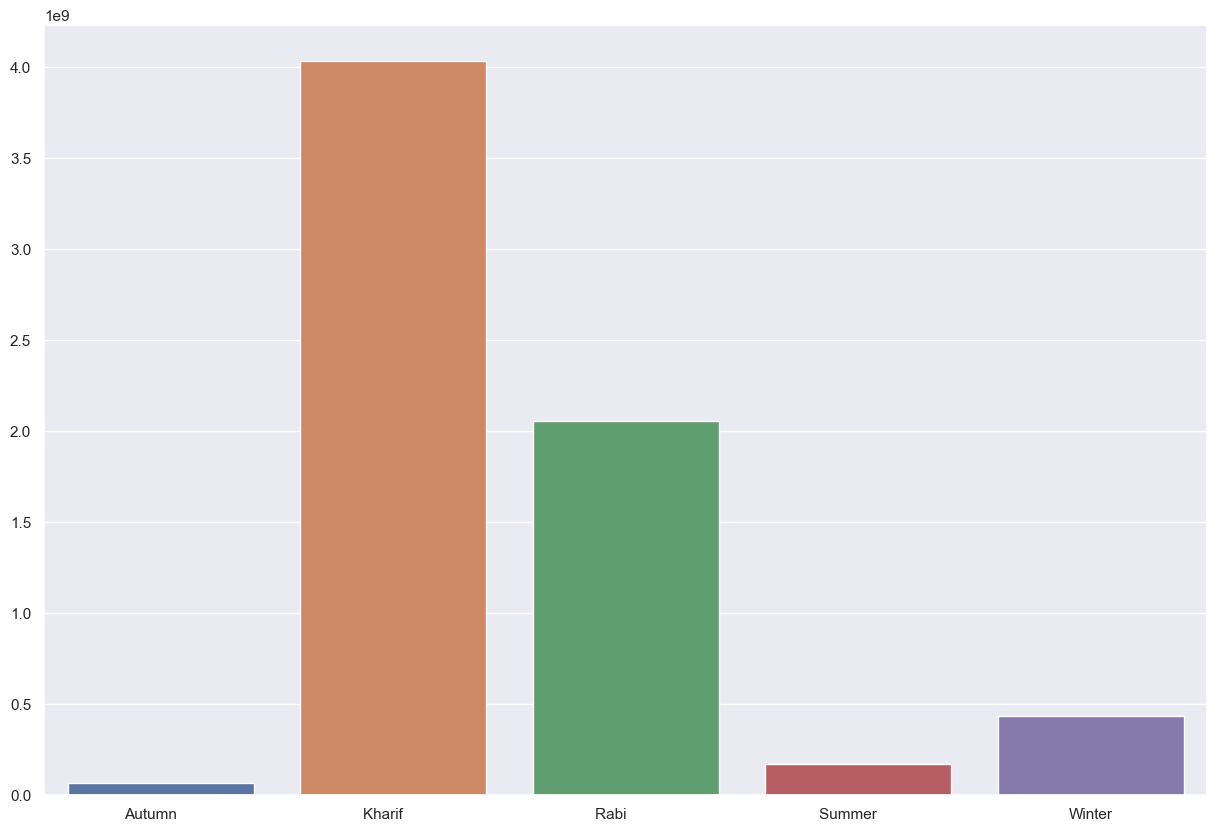

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=Seasons,y=Season_prod)

In [55]:
df[df['Crop_type']=='Commercial']

State_Name District_Name  Crop_Year       Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
...                             ...           ...        ...          ...   
246040                  West Bengal       PURULIA       2013  Rabi          
246051                  West Bengal       PURULIA       2013  Whole Year    
246063                  West Bengal       PURULIA       2014  Kharif        
246078                  West Bengal       PURULIA       2014  Rabi          
246088                  West Bengal       PURULIA       2014  Whole Year    

                     Crop     Area  Production       Zones   Crop_type  
5                Coconut   18168.0  65100000.0  Union Terr  Commercial  
7               Sugarcane      1.0         2.0  Union Terr  Commercial  
14               Coconut   18190.0  64430000.0  Union Terr  Commercial  
16              Sugarcane      1.0         1.0  Union Terr  Commercial  
23               Coconut   18240.0  67490000.0  Union Terr  Commercial  
...                   ...      ...         ...         ...         ...  
246040  Moong(Green Gram)     61.0        41.0   East Zone  Commercial  
246051          Sugarcane    161.0      7948.0   East Zone  Commercial  
246063  Moong(Green Gram)    181.0       100.0   East Zone  Commercial  
246078  Moong(Green Gram)     64.0        40.0   East Zone  Commercial  
246088          Sugarcane    324.0     16250.0   East Zone  Commercial  

[23062 rows x 9 columns]

In [56]:
crop_year_production = dict(df.groupby('Crop_Year')['Production'].sum())
crops =list(crop_production.keys())
crop_year_prod =list(crop_production.values())

In [57]:
print(crops,crop_year_prod)

['Beans', 'Cereal', 'Commercial', 'Fruits', 'Nuts', 'Pulses', 'Vegetables', 'fibres', 'oilseeds', 'spices'] [162456381.4, 3594987220.22, 135548514610.33, 171752605.64, 135909313.09, 208490682.41, 623064525.71, 491449493.76, 186441643.79, 53050291.04]


<AxesSubplot:>

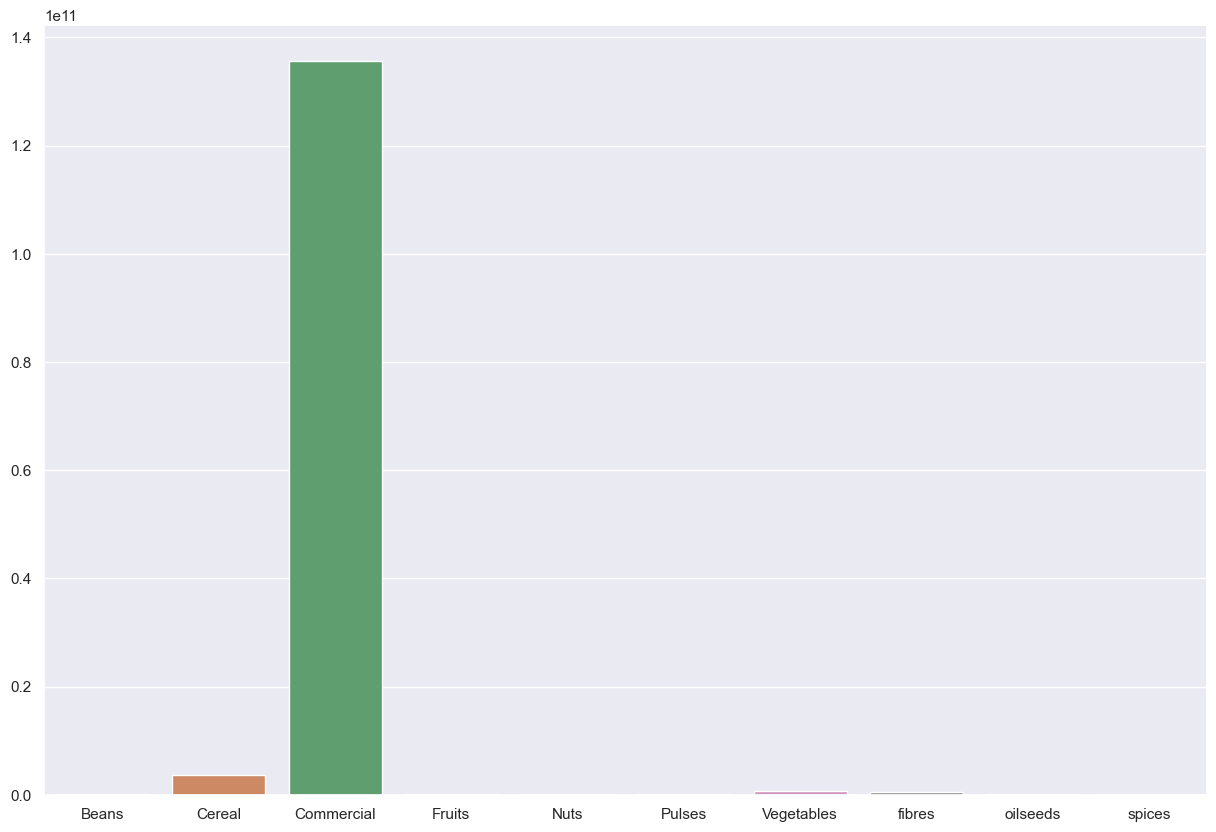

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=crops,y=crop_year_prod)

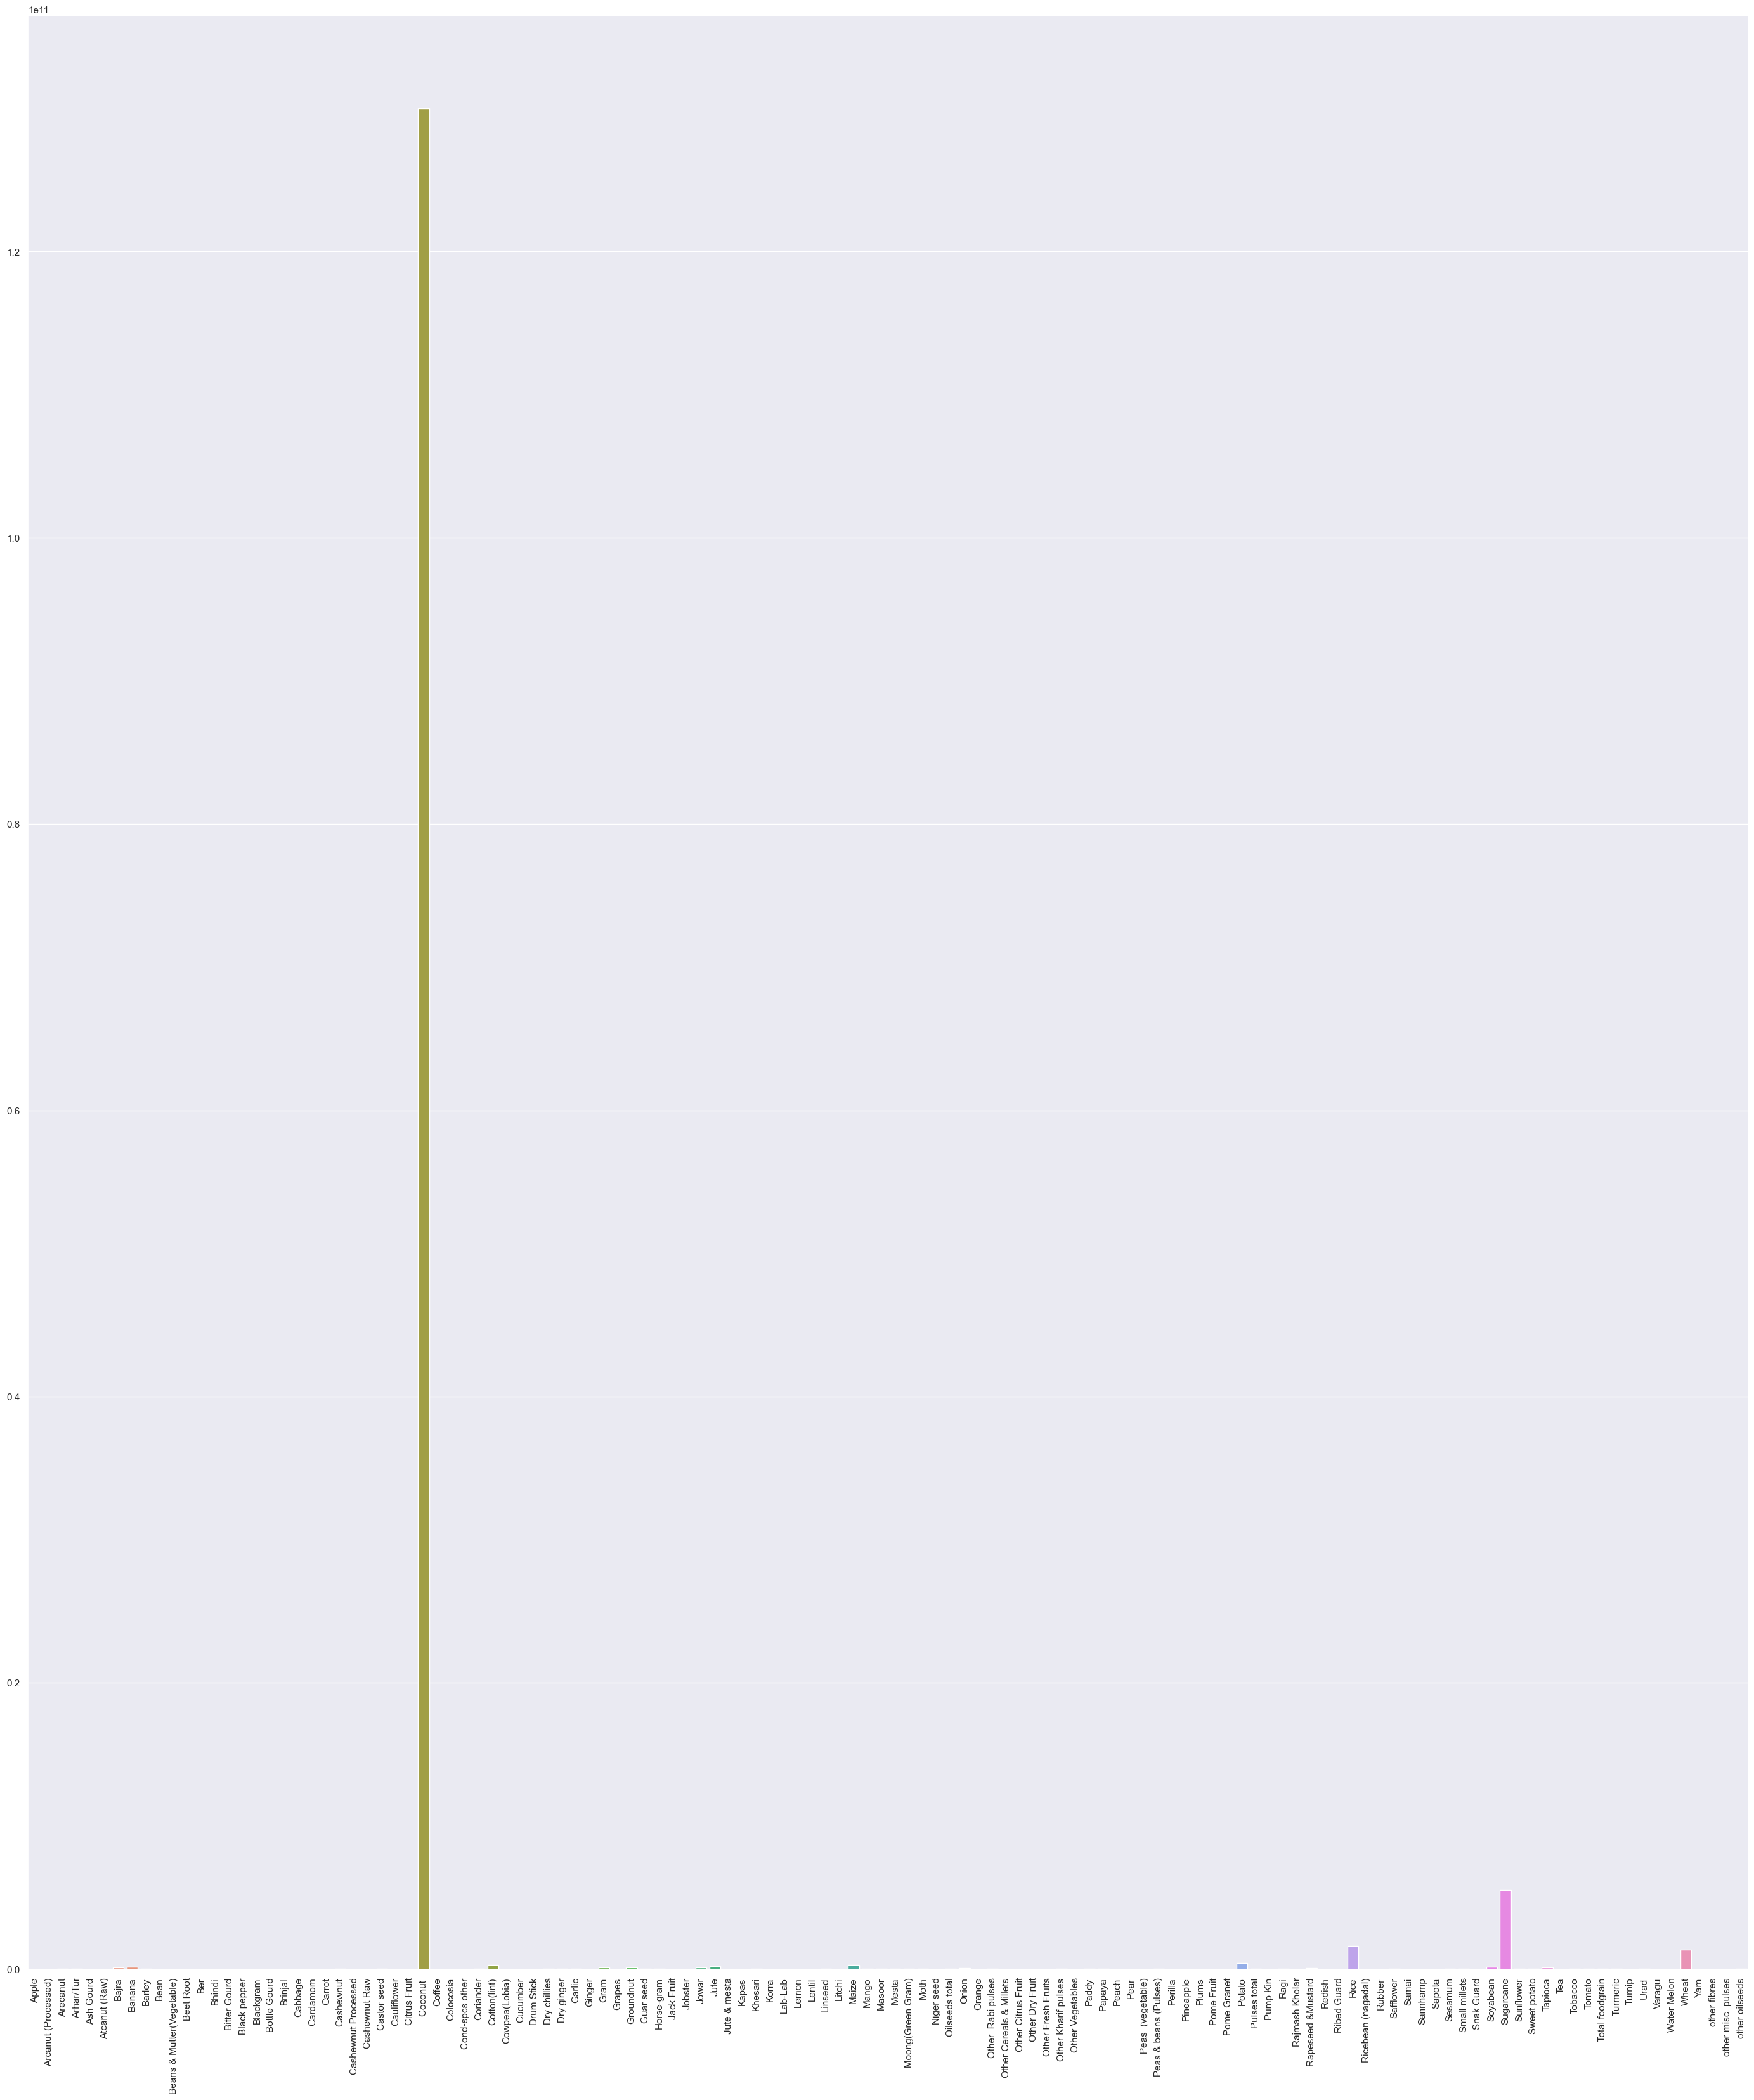

In [59]:
crop_production = dict(df.groupby('Crop')['Production'].sum())
crops =list(crop_production.keys())
crop_prod =list(crop_production.values())
fig, ax = plt.subplots(figsize=(35,40))
sns.barplot(x=crops,y=crop_prod)
plt.xticks(rotation=90)
plt.show()

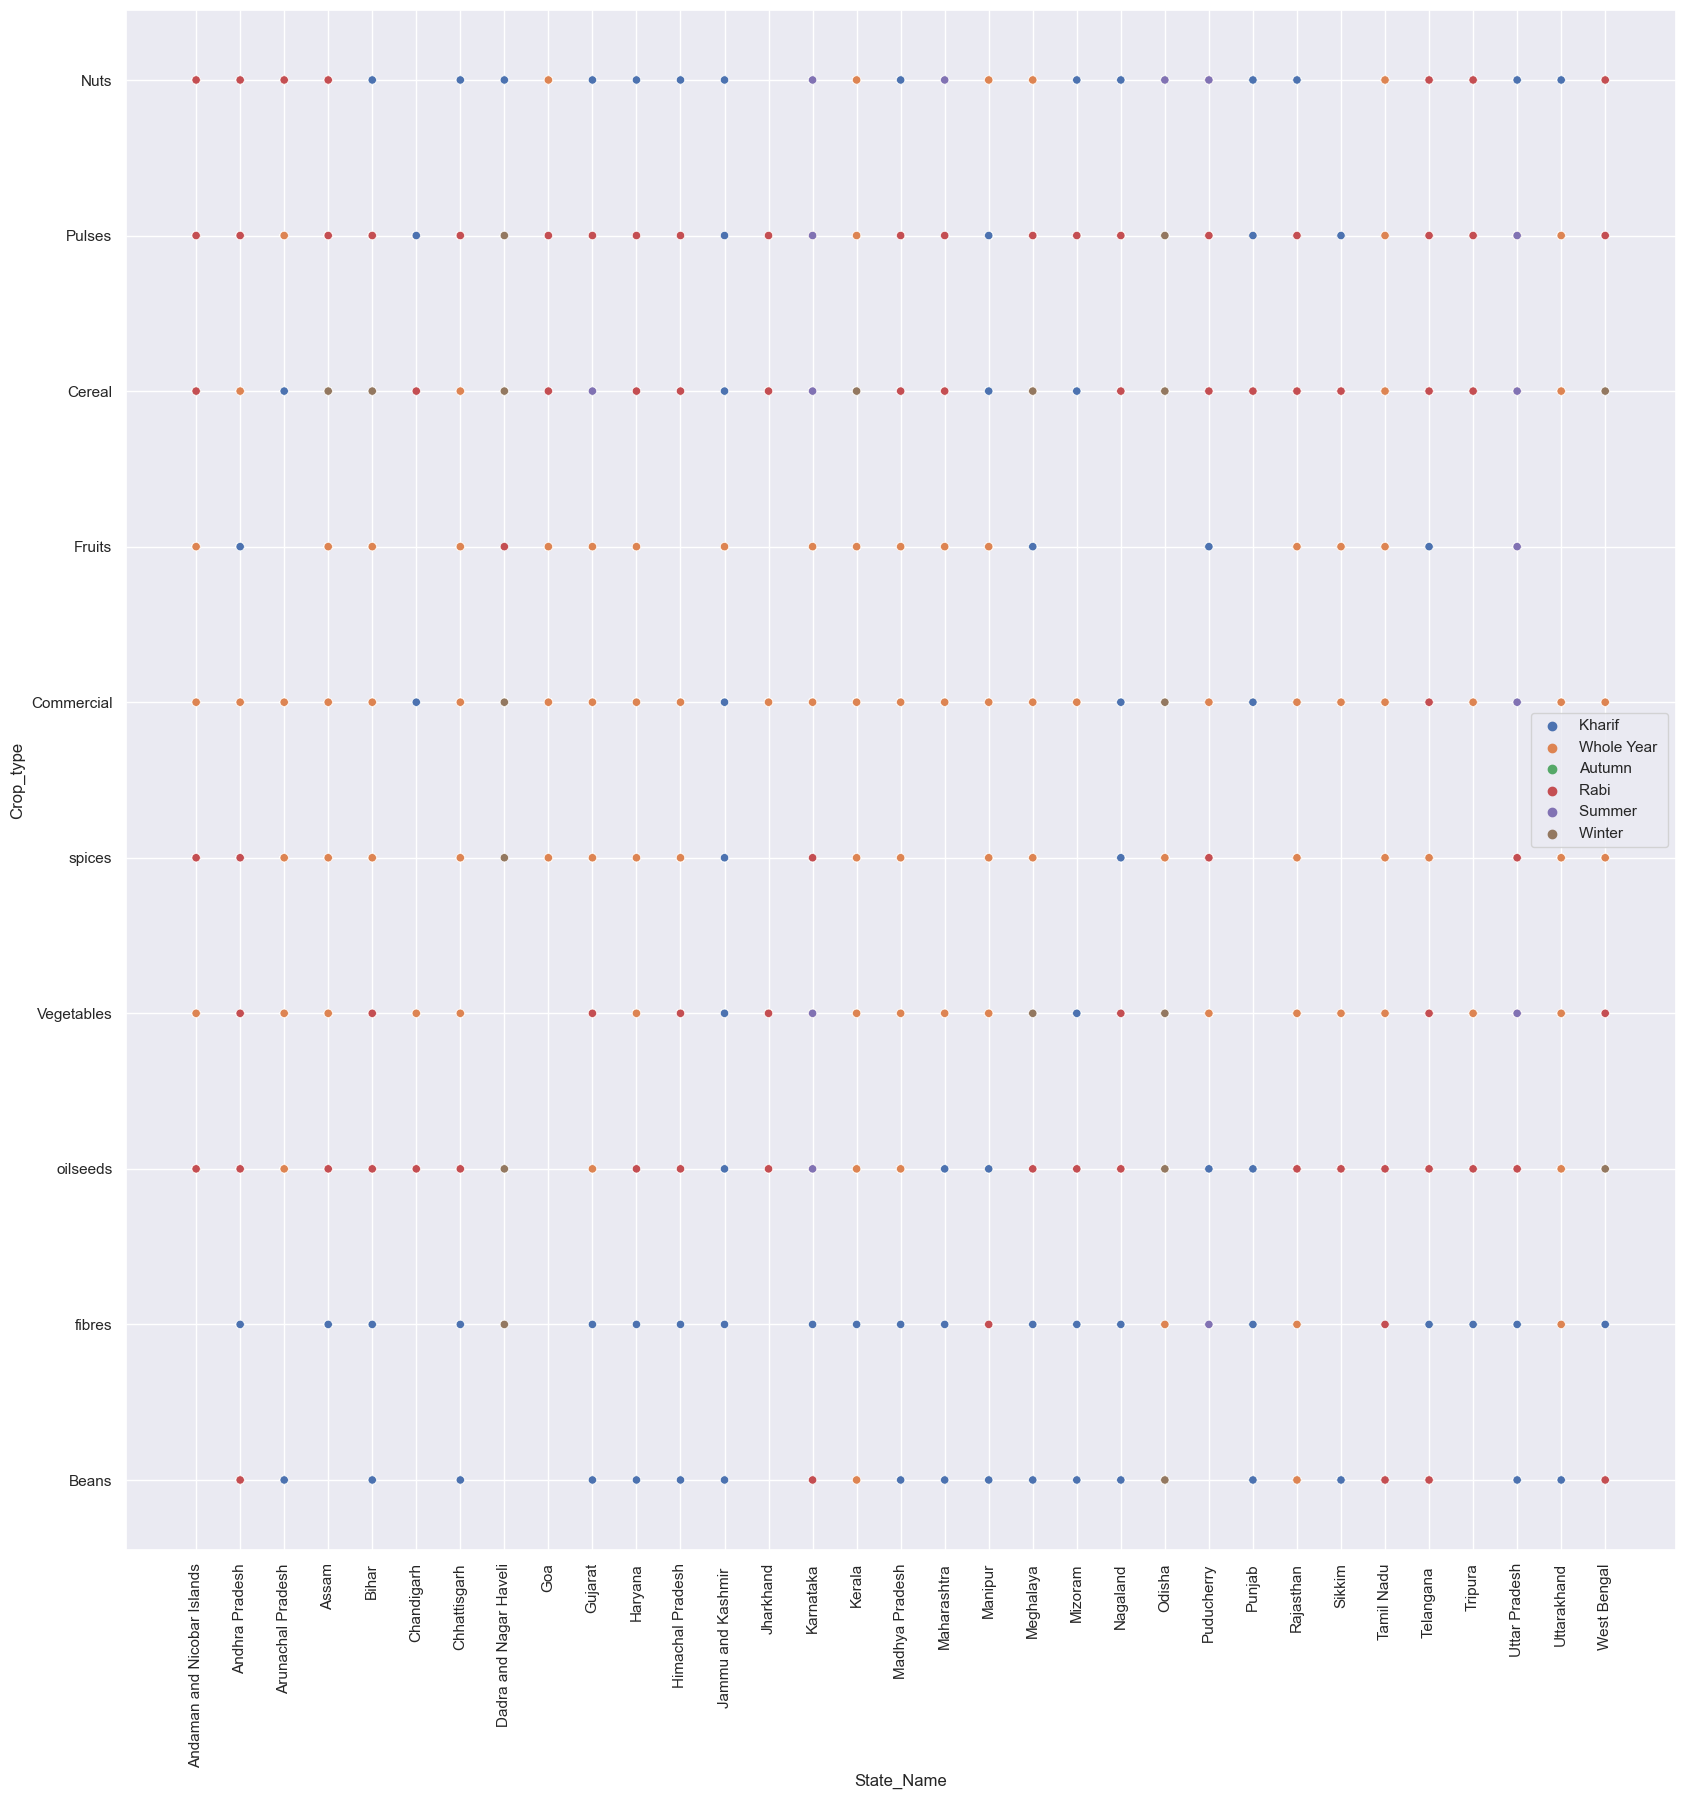

In [60]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df,x="State_Name",y="Crop_type",hue='Season')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [61]:
visual=pd.crosstab(df['State_Name'], df['Crop_type'])

In [62]:
visual

Crop_type                    Beans  Cereal  Commercial  Fruits  Nuts  Pulses  \
State_Name                                                                     
Andaman and Nicobar Islands      0      20          36      16    37       9   
Andhra Pradesh                 386    2264        1117     502   674    1336   
Arunachal Pradesh               26    1021         168       0    26      67   
Assam                            0    2952        1616     920   400    2234   
Bihar                          280    6108        1800     226   130    3731   
Chandigarh                       0      39           3       0     0      14   
Chhattisgarh                   646    1805         843     264   261    2087   
Dadra and Nagar Haveli           0     116          21       9     9      64   
Goa                              0      62          38      16    47      32   
Gujarat                        403    2466         794     157   683    1521   
Haryana                        108    1427         456      52   126     860   
Himachal Pradesh               179     726         135       0    54     530   
Jammu and Kashmir               12     562         132      24     7     307   
Jharkhand                        0     575          16       0     0     304   
Karnataka                     1096    5295        1753     598  1470    2776   
Kerala                           3     819         516     437   536      13   
Madhya Pradesh                 962    5115        1427     659   768    3993   
Maharashtra                    477    4009        1023      83   868    2326   
Manipur                         31     151          58     228     4     160   
Meghalaya                      113     606         182     162   143     314   
Mizoram                         42     230         151       0    15     213   
Nagaland                       211    1054         274       0   144     873   
Odisha                         629    3871        1668       0  1156    1760   
Puducherry                       0     198         145      73    98     101   
Punjab                         104    1123         431       0    75     728   
Rajasthan                      871    2634         997     257   444    2174   
Sikkim                          72     391           8       8     0     136   
Tamil Nadu                     479    2680        1513     992  1076    1466   
Telangana                      259    1365         589     201   338     882   
Tripura                          0     240         200       0   119     469   
Uttar Pradesh                 1112    9719        3567     269   958    6549   
Uttarakhand                    360    1423         185       0    76    1236   
West Bengal                    254    2217        1200       0   730    1633   

Crop_type                    Vegetables  fibres  oilseeds  spices  
State_Name                                                         
Andaman and Nicobar Islands          20       0        11      52  
Andhra Pradesh                     1046     333      1101     802  
Arunachal Pradesh                   257       0       343     637  
Assam                              1781    1284      2097    1338  
Bihar                              1775     924      2504    1396  
Chandigarh                           26       0         7       0  
Chhattisgarh                       1143     535      1496    1288  
Dadra and Nagar Haveli                0      13        30       1  
Goa                                   0       0         0      12  
Gujarat                             473     327      1029     512  
Haryana                             463     257       543     248  
Himachal Pradesh                    214      37       236     345  
Jammu and Kashmir                   196      44       233     115  
Jharkhand                           247       0       124       0  
Karnataka                          1763     605      3135    2588  
Kerala                              636    

<AxesSubplot:xlabel='State_Name'>

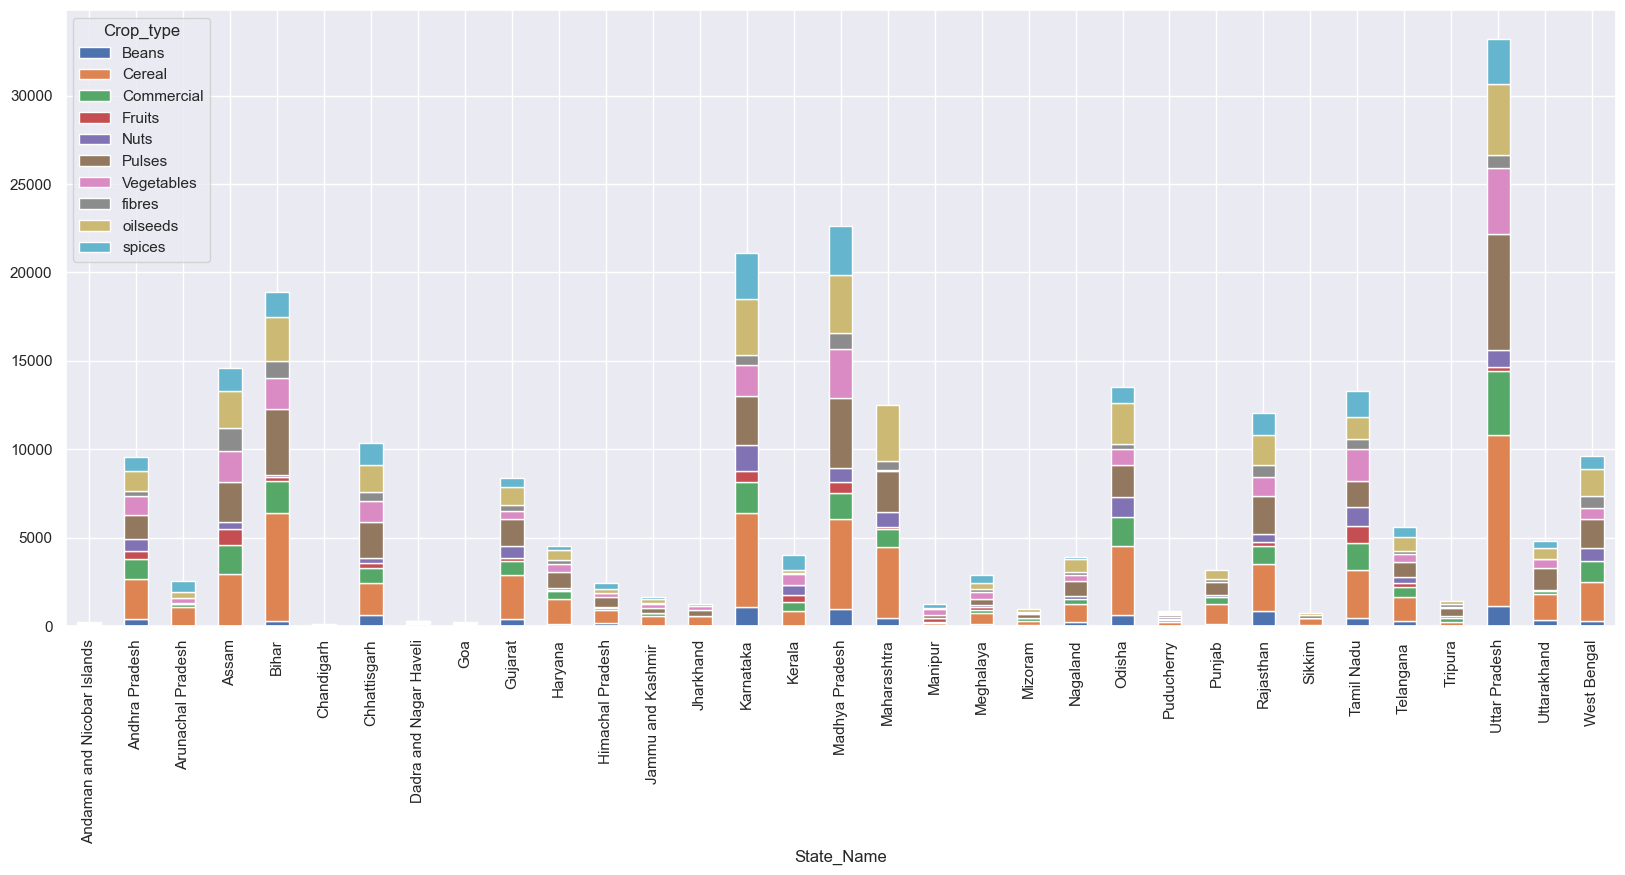

In [63]:
visual.plot(kind='bar', stacked=True, figsize = (20,8))

In [64]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production       Zones   Crop_type  
0                  Arecanut    1254.0      2000.0  Union Terr        Nuts  
1       Other Kharif pulses       2.0         1.0  Union Terr      Pulses  
2                      Rice     102.0       321.0  Union Terr      Cereal  
3                    Banana     176.0       641.0  Union Terr      Fruits  
4                 Cashewnut     720.0       165.0  Union Terr        Nuts  
...                     ...       ...         ...         ...         ...  
246086                 Rice     306.0       801.0   East Zone      Cereal  
246087              Sesamum     627.0       463.0   East Zone    oilseeds  
246088            Sugarcane     324.0     16250.0   East Zone  Commercial  
246089                 Rice  279151.0    597899.0   East Zone      Cereal  
246090              Sesamum     175.0        88.0   East Zone    oilseeds  

[242361 rows x 9 columns]

In [65]:
df.to_excel("crop_2.xlsx")

In [66]:
Kharif_crop = df[df['Season']=='Kharif     ']

In [67]:
Kharif_crop

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
10      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
11      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
...                             ...           ...        ...          ...   
246066                  West Bengal       PURULIA       2014  Kharif        
246067                  West Bengal       PURULIA       2014  Kharif        
246068                  West Bengal       PURULIA       2014  Kharif        
246069                  West Bengal       PURULIA       2014  Kharif        
246070                  West Bengal       PURULIA       2014  Kharif        

                       Crop     Area  Production       Zones Crop_type  
0                  Arecanut   1254.0      2000.0  Union Terr      Nuts  
1       Other Kharif pulses      2.0         1.0  Union Terr    Pulses  
2                      Rice    102.0       321.0  Union Terr    Cereal  
10                 Arecanut   1254.0      2061.0  Union Terr      Nuts  
11      Other Kharif pulses      2.0         1.0  Union Terr    Pulses  
...                     ...      ...         ...         ...       ...  
246066  Other Kharif pulses     79.0        39.0   East Zone    Pulses  
246067             Sannhamp    171.0       727.0   East Zone    fibres  
246068             Soyabean     18.0         7.0   East Zone     Beans  
246069            Sunflower     46.0        42.0   East Zone  oilseeds  
246070                 Urad  11493.0      3287.0   East Zone    Pulses  

[94283 rows x 9 columns]

In [68]:
Kharif_crop['Crop'].value_counts()

Maize        7170
Rice         6864
Arhar/Tur    6701
Sesamum      6305
Urad         5856
             ... 
Tea             8
Coriander       8
Linseed         7
Wheat           3
Khesari         1
Name: Crop, Length: 82, dtype: int64

In [69]:
kharif_dict =dict(Kharif_crop['Crop'].value_counts())
kharif_dict

{'Maize': 7170,
 'Rice': 6864,
 'Arhar/Tur': 6701,
 'Sesamum': 6305,
 'Urad': 5856,
 'Moong(Green Gram)': 5439,
 'Groundnut': 5298,
 'Jowar': 4975,
 'Bajra': 4630,
 'Small millets': 4121,
 'Cotton(lint)': 3844,
 'Other Kharif pulses': 3541,
 'Soyabean': 3074,
 'Castor seed': 2866,
 'Sunflower': 2521,
 'Ragi': 2429,
 'Horse-gram': 2061,
 'Niger seed': 1880,
 'Mesta': 1691,
 'Dry ginger': 1360,
 'Jute': 1290,
 'Dry chillies': 1278,
 'Sugarcane': 1159,
 'Sannhamp': 867,
 'Moth': 764,
 'Sweet potato': 752,
 'Onion': 627,
 'Potato': 564,
 'Guar seed': 529,
 'Peas & beans (Pulses)': 350,
 'Other Cereals & Millets': 349,
 'Tapioca': 294,
 'Cowpea(Lobia)': 238,
 'other oilseeds': 238,
 'Tobacco': 177,
 'Papaya': 147,
 'Turmeric': 134,
 'Barley': 134,
 'Banana': 131,
 'Total foodgrain': 125,
 'Korra': 117,
 'Rapeseed &Mustard': 105,
 'Orange': 104,
 'Gram': 99,
 'Masoor': 80,
 'Ginger': 76,
 'Pulses total': 70,
 'Samai': 67,
 'Paddy': 61,
 'Oilseeds total': 61,
 'Cashewnut': 57,
 'Mango': 55,
 

<AxesSubplot:>

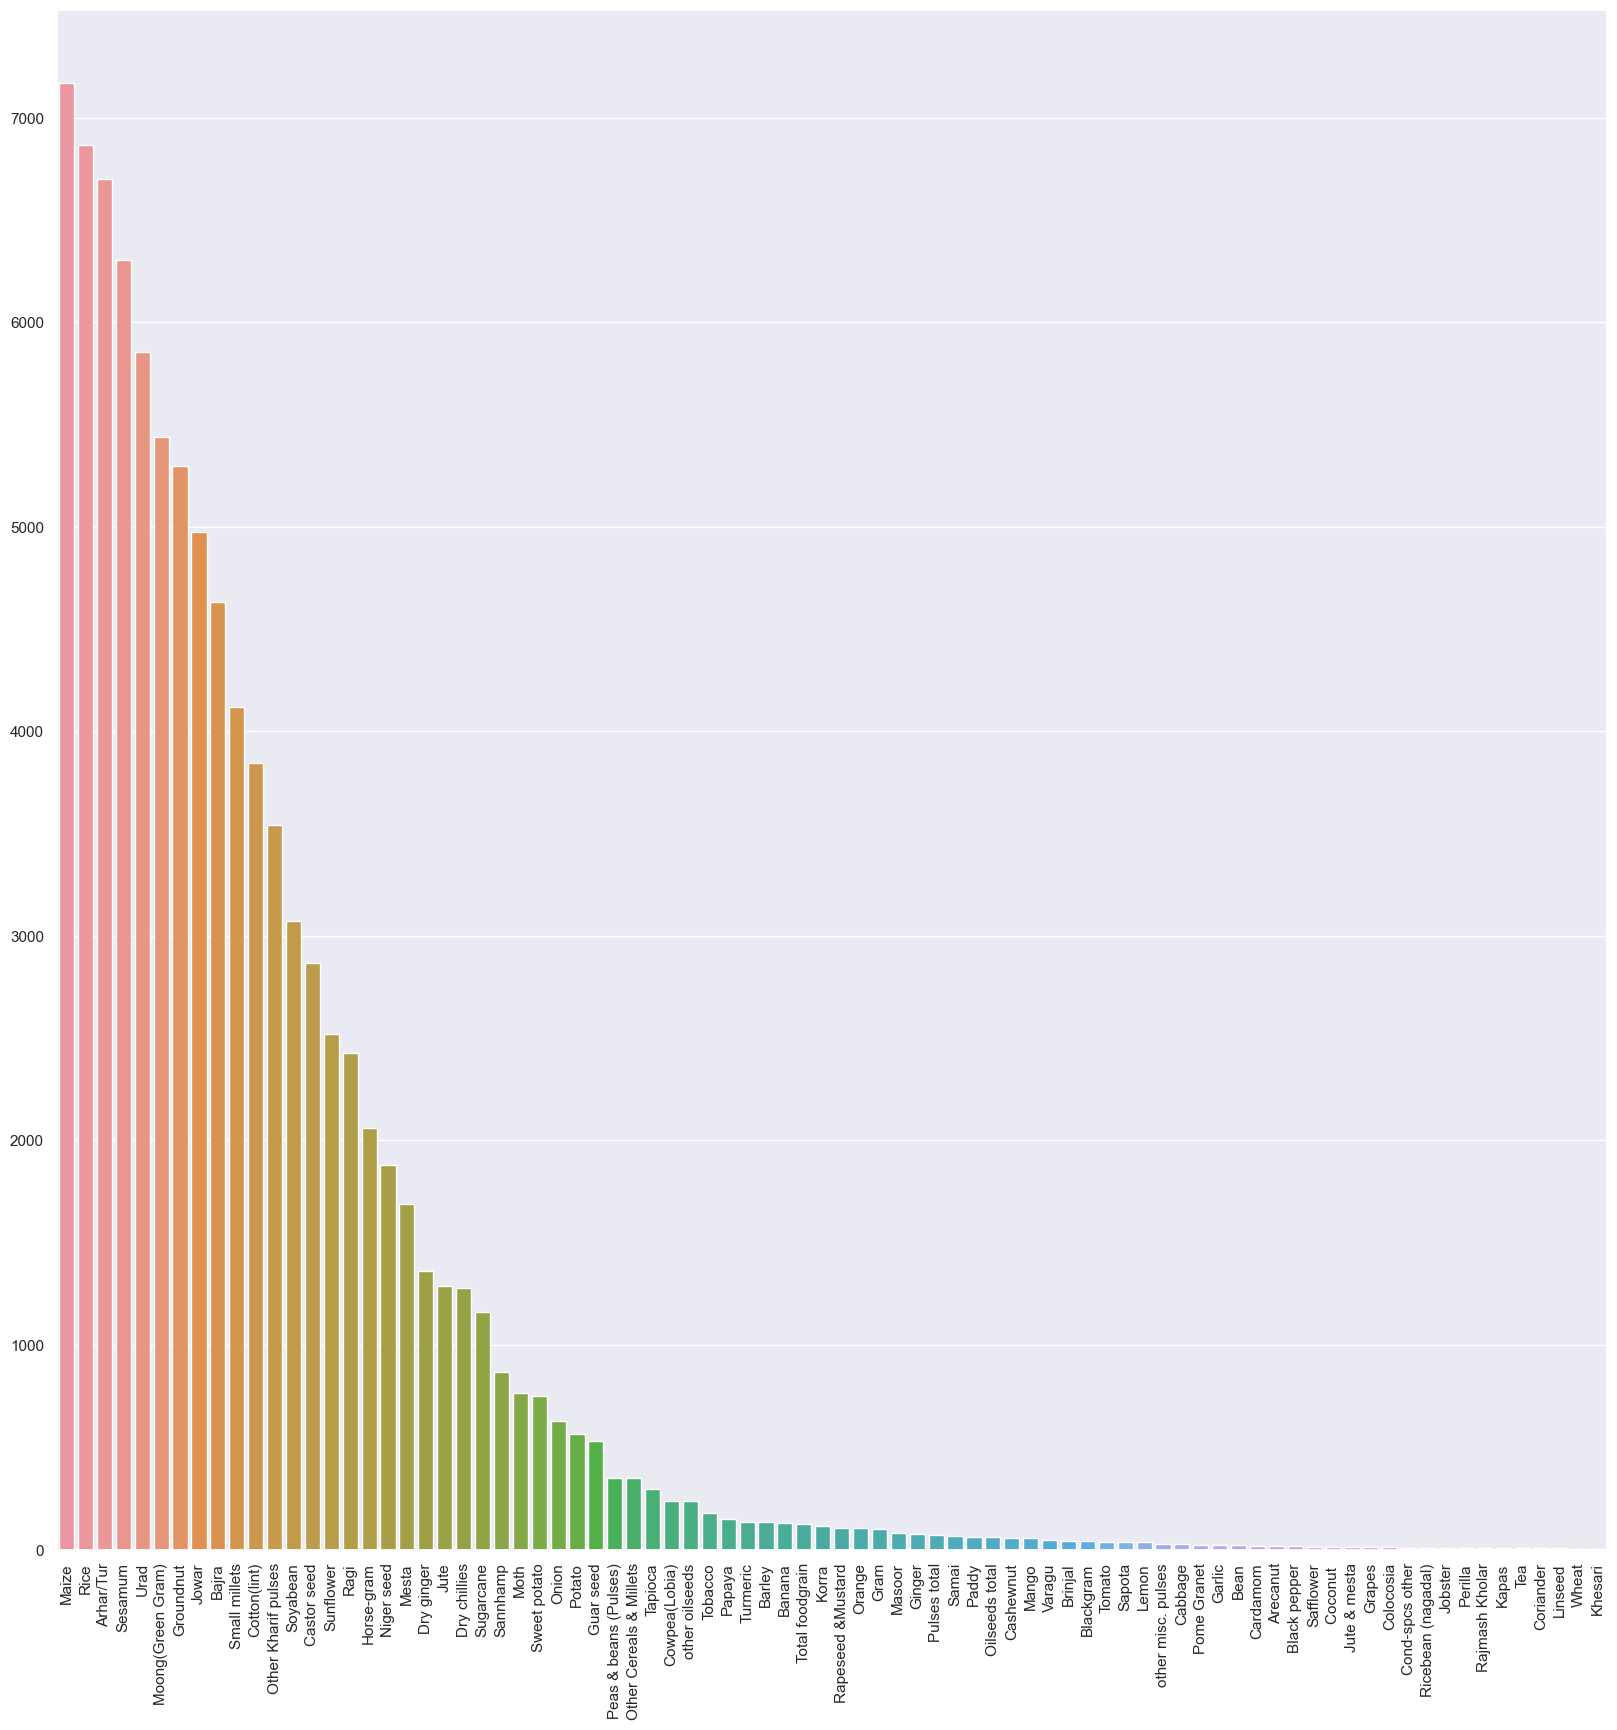

In [70]:

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(x=list( kharif_dict.keys()),y=list(kharif_dict.values()))

In [71]:
Kharif_crop_production = dict(Kharif_crop.groupby(by='Crop')['Production'].sum())
Kharif_crop_production

{'Arecanut': 15614.0,
 'Arhar/Tur': 38608908.22,
 'Bajra': 121133456.0,
 'Banana': 3532507.0,
 'Barley': 384778.8,
 'Bean': 6240.0,
 'Black pepper': 972.0,
 'Blackgram': 19241.0,
 'Brinjal': 305669.0,
 'Cabbage': 34615.0,
 'Cardamom': 1690.0,
 'Cashewnut': 116351.0,
 'Castor seed': 15146029.65,
 'Coconut ': 126592.0,
 'Colocosia': 49840.0,
 'Cond-spcs other': 675.4,
 'Coriander': 1137.0,
 'Cotton(lint)': 281659237.7,
 'Cowpea(Lobia)': 149247.0,
 'Dry chillies': 9978714.9,
 'Dry ginger': 2478762.8,
 'Garlic': 33809.3,
 'Ginger': 198376.0,
 'Gram': 420286.0,
 'Grapes': 22314.0,
 'Groundnut': 86580272.9,
 'Guar seed': 131446.0,
 'Horse-gram': 2116027.5,
 'Jobster': 1180.0,
 'Jowar': 62405338.1,
 'Jute': 181081294.0,
 'Jute & mesta': 66990.0,
 'Kapas': 8113.0,
 'Khesari': 507.0,
 'Korra': 123269.0,
 'Lemon': 540994.0,
 'Linseed': 650.0,
 'Maize': 196547442.8,
 'Mango': 5954430.0,
 'Masoor': 154694.3,
 'Mesta': 12374386.0,
 'Moong(Green Gram)': 13355291.2,
 'Moth': 3698687.6,
 'Niger seed':

<AxesSubplot:>

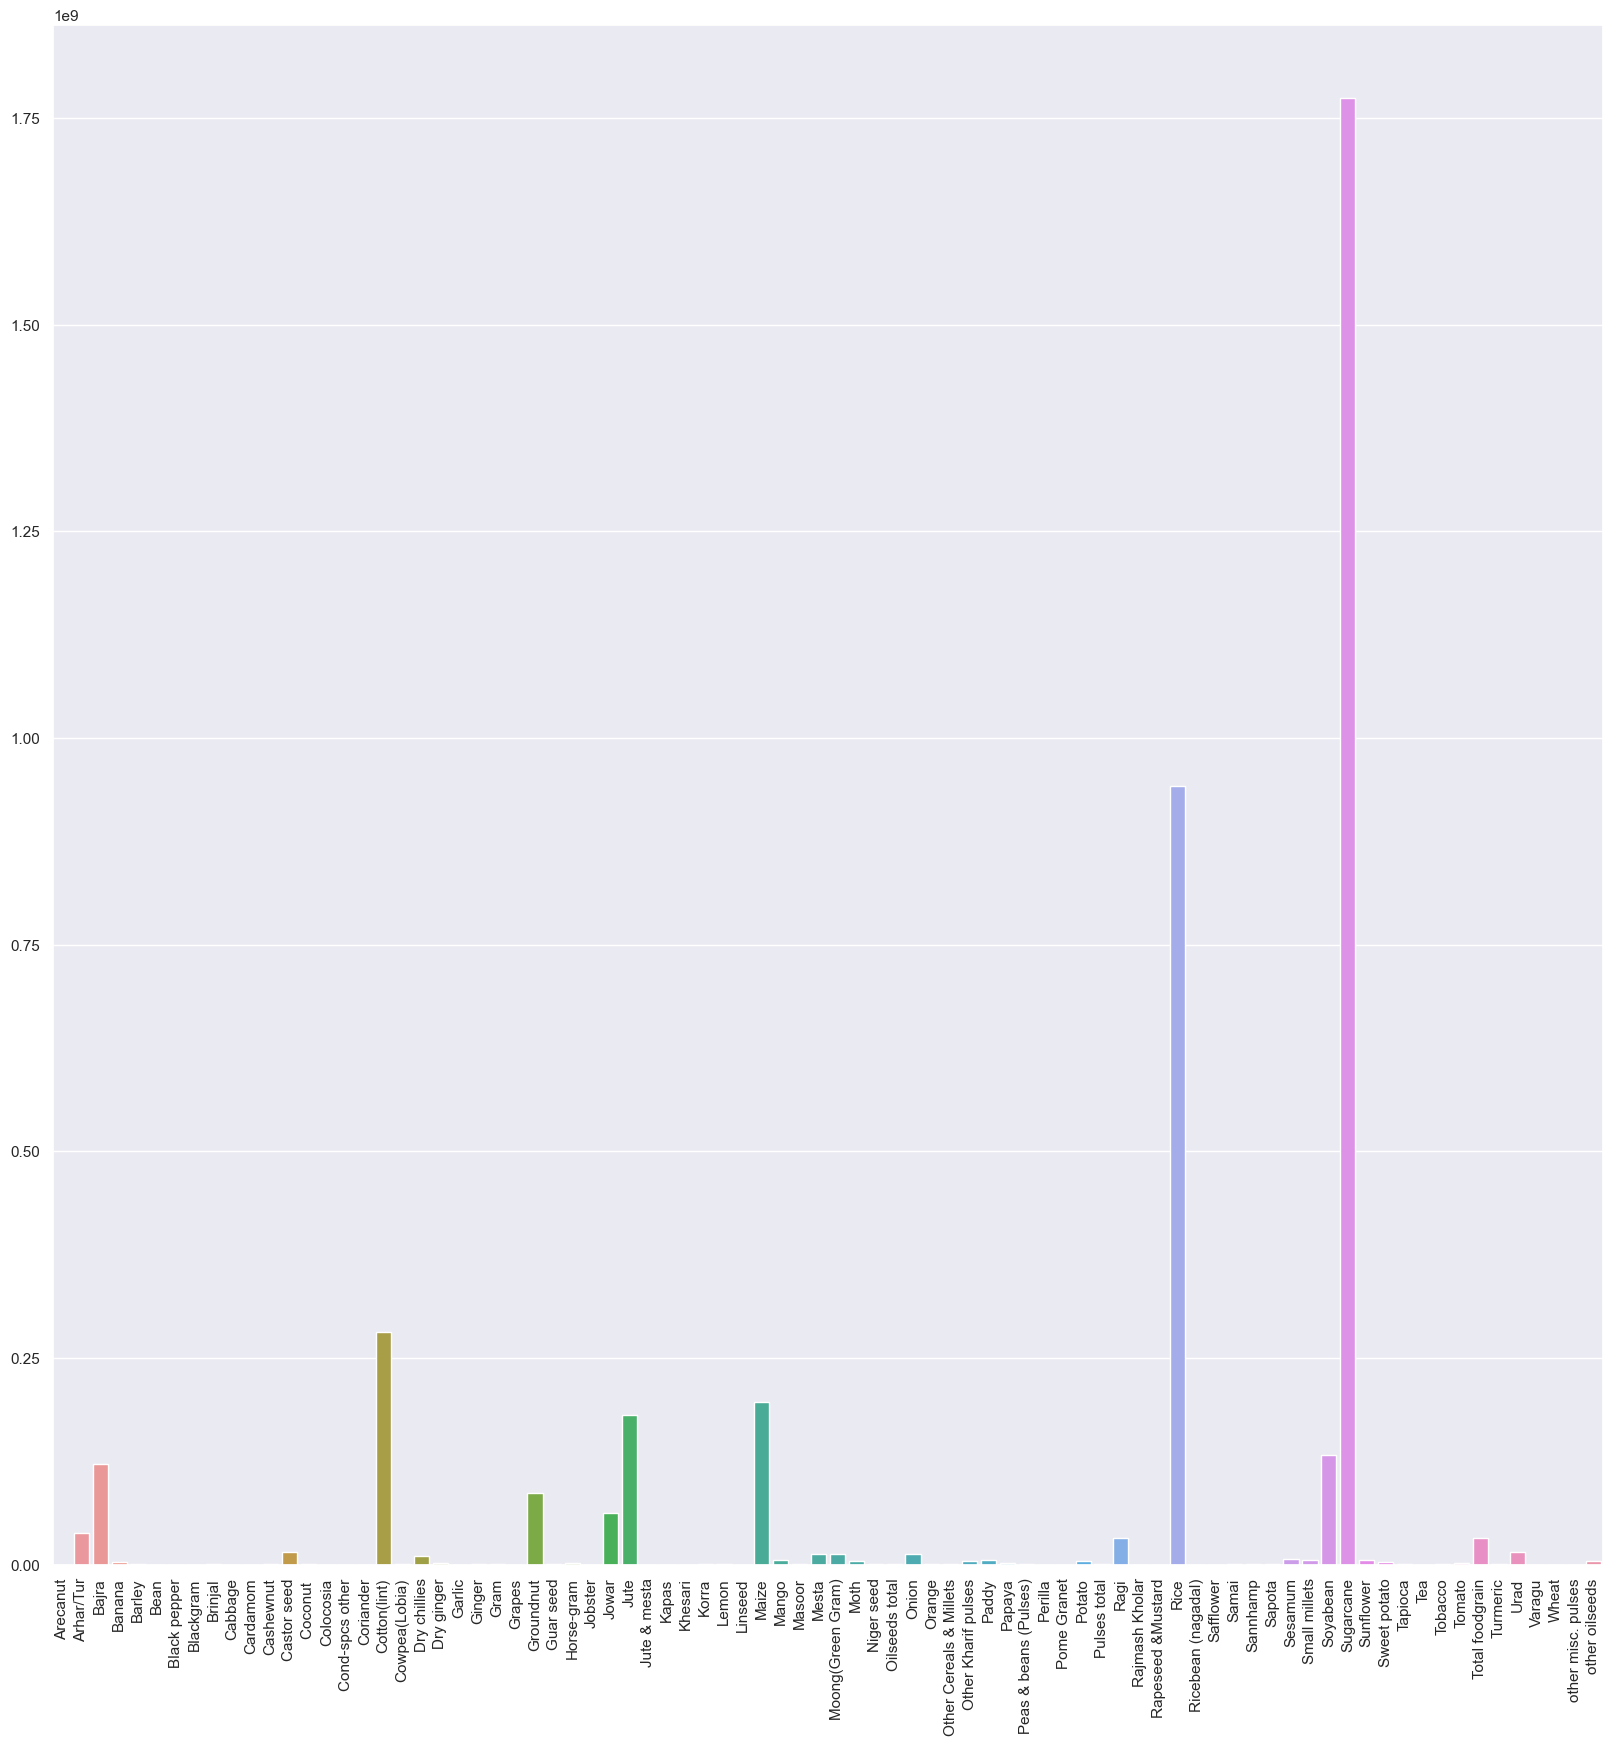

In [72]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(x= list(Kharif_crop_production.keys()),y=list(Kharif_crop_production.values()))

As per Above Chart we can say that Rice and Sugar Cane are the highest producing crops in India.

# RICE PRODUCTION ANALYSIS

In [73]:
rice_df = df[df['Crop']=='Rice']

In [74]:
rice_df

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production       Zones Crop_type  
2       Rice     102.00      321.00  Union Terr    Cereal  
12      Rice      83.00      300.00  Union Terr    Cereal  
18      Rice     189.20      510.84  Union Terr    Cereal  
27      Rice      52.00       90.17  Union Terr    Cereal  
36      Rice      52.94       72.57  Union Terr    Cereal  
...      ...        ...         ...         ...       ...  
246049  Rice     516.00     1274.00   East Zone    Cereal  
246052  Rice  302274.00   730136.00   East Zone    Cereal  
246058  Rice     264.00      721.00   East Zone    Cereal  
246086  Rice     306.00      801.00   East Zone    Cereal  
246089  Rice  279151.00   597899.00   East Zone    Cereal  

[15082 rows x 9 columns]

<AxesSubplot:xlabel='State_Name', ylabel='Production'>

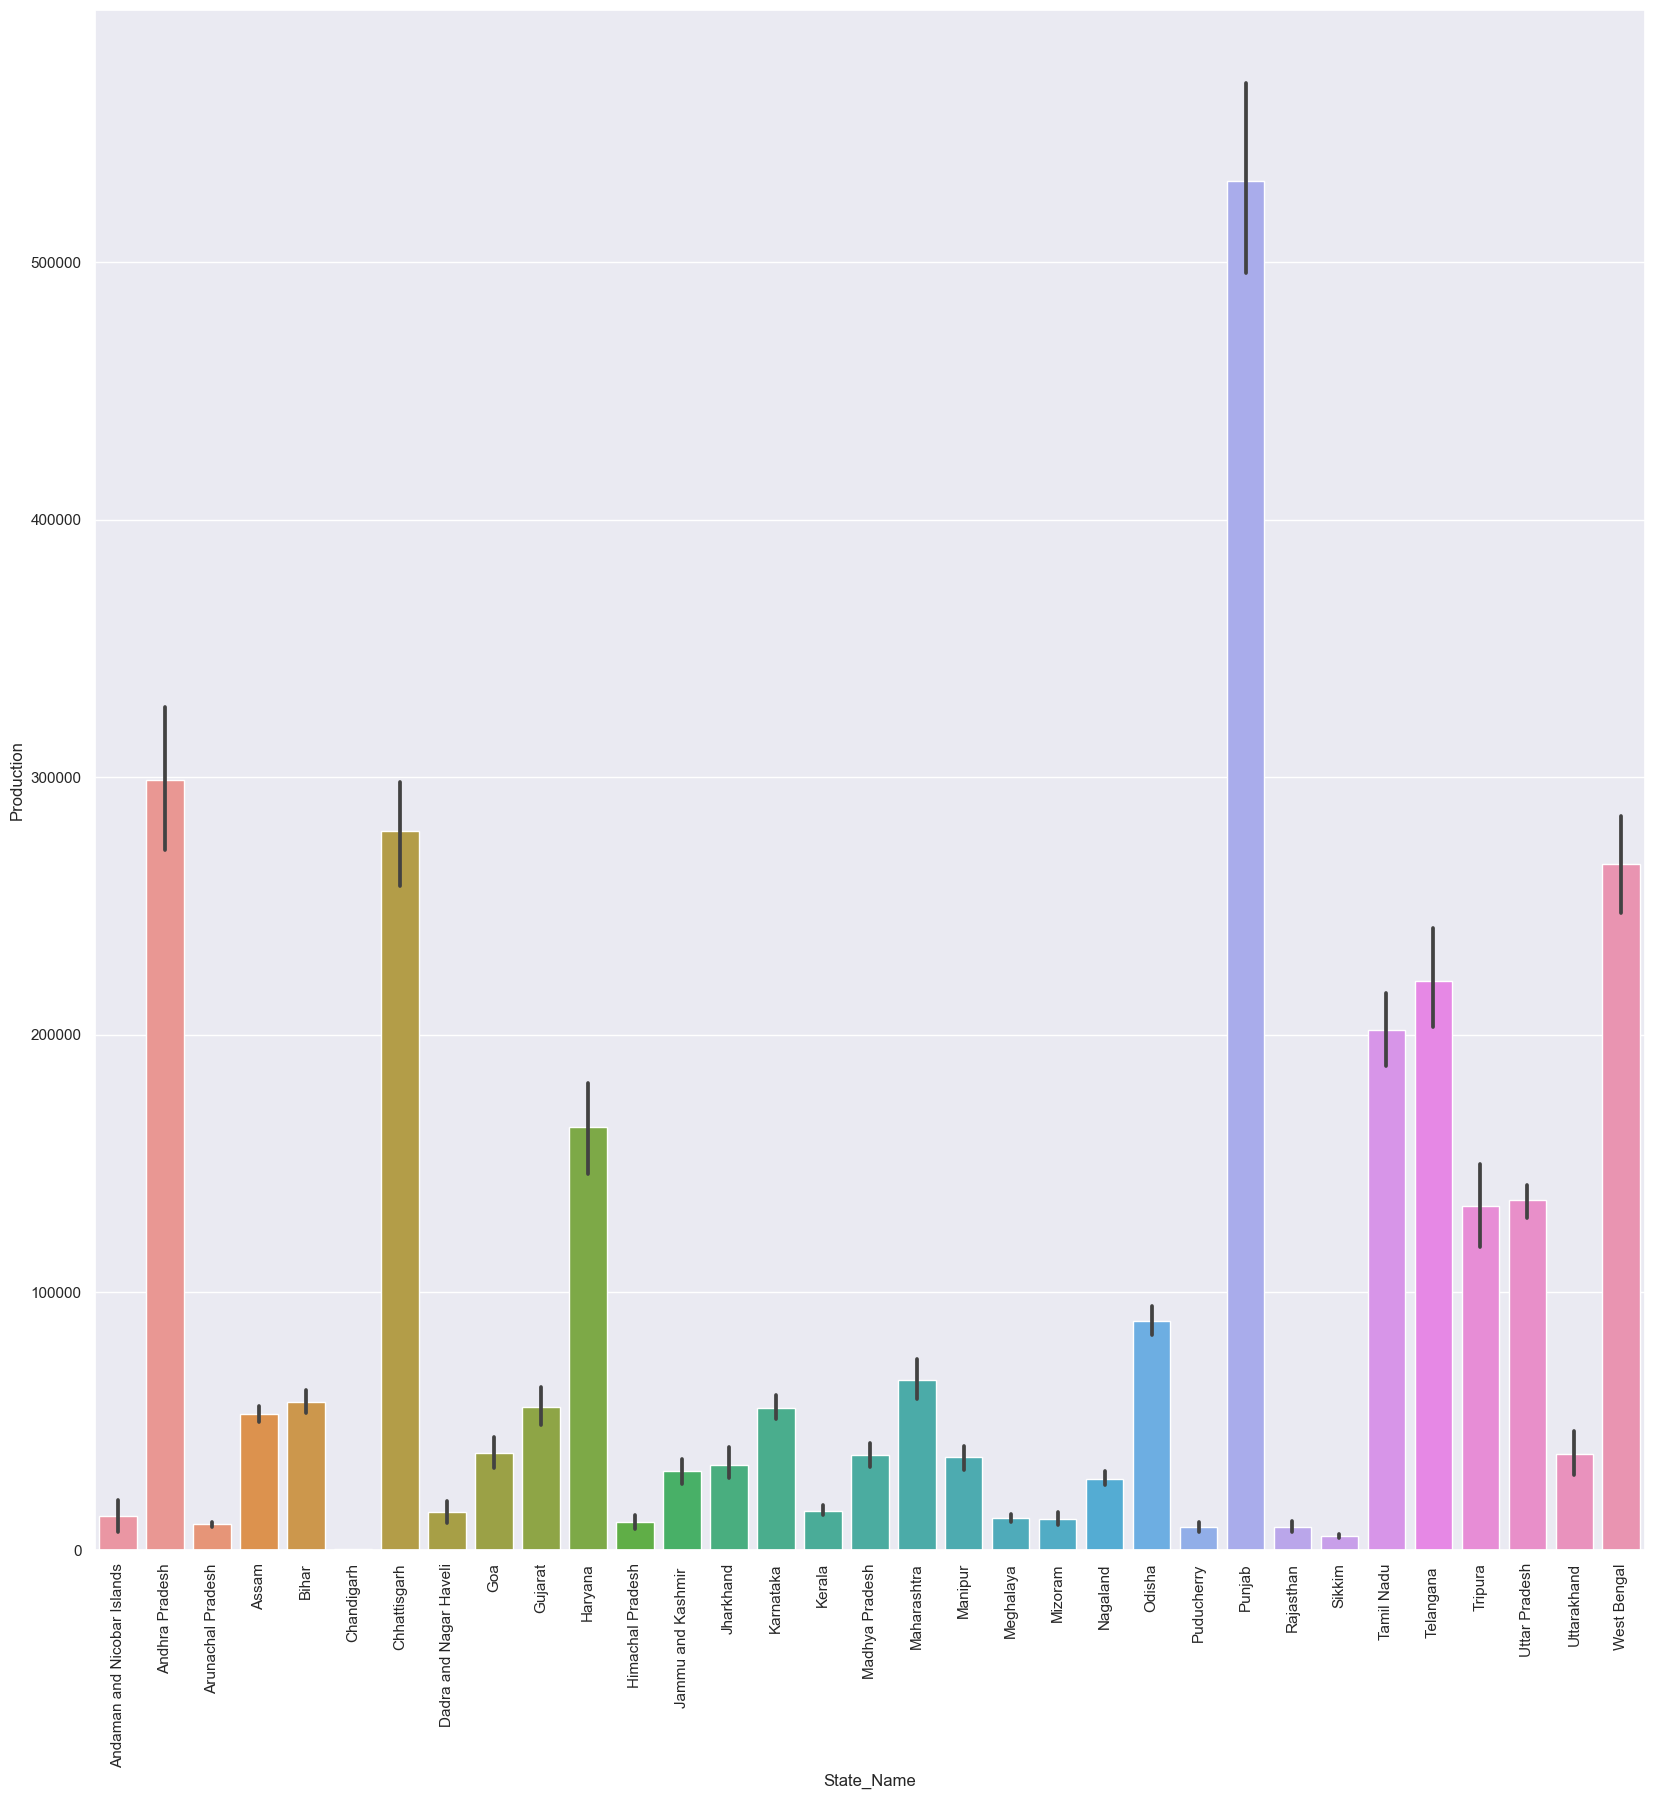

In [75]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data = rice_df,x='State_Name',y='Production')

<AxesSubplot:xlabel='Season', ylabel='Production'>

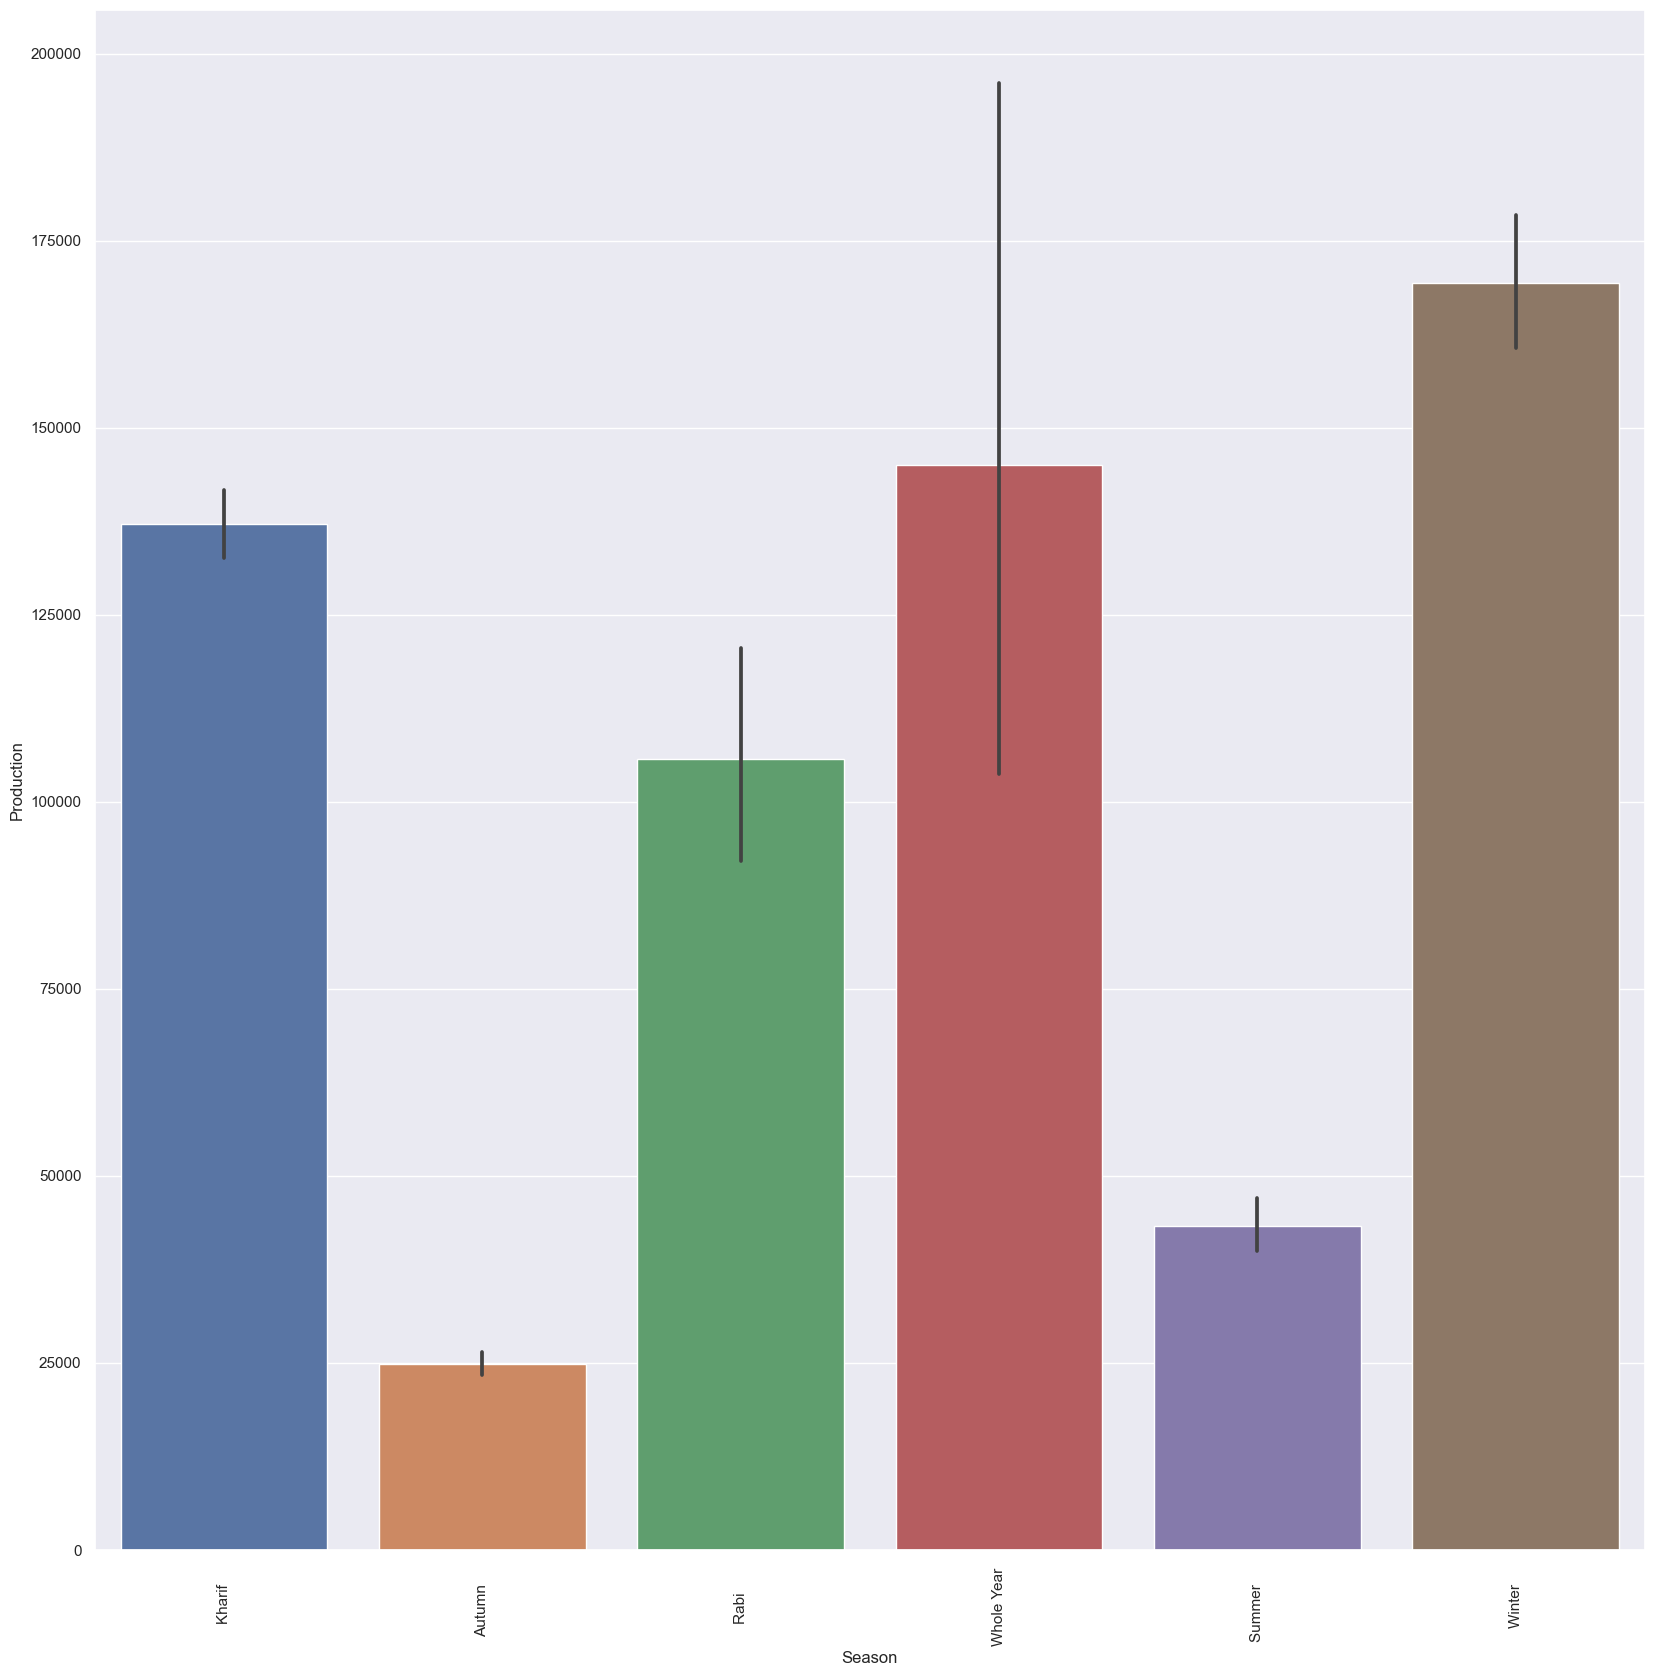

In [76]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data = rice_df,x='Season',y='Production')

In [77]:
top_rice_producers = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
total_rice_production = top_rice_producers["Production"].sum()
top_rice_producers["precent_of_production"] = top_rice_producers["Production"].map(lambda x:(x/total_rice_production)*100)
top_rice_producers[:30]

District_Name  Production  precent_of_production
58            BARDHAMAN  34239976.0               2.132707
374      MEDINIPUR WEST  29192719.0               1.818328
612       WEST GODAVARI  27845309.0               1.734402
169       EAST GODAVARI  24690929.0               1.537925
494             SANGRUR  24448000.0               1.522794
325             KRISHNA  20280606.0               1.263219
90              BIRBHUM  19753571.0               1.230391
347            LUDHIANA  18950000.0               1.180339
386         MURSHIDABAD  18403217.0               1.146282
214              GUNTUR  18245831.0               1.136479
53              BANKURA  18140197.0               1.129899
373      MEDINIPUR EAST  17138116.0               1.067483
435             PATIALA  16446000.0               1.024373
188           FIROZEPUR  16281000.0               1.014095
1    24 PARAGANAS SOUTH  15962222.0               0.994240
545        SPSR NELLORE  15252100.0               0.950008
286          KARIMNAGAR  14600422.0               0.909417
231             HOOGHLY  14517541.0               0.904255
398            NALGONDA  13959000.0               0.869465
391               NADIA  13755403.0               0.856783
21             AMRITSAR  13135000.0               0.818140
0    24 PARAGANAS NORTH  12803747.0               0.797508
378                MOGA  12111000.0               0.754358
60              BARGARH  11283320.0               0.702805
159      DINAJPUR UTTAR  10982128.0               0.684044
453             PURULIA  10946192.0               0.681806
360              MALDAH  10564097.0               0.658006
215           GURDASPUR  10451000.0               0.650962
244           JALANDHAR   9579000.0               0.596648
124          COOCHBEHAR   9555392.0               0.595177

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'BARDHAMAN'),
  Text(1, 0, 'MEDINIPUR WEST'),
  Text(2, 0, 'WEST GODAVARI'),
  Text(3, 0, 'EAST GODAVARI'),
  Text(4, 0, 'SANGRUR'),
  Text(5, 0, 'KRISHNA'),
  Text(6, 0, 'BIRBHUM'),
  Text(7, 0, 'LUDHIANA'),
  Text(8, 0, 'MURSHIDABAD'),
  Text(9, 0, 'GUNTUR'),
  Text(10, 0, 'BANKURA'),
  Text(11, 0, 'MEDINIPUR EAST'),
  Text(12, 0, 'PATIALA'),
  Text(13, 0, 'FIROZEPUR'),
  Text(14, 0, '24 PARAGANAS SOUTH'),
  Text(15, 0, 'SPSR NELLORE'),
  Text(16, 0, 'KARIMNAGAR'),
  Text(17, 0, 'HOOGHLY'),
  Text(18, 0, 'NALGONDA'),
  Text(19, 0, 'NADIA'),
  Text(20, 0, 'AMRITSAR'),
  Text(21, 0, '24 PARAGANAS NORTH'),
  Text(22, 0, 'MOGA'),
  Text(23, 0, 'BARGARH'),
  Text(24, 0, 'DINAJPUR UTTAR'),
  Text(25, 0, 'PURULIA'),
  Text(26, 0, 'MALDAH'),
  Text(27, 0, 'GURDASPUR'),
  Text(28, 0, 'JALANDHAR'),
  Text(29, 0, 'COOCHBEHAR')])

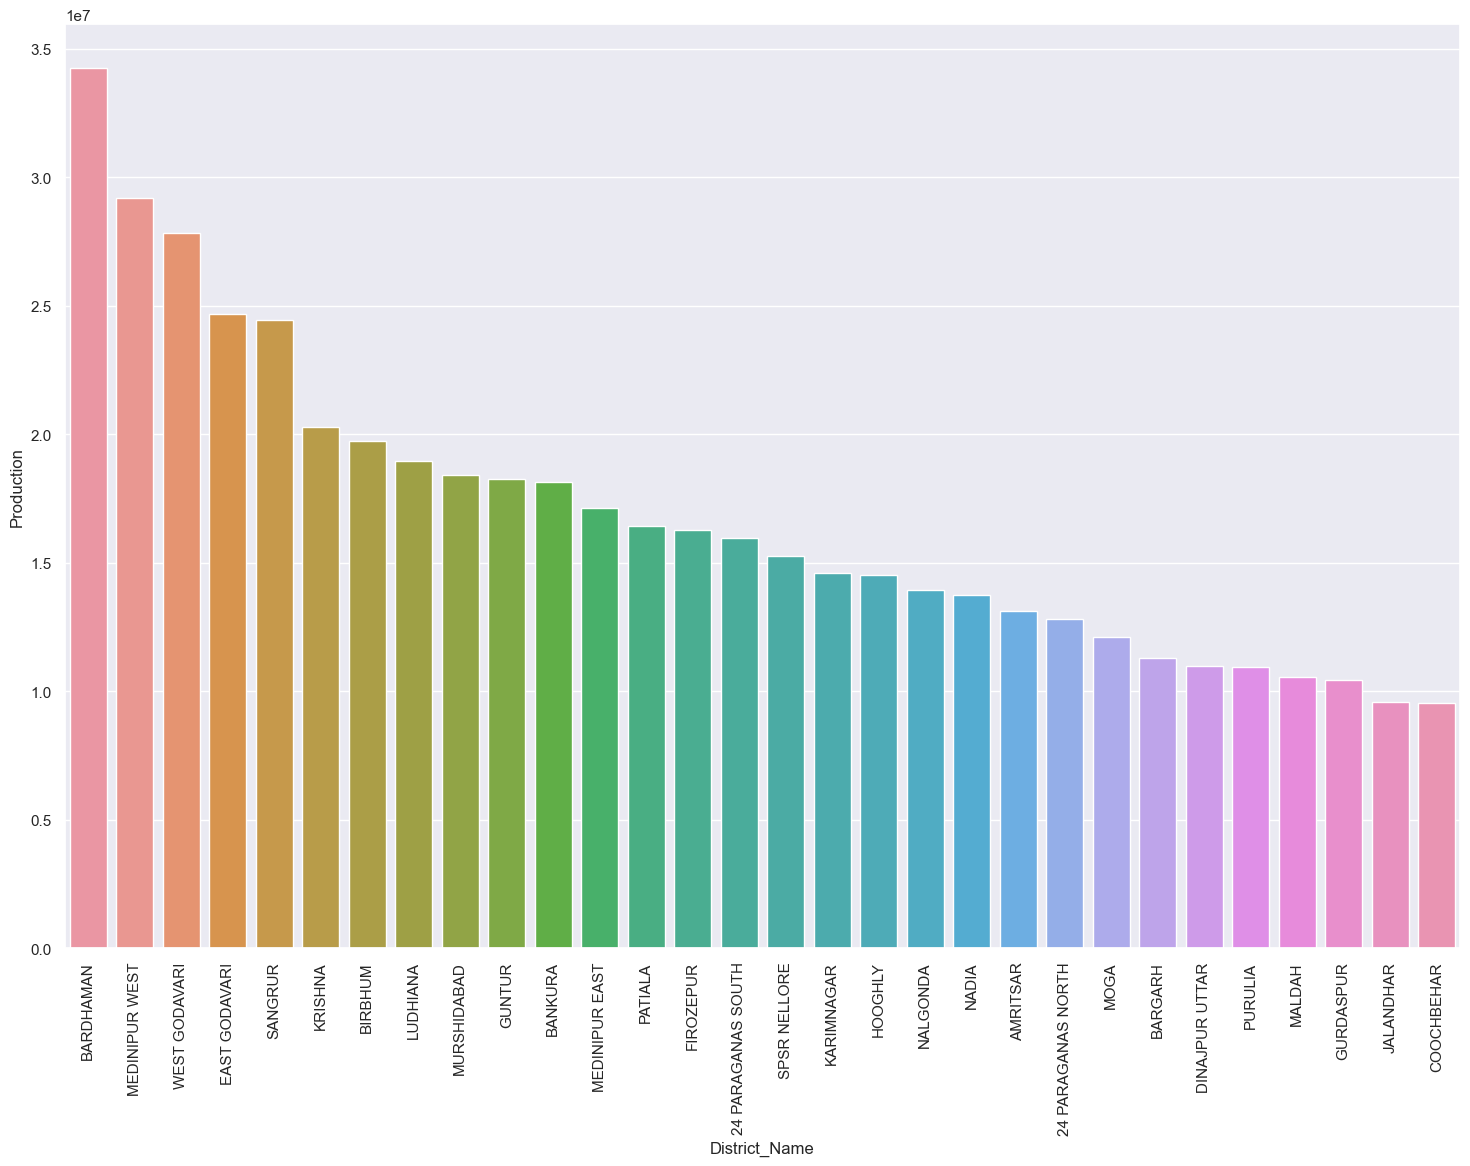

In [78]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name",y="Production",data=top_rice_producers[:30])
plt.xticks(rotation=90)

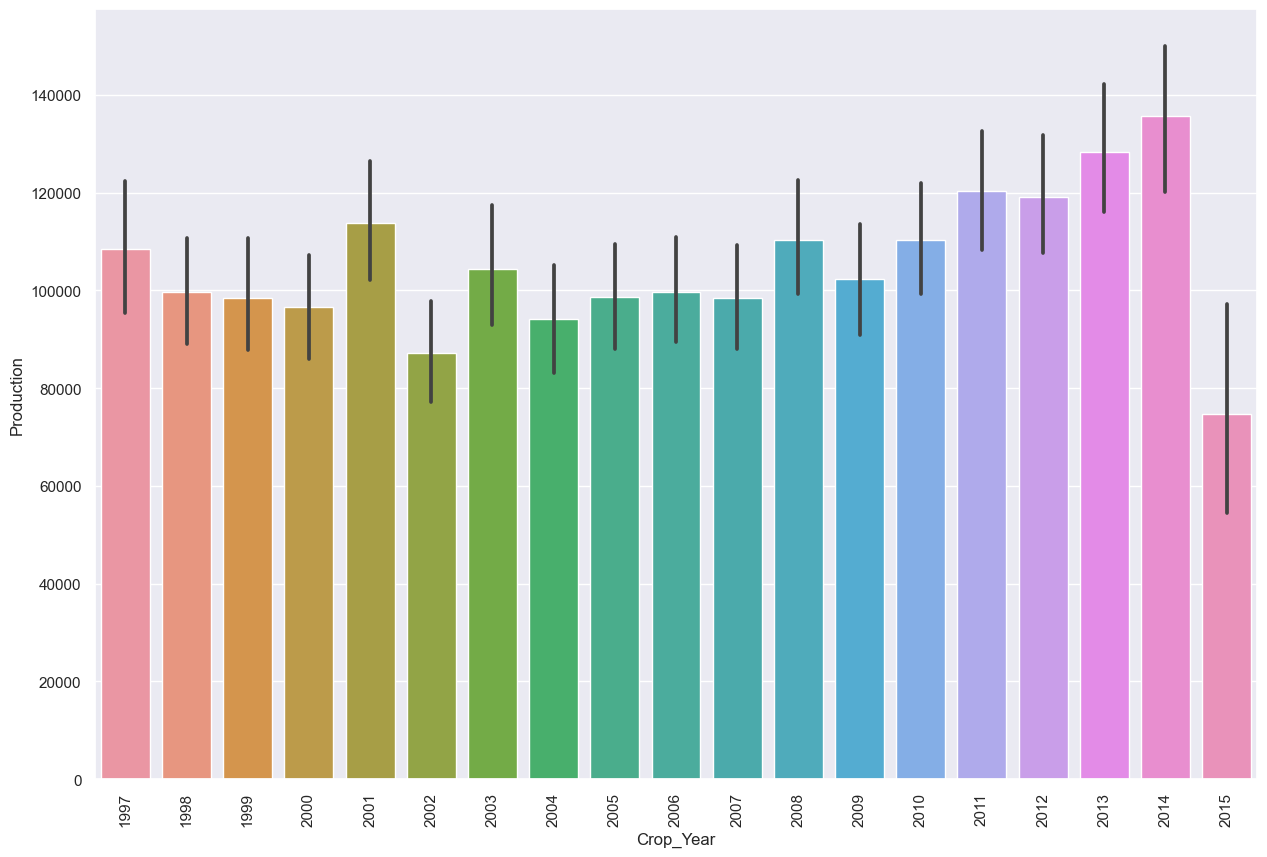

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

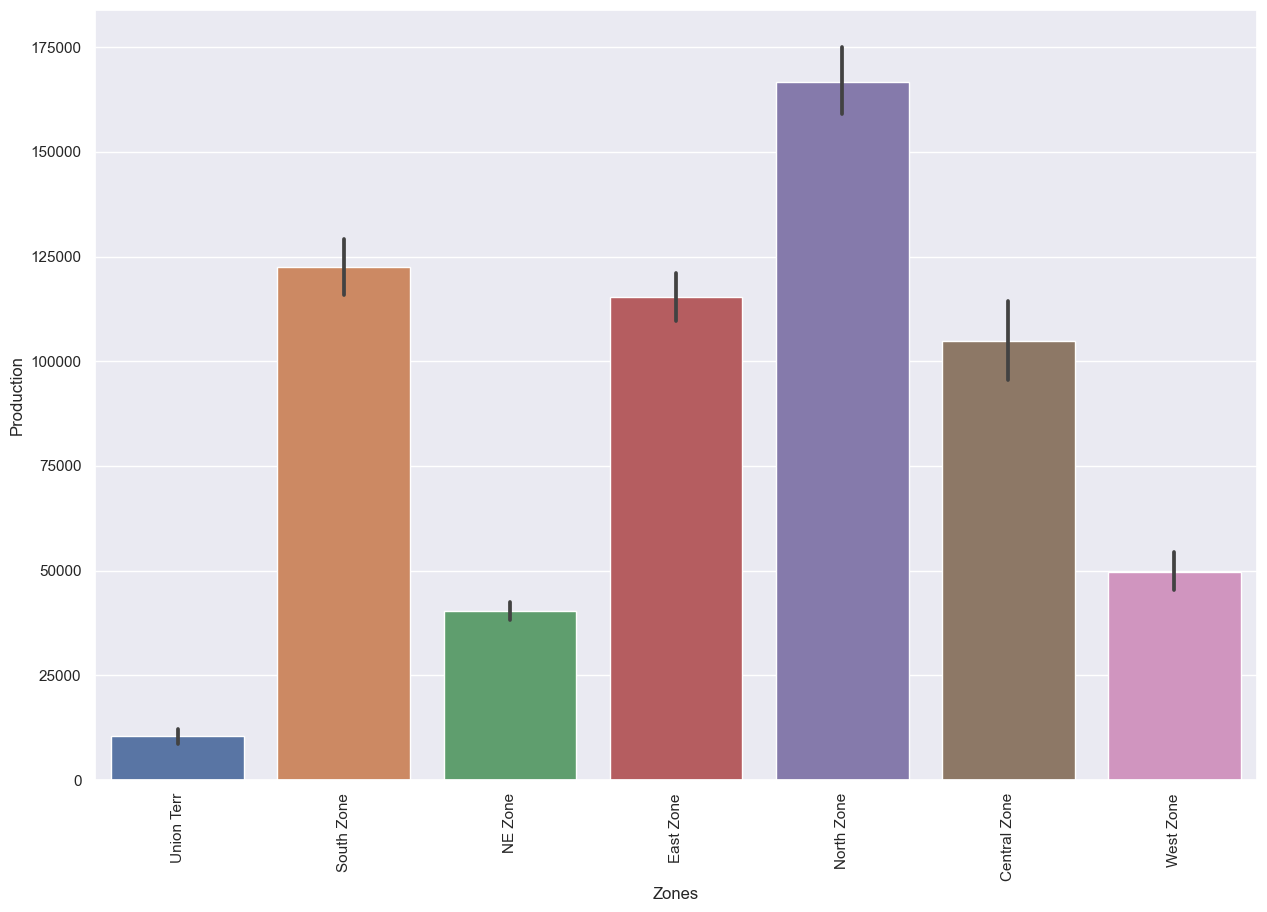

In [80]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="Zones",y="Production",data=rice_df)

plt.show()

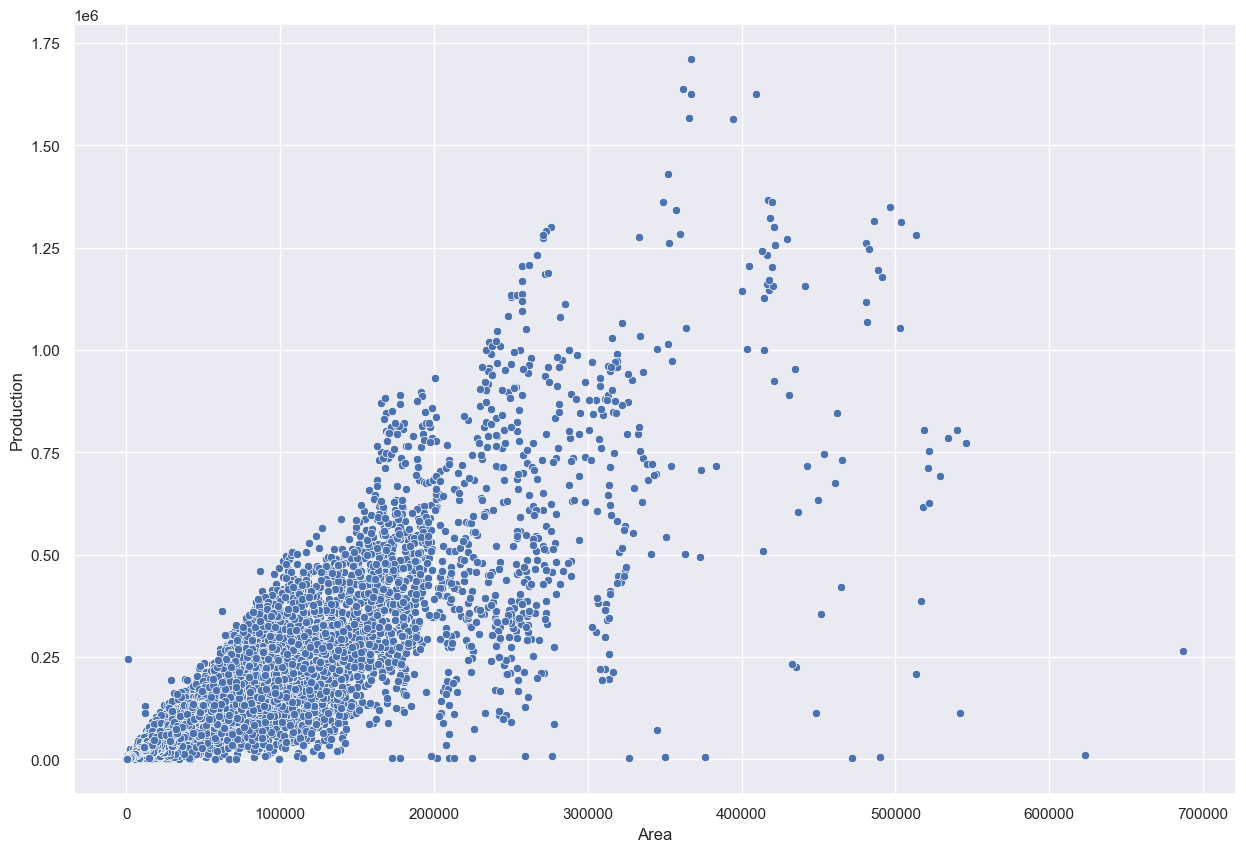

In [81]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Area",y="Production",data=rice_df)
plt.show()

1. Rice is grown heavily when we look the frequency of crops in India
2. From Year 1997 - 2015 in India. The highest Rice producing State is Punjab.
3. Rice is highly production has reached highest in the year 2014
4. During winter the rice production will be highest.
5. BARDHAMAN is the highest producer of rice in district-wise with 2.13% among all the districts than follows MEDINIPUR WEST and WEST GODAVARI.
 

# SUGARCANE PRODUCTION ANALYSIS

In [82]:
sugarcane_df = df[df['Crop']=='Sugarcane']
sugarcane_df

State_Name District_Name  Crop_Year       Season  \
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
26      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
60      Andaman and Nicobar Islands      NICOBARS       2006  Whole Year    
65      Andaman and Nicobar Islands      NICOBARS       2010  Autumn        
...                             ...           ...        ...          ...   
245953                  West Bengal       PURULIA       2010  Whole Year    
245984                  West Bengal       PURULIA       2011  Whole Year    
246016                  West Bengal       PURULIA       2012  Whole Year    
246051                  West Bengal       PURULIA       2013  Whole Year    
246088                  West Bengal       PURULIA       2014  Whole Year    

             Crop   Area  Production       Zones   Crop_type  
7       Sugarcane    1.0        2.00  Union Terr  Commercial  
16      Sugarcane    1.0        1.00  Union Terr  Commercial  
26      Sugarcane    5.0       40.00  Union Terr  Commercial  
60      Sugarcane    0.2        0.50  Union Terr  Commercial  
65      Sugarcane   13.4       41.75  Union Terr  Commercial  
...           ...    ...         ...         ...         ...  
245953  Sugarcane  303.0    11541.00   East Zone  Commercial  
245984  Sugarcane  303.0    20264.00   East Zone  Commercial  
246016  Sugarcane  314.0    11199.00   East Zone  Commercial  
246051  Sugarcane  161.0     7948.00   East Zone  Commercial  
246088  Sugarcane  324.0    16250.00   East Zone  Commercial  

[7827 rows x 9 columns]

In [83]:
sugarcane_prod = dict(sugarcane_df.groupby(by='State_Name')['Production'].sum())
sugarcane_prod

{'Andaman and Nicobar Islands': 30638.670000000002,
 'Andhra Pradesh': 226730305.0,
 'Arunachal Pradesh': 384639.0,
 'Assam': 18845994.0,
 'Bihar': 106227183.0,
 'Chhattisgarh': 2499956.0,
 'Dadra and Nagar Haveli': 1115995.0,
 'Goa': 570984.0,
 'Gujarat': 212022800.0,
 'Haryana': 112680900.0,
 'Himachal Pradesh': 273233.1,
 'Jammu and Kashmir ': 4968.7,
 'Jharkhand': 82173.01,
 'Karnataka': 515845482.0,
 'Kerala': 3819915.84,
 'Madhya Pradesh': 33870810.0,
 'Maharashtra': 938485965.0,
 'Manipur': 134912.0,
 'Meghalaya': 4286.0,
 'Mizoram': 161231.0,
 'Nagaland': 2216170.0,
 'Odisha': 18114891.6,
 'Puducherry': 4151379.0,
 'Punjab': 88780000.0,
 'Rajasthan': 7828877.0,
 'Tamil Nadu': 847496816.0,
 'Telangana ': 63164528.0,
 'Tripura': 820546.0,
 'Uttar Pradesh': 2202874890.0,
 'Uttarakhand': 98902736.0,
 'West Bengal': 27538321.0}

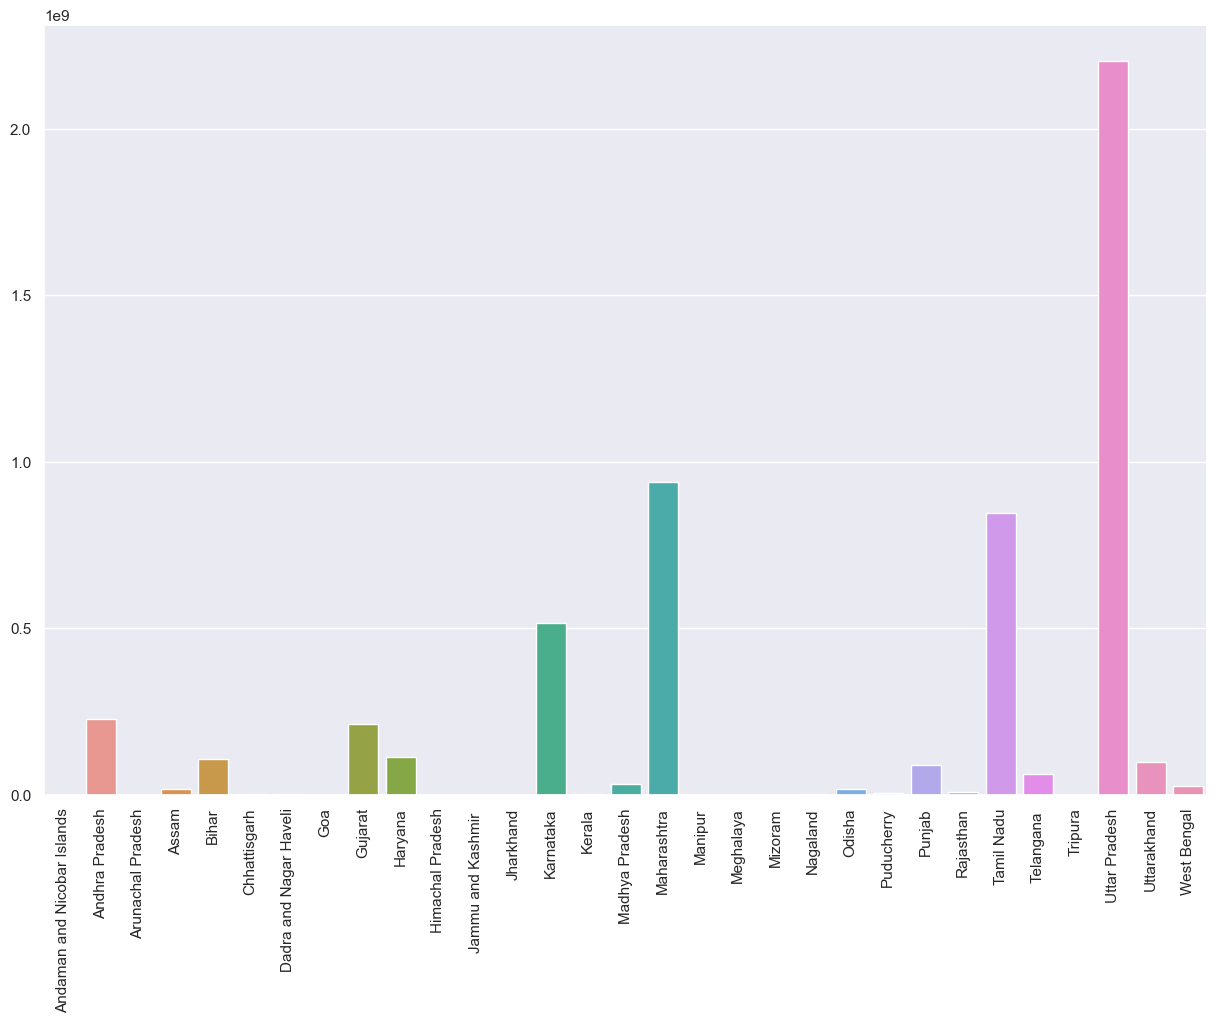

In [84]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= list(sugarcane_prod.keys()),y=list(sugarcane_prod.values()))
plt.show()

In [85]:
sugarcane_dist_prod = sugarcane_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
sugarcane_dist_prod

District_Name   Production
360       MUZAFFARNAGAR  258698795.0
81               BIJNOR  230907185.0
283               KHERI  224383685.0
63              BELGAUM  198207649.0
294            KOLHAPUR  157210426.0
..                  ...          ...
300               KOREA         16.0
565  WEST JAINTIA HILLS         15.0
336               MANDI          7.1
329        MAHENDRAGARH          0.0
440              REWARI          0.0

[574 rows x 2 columns]

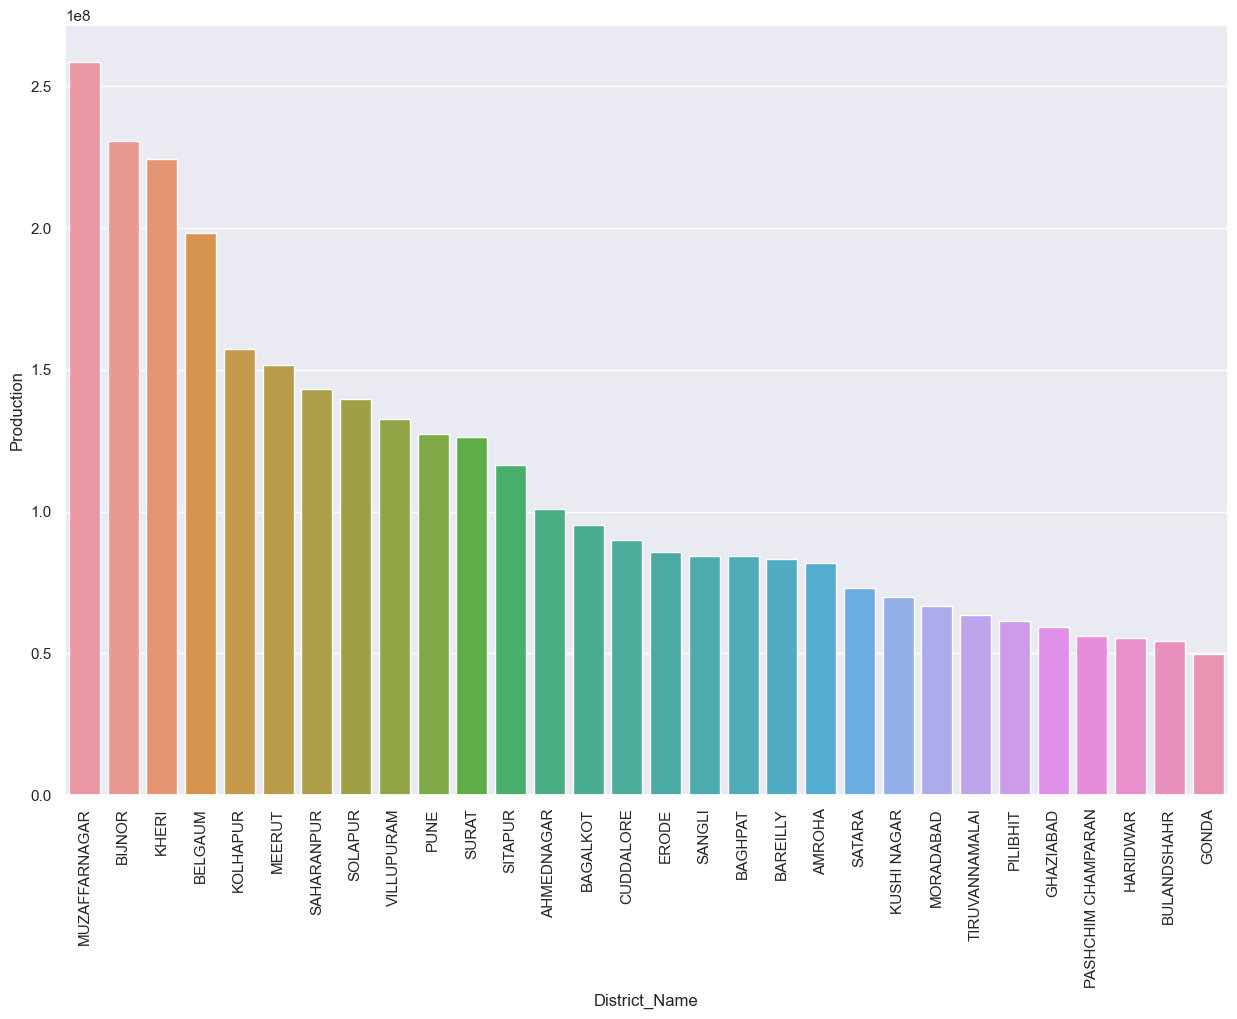

In [86]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= sugarcane_dist_prod.District_Name[:30],y=sugarcane_dist_prod.Production[:30])
plt.show()

In [87]:
sugarcane_year_prod = sugarcane_df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
sugarcane_year_prod

Crop_Year    Production
0        1997  5.012291e+08
16       2013  3.468605e+08
14       2011  3.453955e+08
11       2008  3.411805e+08
13       2010  3.365308e+08
15       2012  3.354994e+08
17       2014  3.285986e+08
4        2001  2.965126e+08
3        2000  2.961173e+08
2        1999  2.940924e+08
12       2009  2.879257e+08
5        2002  2.870916e+08
8        2005  2.857609e+08
9        2006  2.687416e+08
1        1998  2.598091e+08
10       2007  2.540599e+08
6        2003  2.397903e+08
7        2004  2.299085e+08
18       2015  5.771572e+05

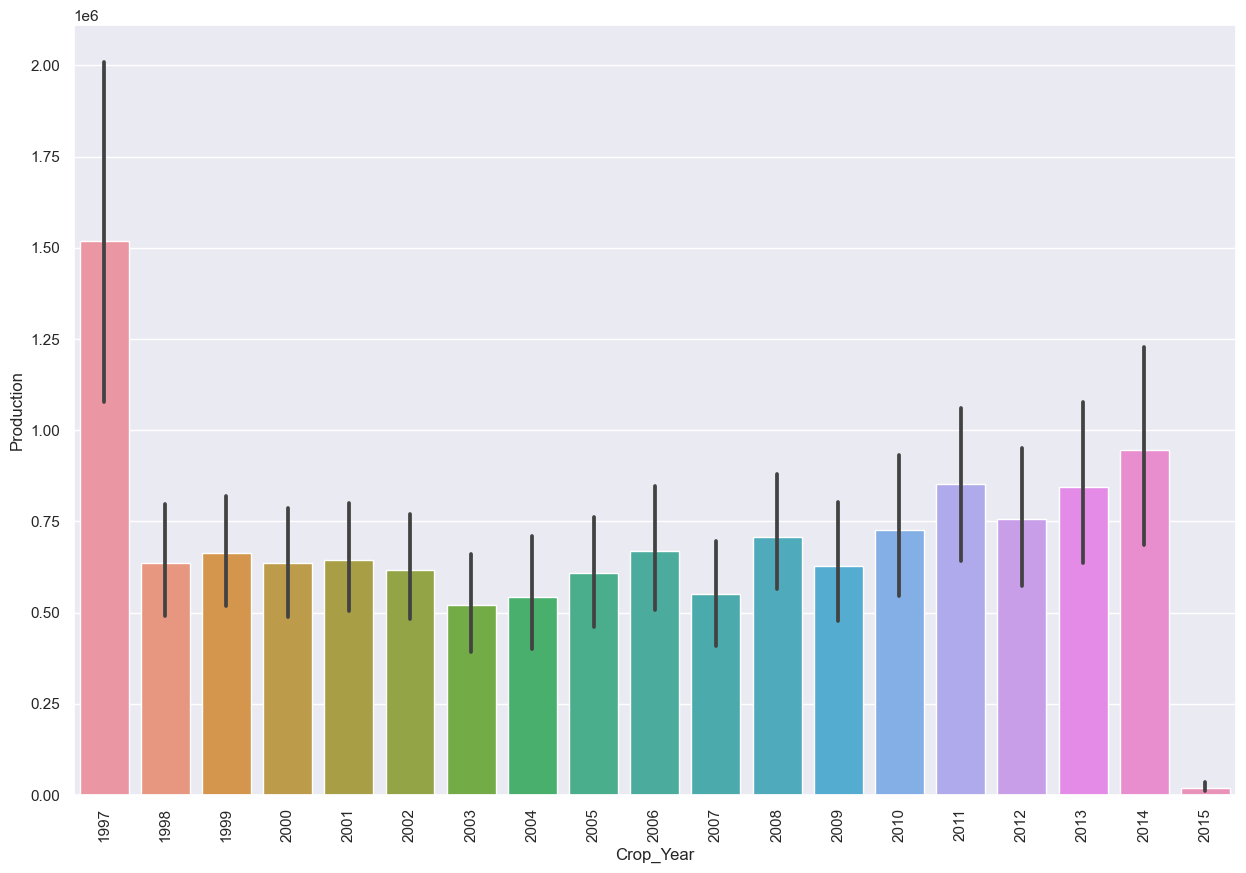

In [88]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= 'Crop_Year',y='Production',data=sugarcane_df)
plt.show()

In [89]:
sugarcane_Season_prod = sugarcane_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
sugarcane_Season_prod

Season    Production
4  Whole Year   3.745173e+09
1  Kharif       1.774444e+09
5  Winter       1.601724e+07
2  Rabi         2.771600e+04
0  Autumn       1.374295e+04
3  Summer       4.900000e+03

In [90]:
Seasons_Sgr =list(sugarcane_Season_prod['Season'])
Season_prod_Sgr =list(sugarcane_Season_prod['Production'])
print(Seasons_Sgr,Season_prod_Sgr)

['Whole Year ', 'Kharif     ', 'Winter     ', 'Rabi       ', 'Autumn     ', 'Summer     '] [3745173443.37, 1774444484.9, 16017238.7, 27716.0, 13742.95, 4900.0]


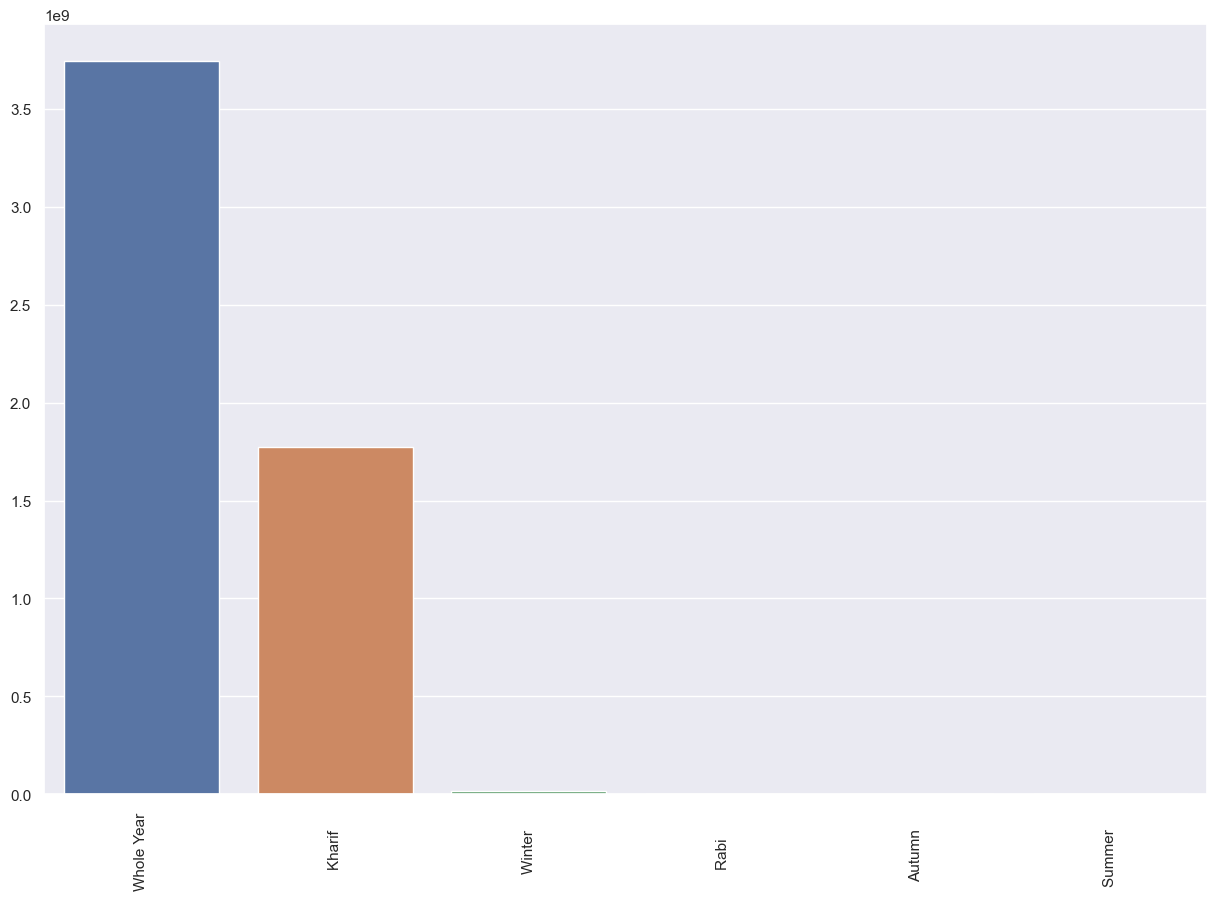

In [91]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= Seasons_Sgr,y=Season_prod_Sgr)
plt.show()

In [92]:
Seasons_Sgr = Seasons_Sgr[1:6]
Season_prod_Sgr = Season_prod_Sgr [1:6]
print(Seasons_Sgr,Season_prod_Sgr)

['Kharif     ', 'Winter     ', 'Rabi       ', 'Autumn     ', 'Summer     '] [1774444484.9, 16017238.7, 27716.0, 13742.95, 4900.0]


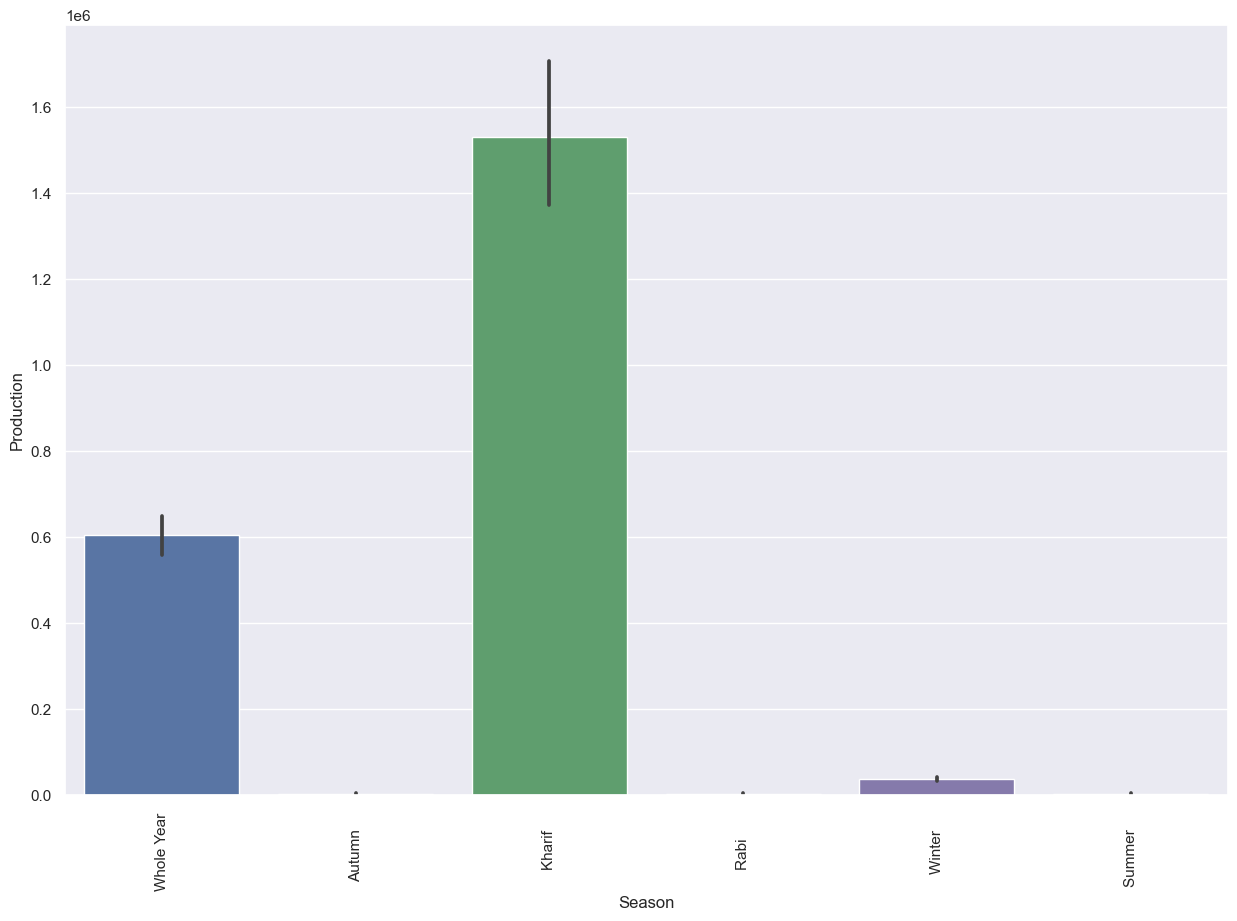

In [93]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= 'Season',y='Production',data=sugarcane_df)
plt.show()

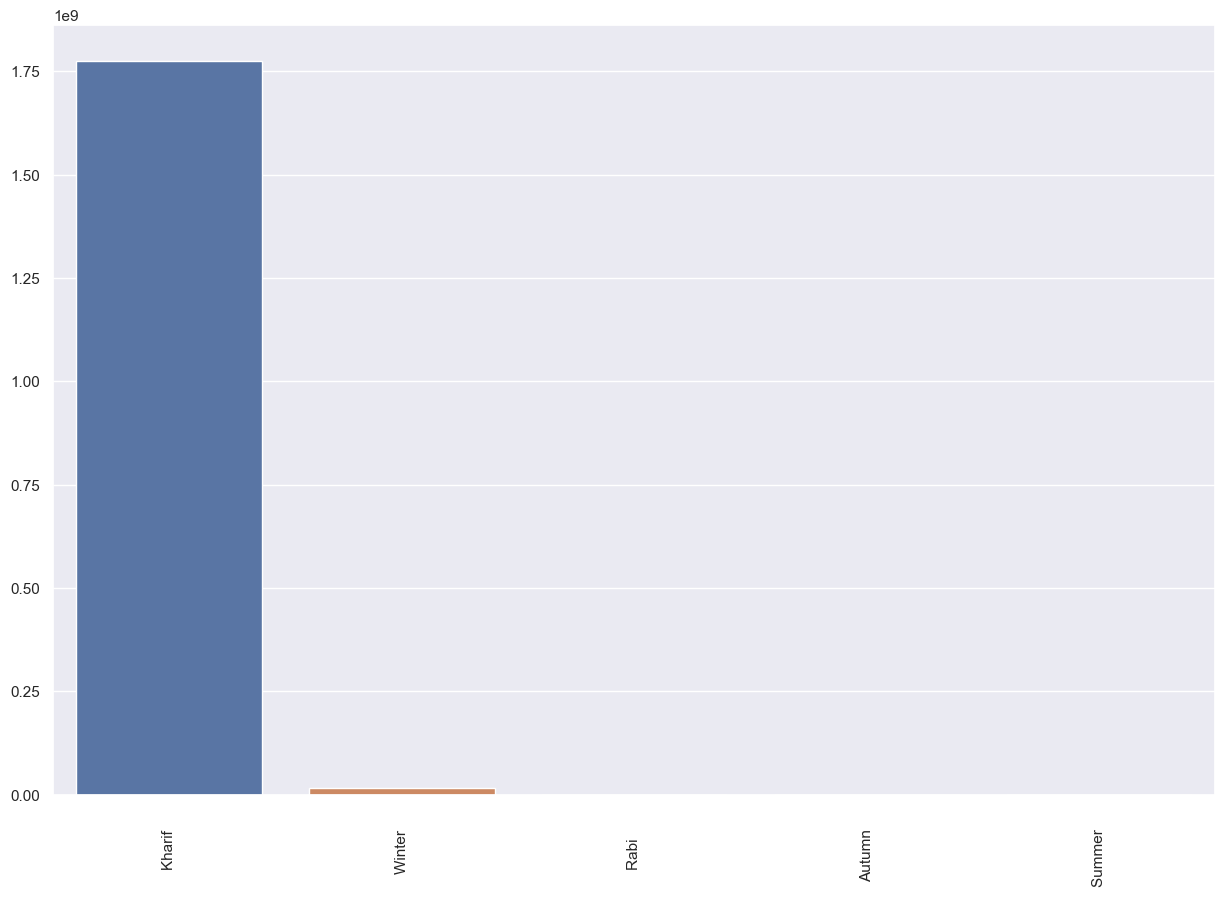

In [94]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= Seasons_Sgr,y=Season_prod_Sgr)
plt.show()

In [95]:
sugarcane_zone_prod = sugarcane_df.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Zones',ascending=False)
sugarcane_zone_prod

Zones    Production
6     West Zone  1.158909e+09
5    Union Terr  5.298013e+06
4    South Zone  1.657057e+09
3    North Zone  2.503517e+09
2       NE Zone  2.256778e+07
1     East Zone  1.519626e+08
0  Central Zone  3.637077e+07

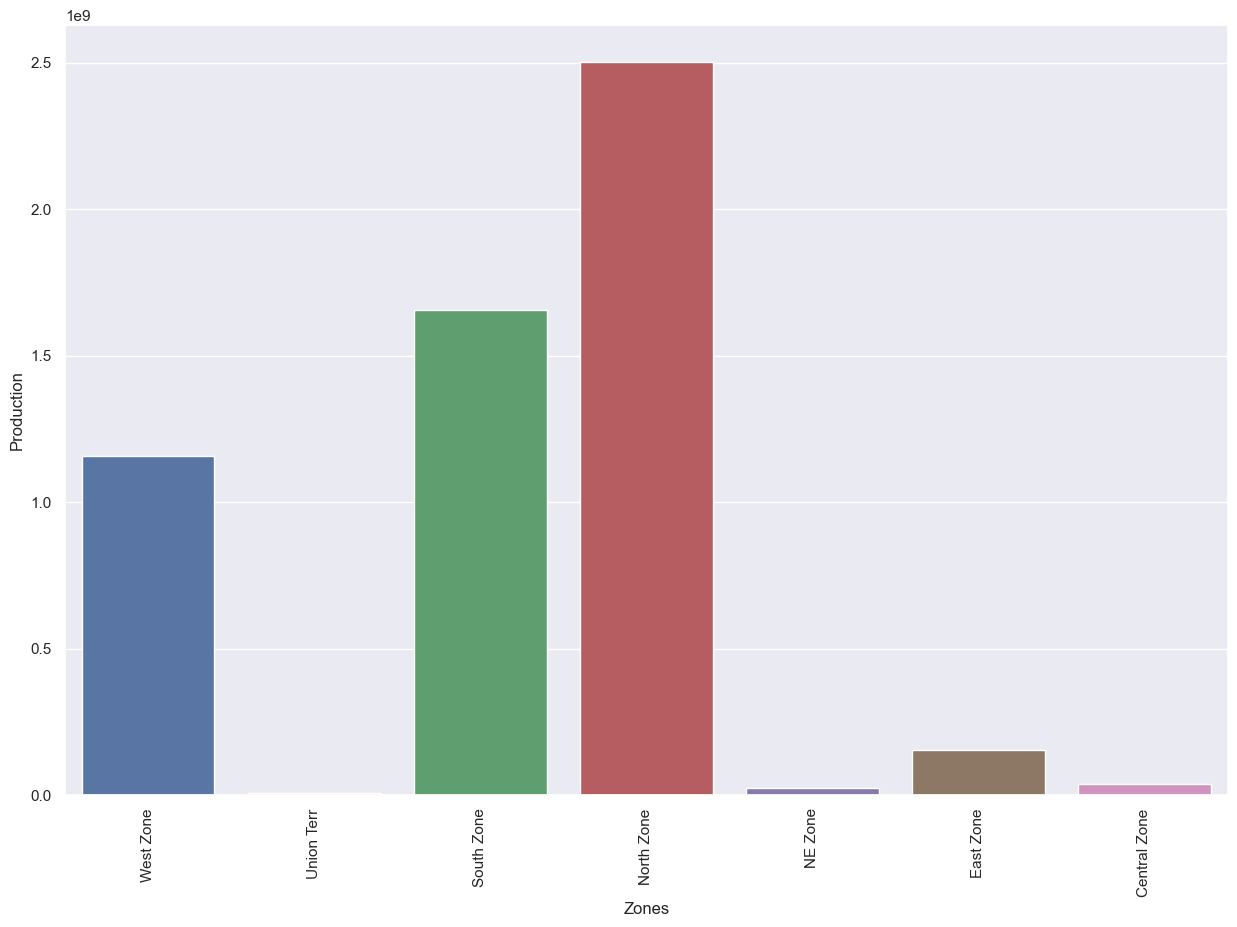

In [96]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= sugarcane_zone_prod.Zones,y=sugarcane_zone_prod.Production)
plt.show()

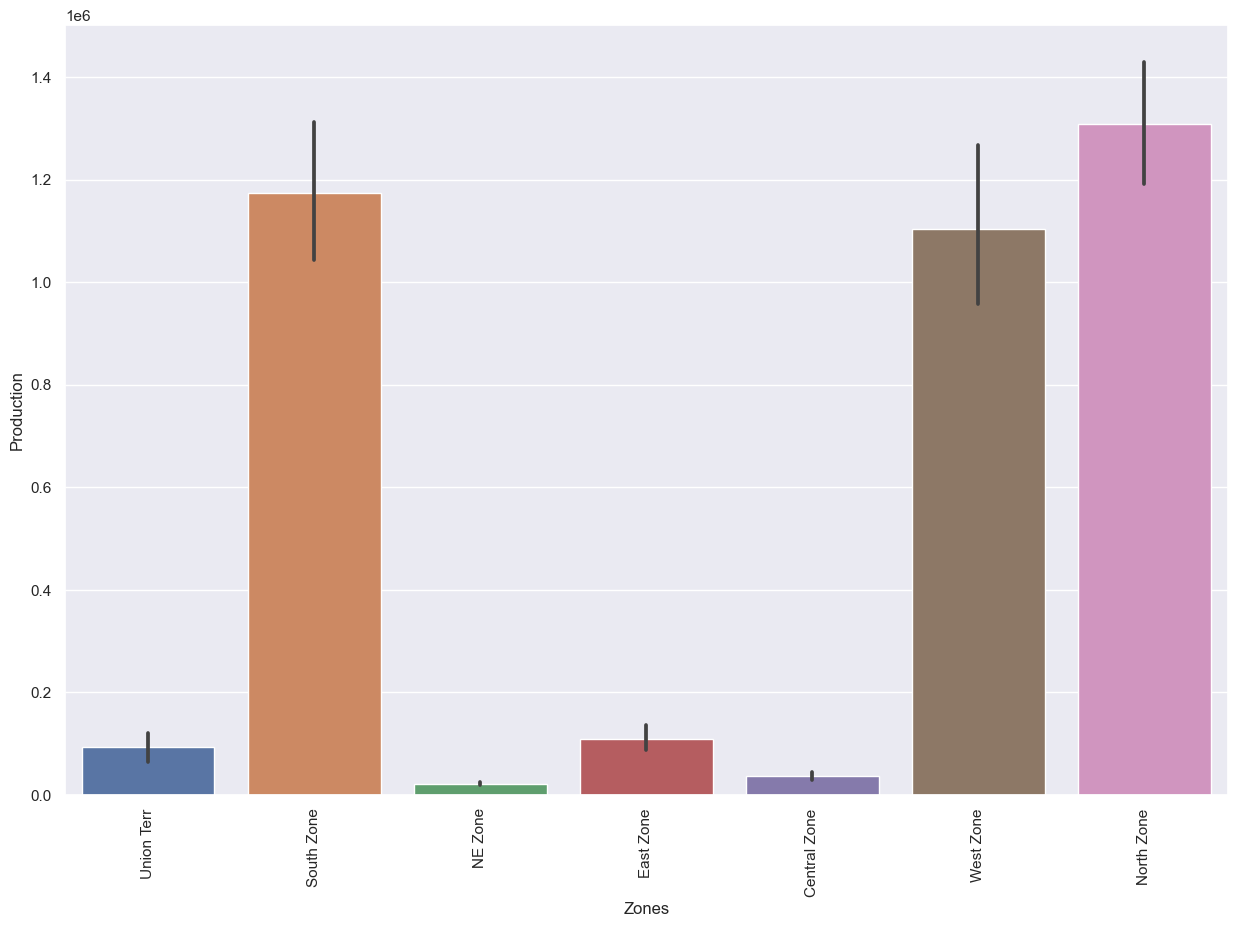

In [97]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= 'Zones',y='Production',data=sugarcane_df)
plt.show()

In [98]:
sugarcane_croptype_prod = sugarcane_df.groupby(by='Crop_type')['Production'].sum().reset_index().sort_values(by='Crop_type',ascending=False)
sugarcane_croptype_prod

Crop_type    Production
0  Commercial  5.535682e+09

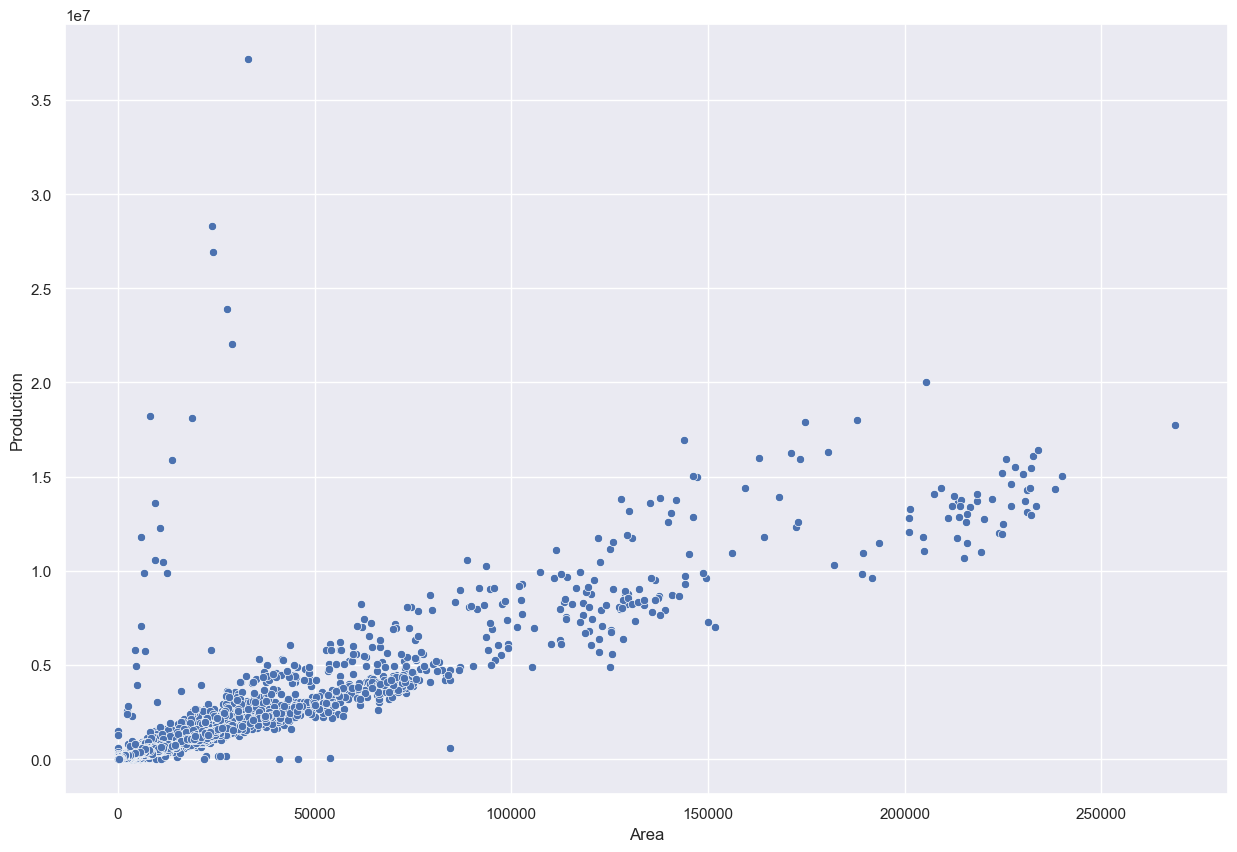

In [99]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Area",y="Production",data=sugarcane_df)
plt.show()

1. Sugarcane is grown heavily when we look at crops in India.
2. From Year 1997 - 2015 in India. The highest Sugarcane producing State is Uttarpradesh.
3. Rice is highly production has reached highest in the year 1997
4. During kharif the sugarcane production will be at its peak.
5. MUZAFFARNAGAR is the district which is highest in sugarcane production with 258698795.0 followed by BIJNOR is 230907185.0 which are uttarpradesh districts.
6. North Zone produces highest sugarcane in india.

In [100]:
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [101]:
zone_prod_df = df.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Zones',ascending=False)
zone_prod_df

Zones    Production
6     West Zone  2.575008e+09
5    Union Terr  1.104796e+09
4    South Zone  1.284797e+11
3    North Zone  4.365489e+09
2       NE Zone  2.165305e+09
1     East Zone  1.936070e+09
0  Central Zone  5.497926e+08

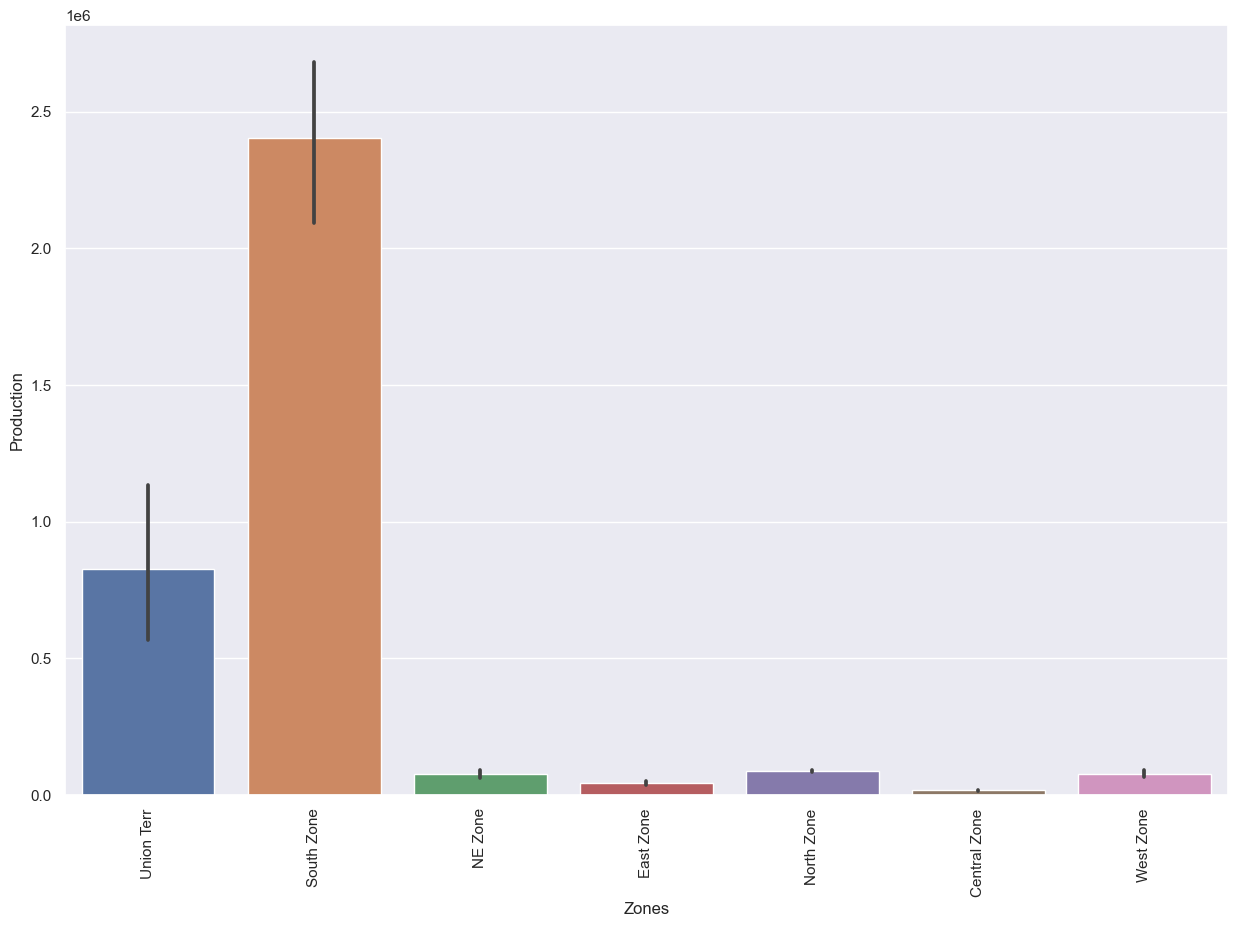

In [102]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x= 'Zones',y='Production',data=df)
plt.show()

Highest Crop Producers Zones of India are South Zone, Union terr and North Zone

# South Zone Analysis

In [103]:
south_zone_df = df[df['Zones']=='South Zone']

In [104]:
south_zone_df

State_Name District_Name  Crop_Year       Season          Crop  \
203     Andhra Pradesh     ANANTAPUR       1997  Kharif          Arhar/Tur   
204     Andhra Pradesh     ANANTAPUR       1997  Kharif              Bajra   
205     Andhra Pradesh     ANANTAPUR       1997  Kharif        Castor seed   
206     Andhra Pradesh     ANANTAPUR       1997  Kharif       Cotton(lint)   
207     Andhra Pradesh     ANANTAPUR       1997  Kharif       Dry chillies   
...                ...           ...        ...          ...           ...   
196859      Telangana       WARANGAL       2014  Rabi            Sunflower   
196860      Telangana       WARANGAL       2014  Rabi         Sweet potato   
196861      Telangana       WARANGAL       2014  Rabi              Tobacco   
196862      Telangana       WARANGAL       2014  Rabi                 Urad   
196863      Telangana       WARANGAL       2014  Whole Year      Coriander   

           Area  Production       Zones   Crop_type  
203     21400.0      2600.0  South Zone      Pulses  
204      1400.0       500.0  South Zone      Cereal  
205      1000.0       100.0  South Zone    oilseeds  
206      7300.0      9400.0  South Zone      fibres  
207      3700.0      7100.0  South Zone      spices  
...         ...         ...         ...         ...  
196859     21.0        30.0  South Zone    oilseeds  
196860     42.0       326.0  South Zone  Vegetables  
196861     70.0       137.0  South Zone  Commercial  
196862   1494.0       607.0  South Zone      Pulses  
196863     38.0         9.0  South Zone      spices  

[53500 rows x 9 columns]

In [105]:
south_zone_df['Crop_type'].unique()

array(['Pulses', 'Cereal', 'oilseeds', 'fibres', 'spices', 'Nuts',
       'Beans', 'Commercial', 'Vegetables', 'Fruits'], dtype=object)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone Crops vs Production')

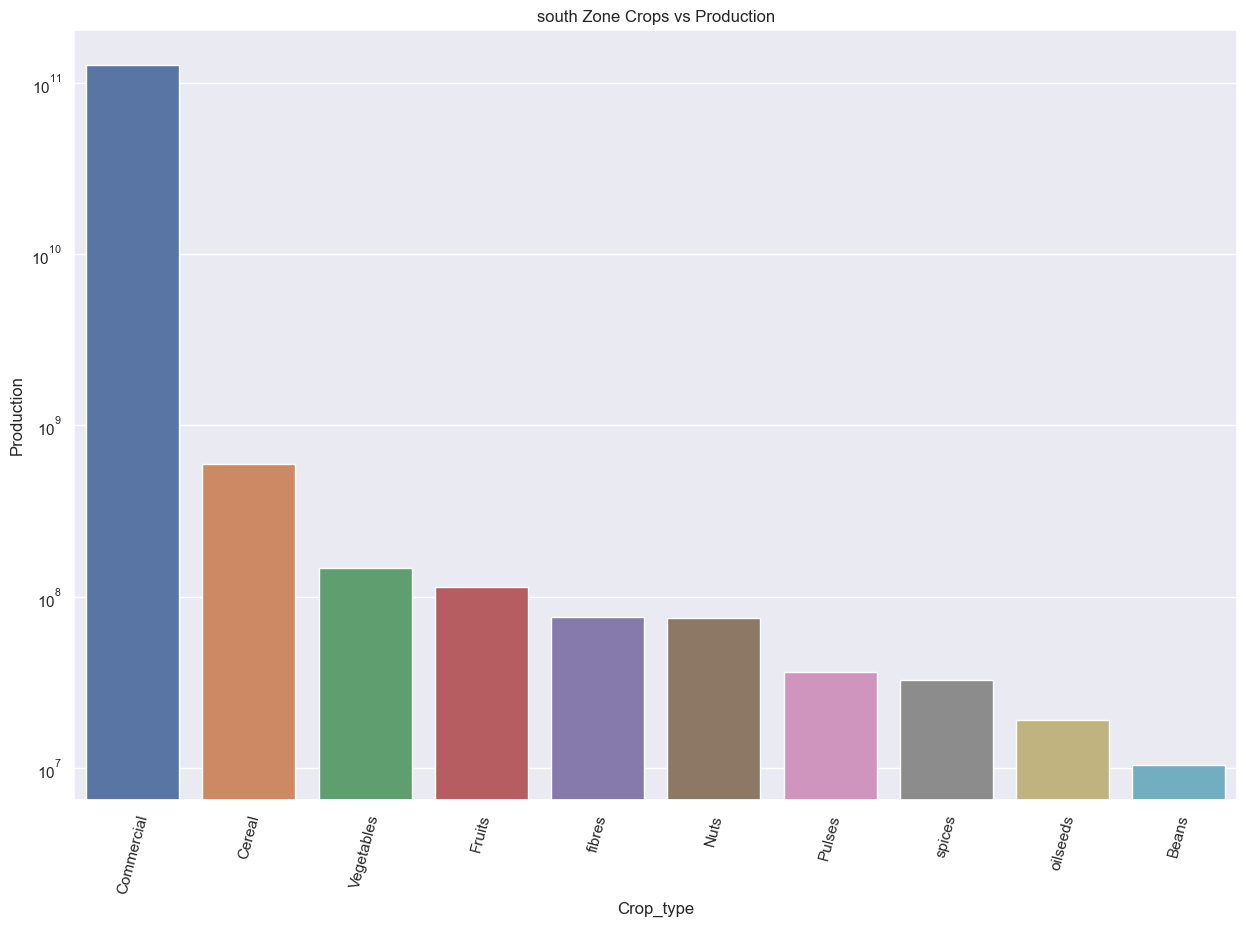

In [106]:
df3 = south_zone_df.groupby(by='Crop_type')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df3.Crop_type, df3.Production)
plt.xticks(rotation=75)
plt.yscale('log')
plt.title('south Zone Crops vs Production')

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone Crops vs Production')

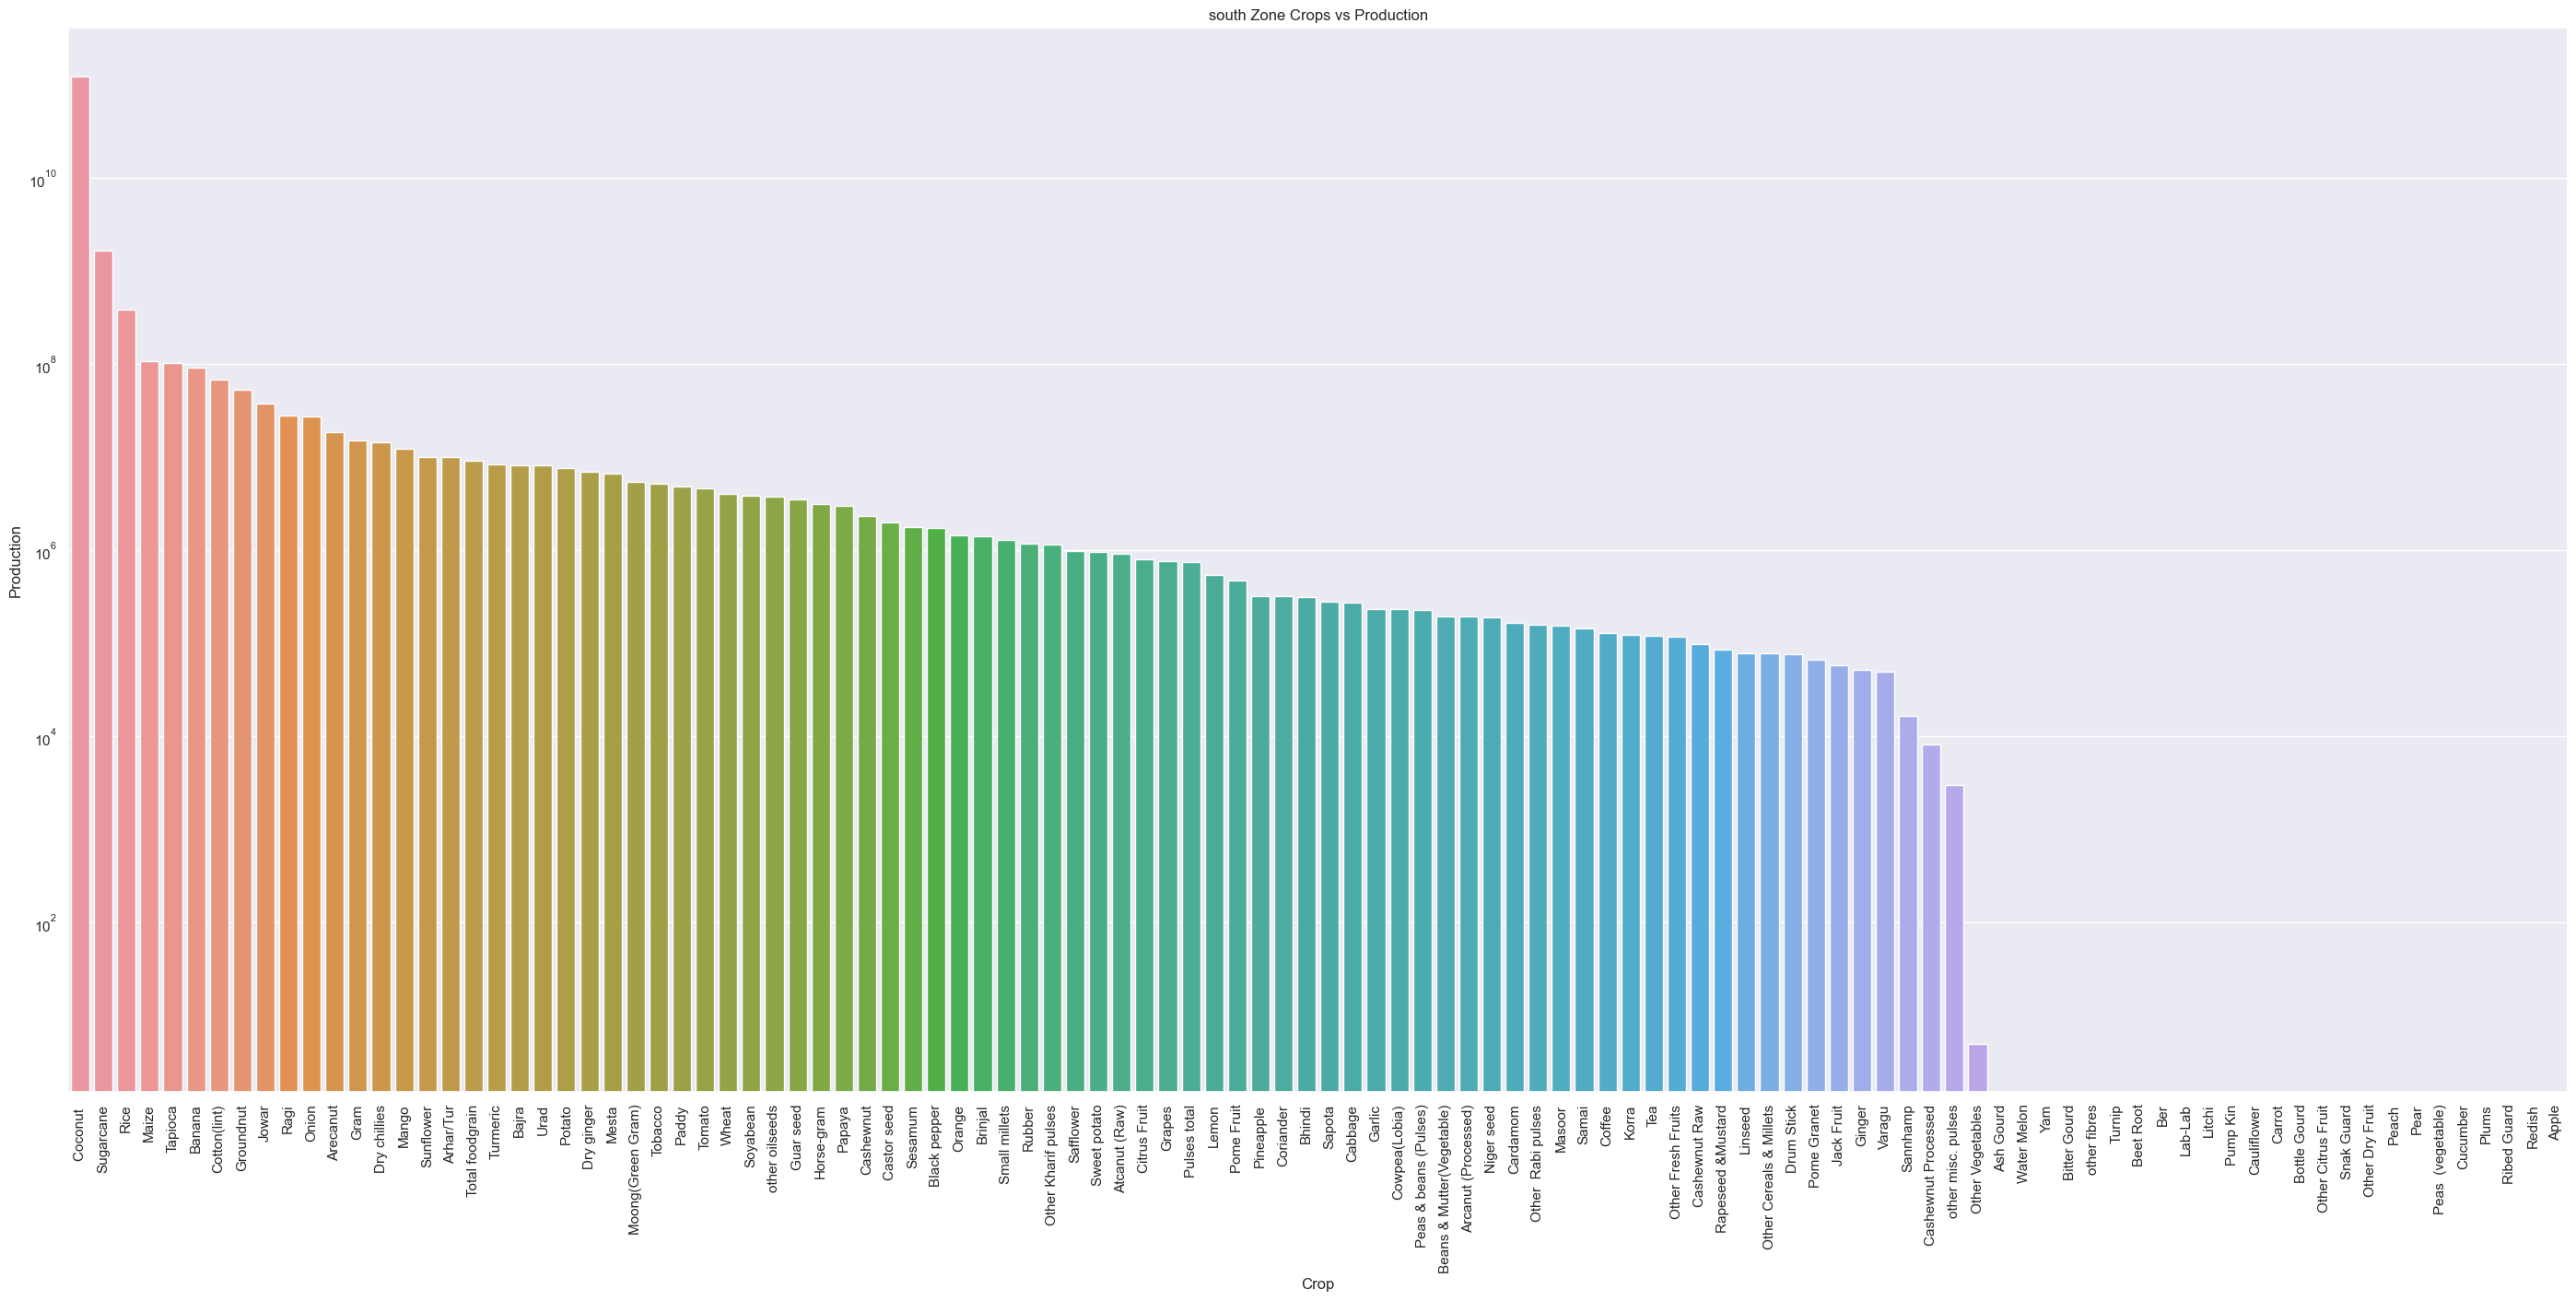

In [107]:
df3 = south_zone_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,15))
sns.barplot(df3.Crop, df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone Crops vs Production')

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone Seasons vs Production')

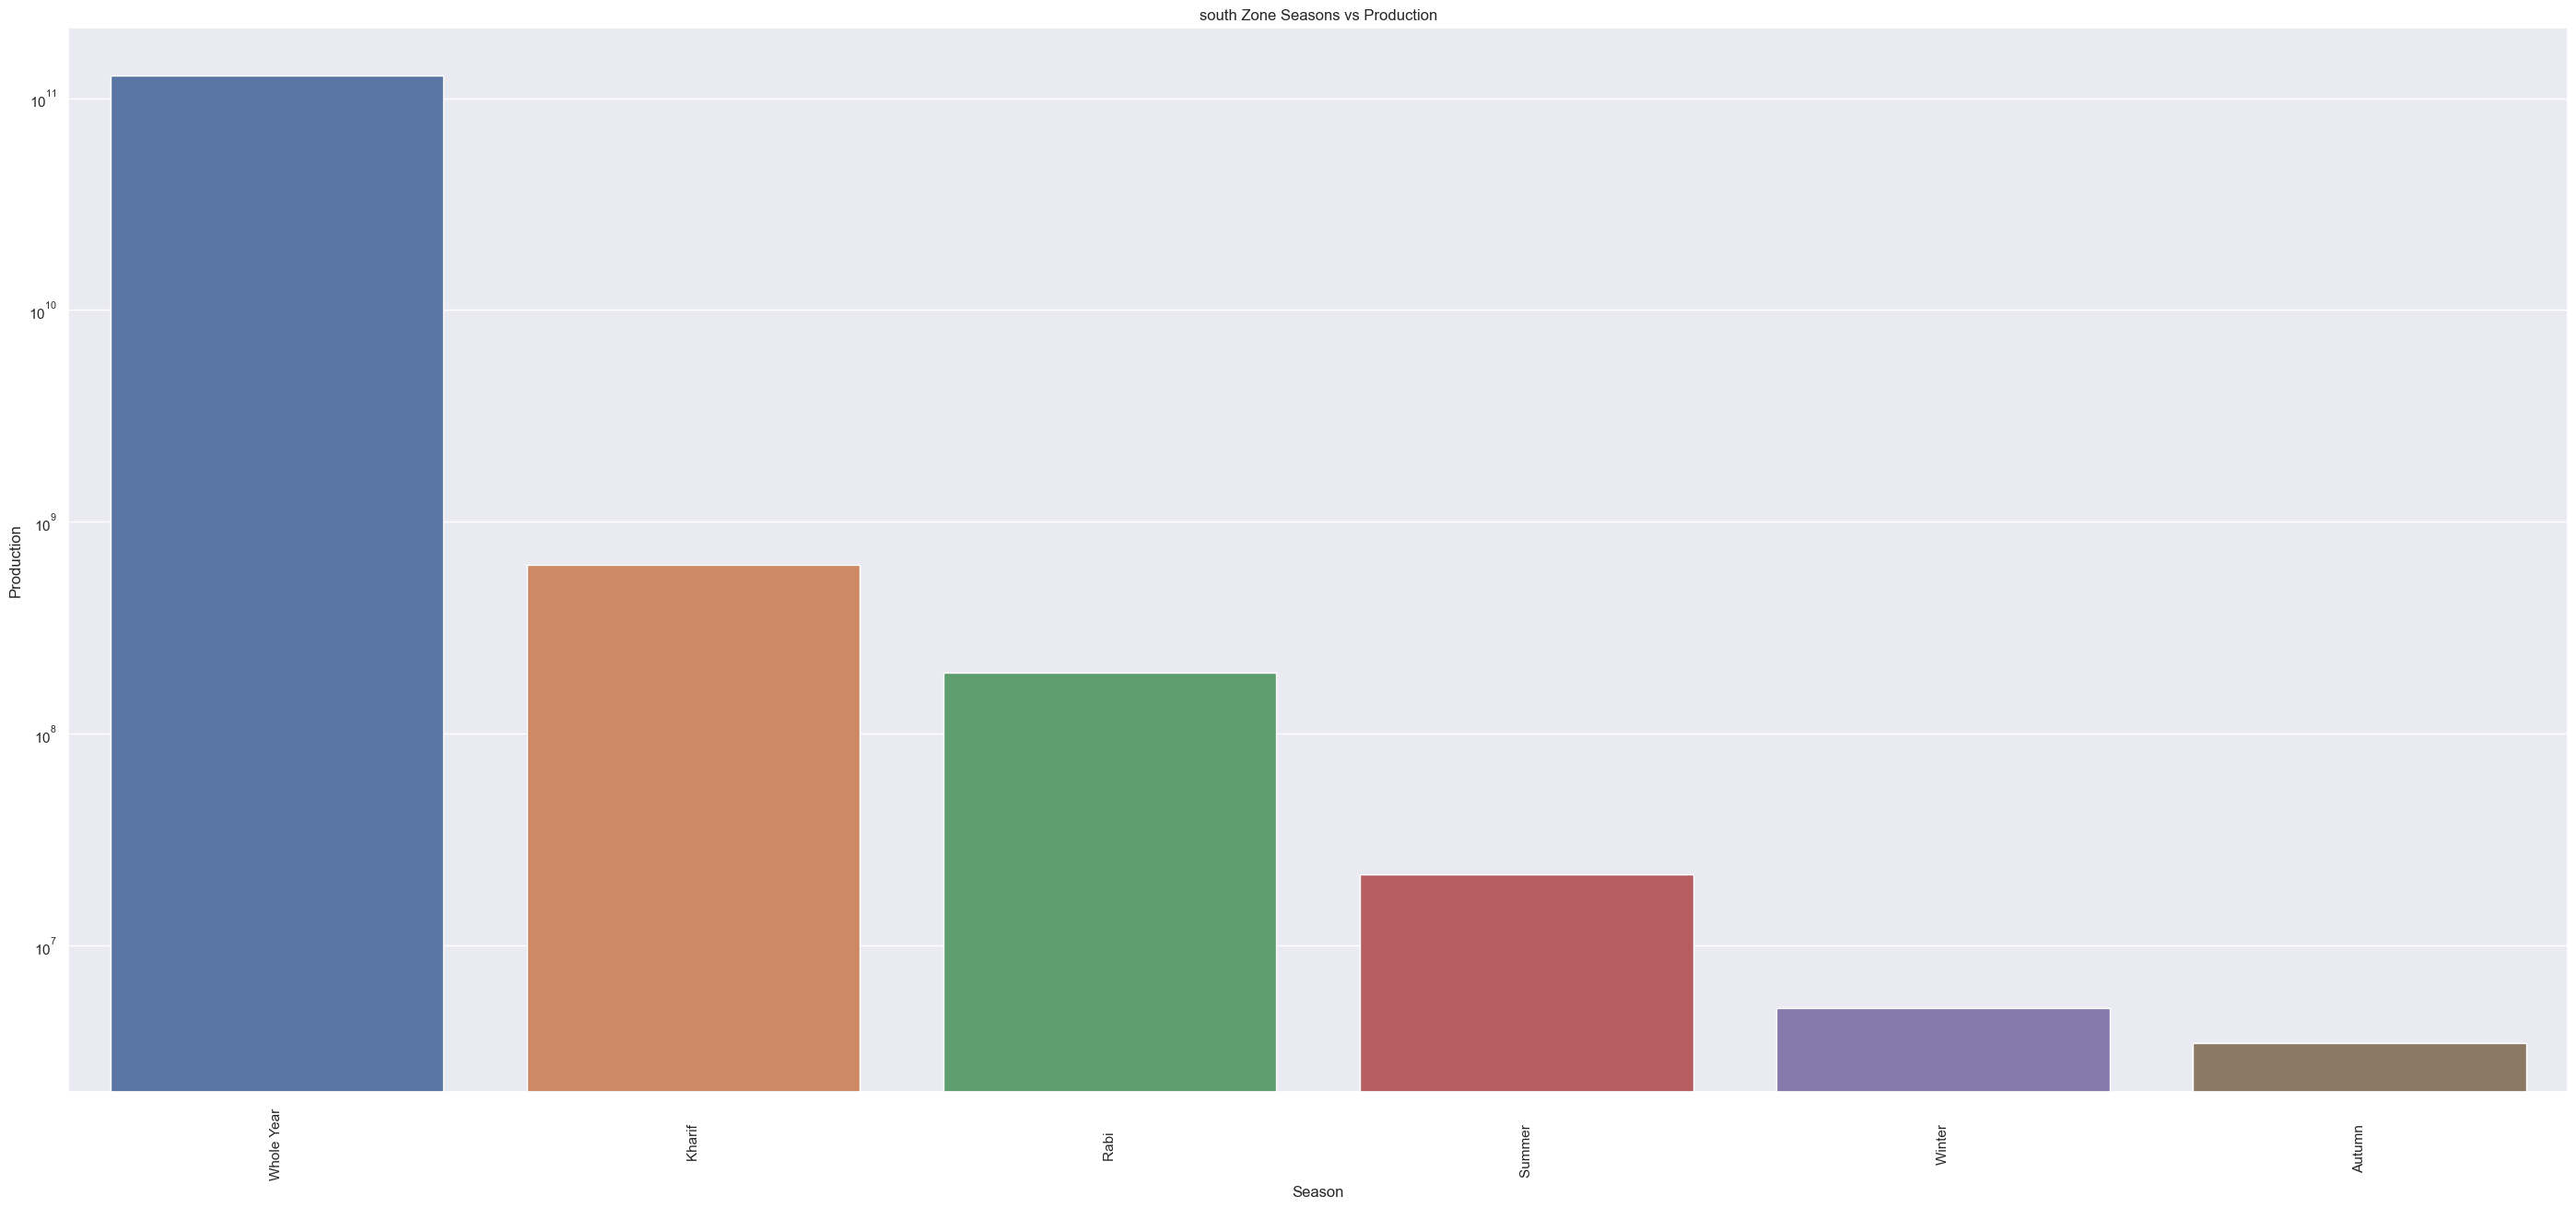

In [108]:
df3 = south_zone_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,15))
sns.barplot(df3.Season, df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone Seasons vs Production')

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone crop year vs Production')

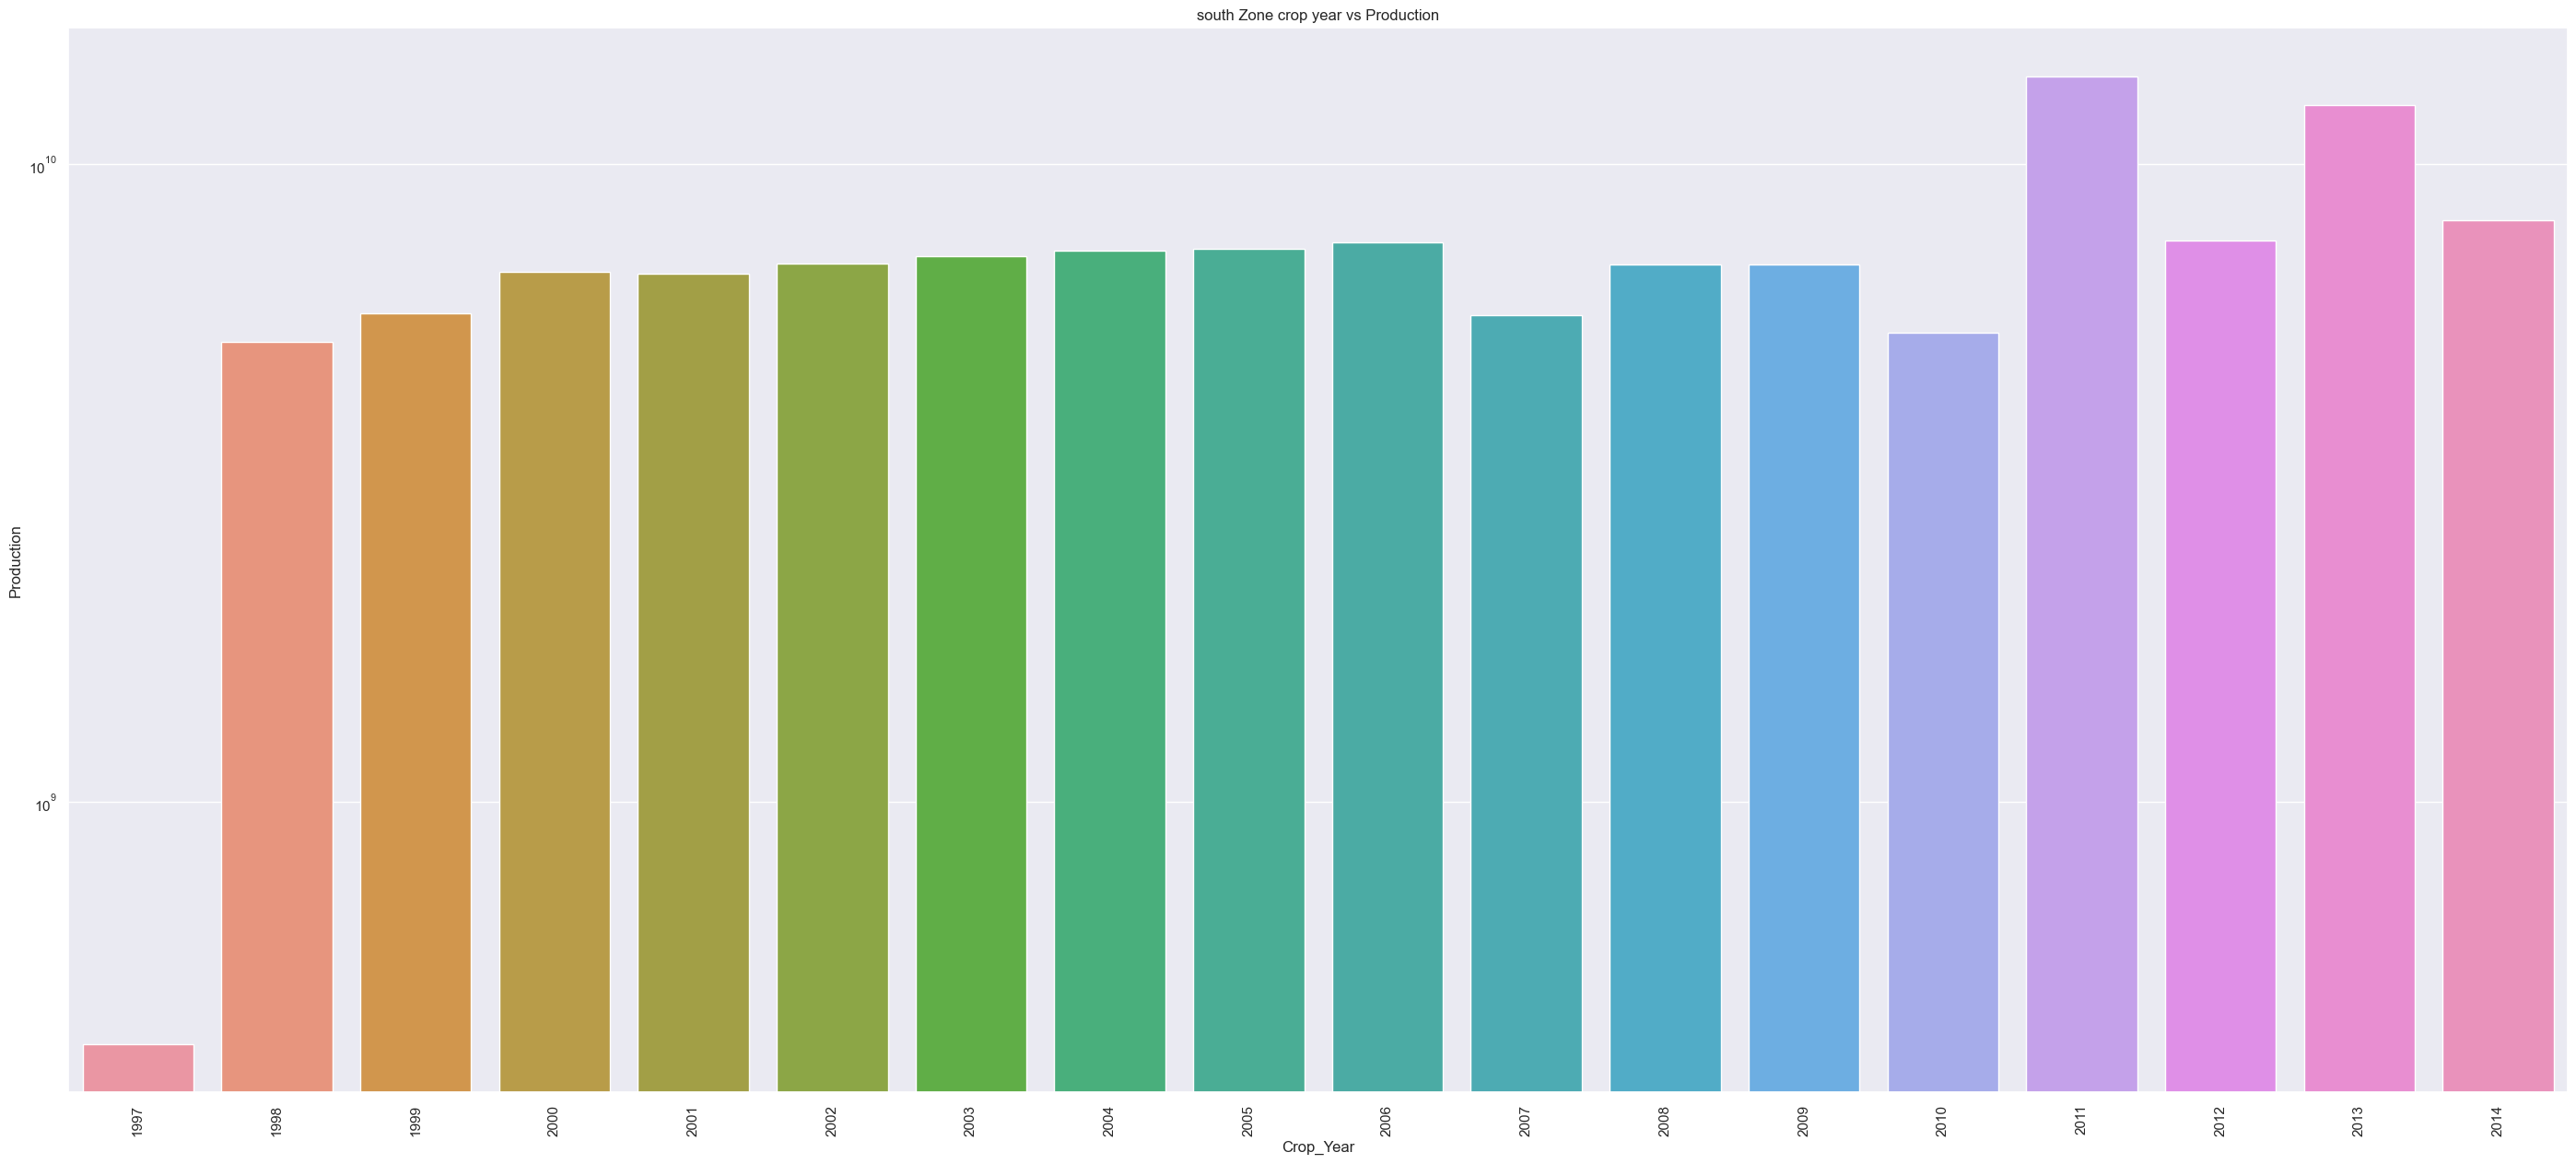

In [109]:
df3 = south_zone_df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,15))
sns.barplot(df3.Crop_Year, df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone crop year vs Production')

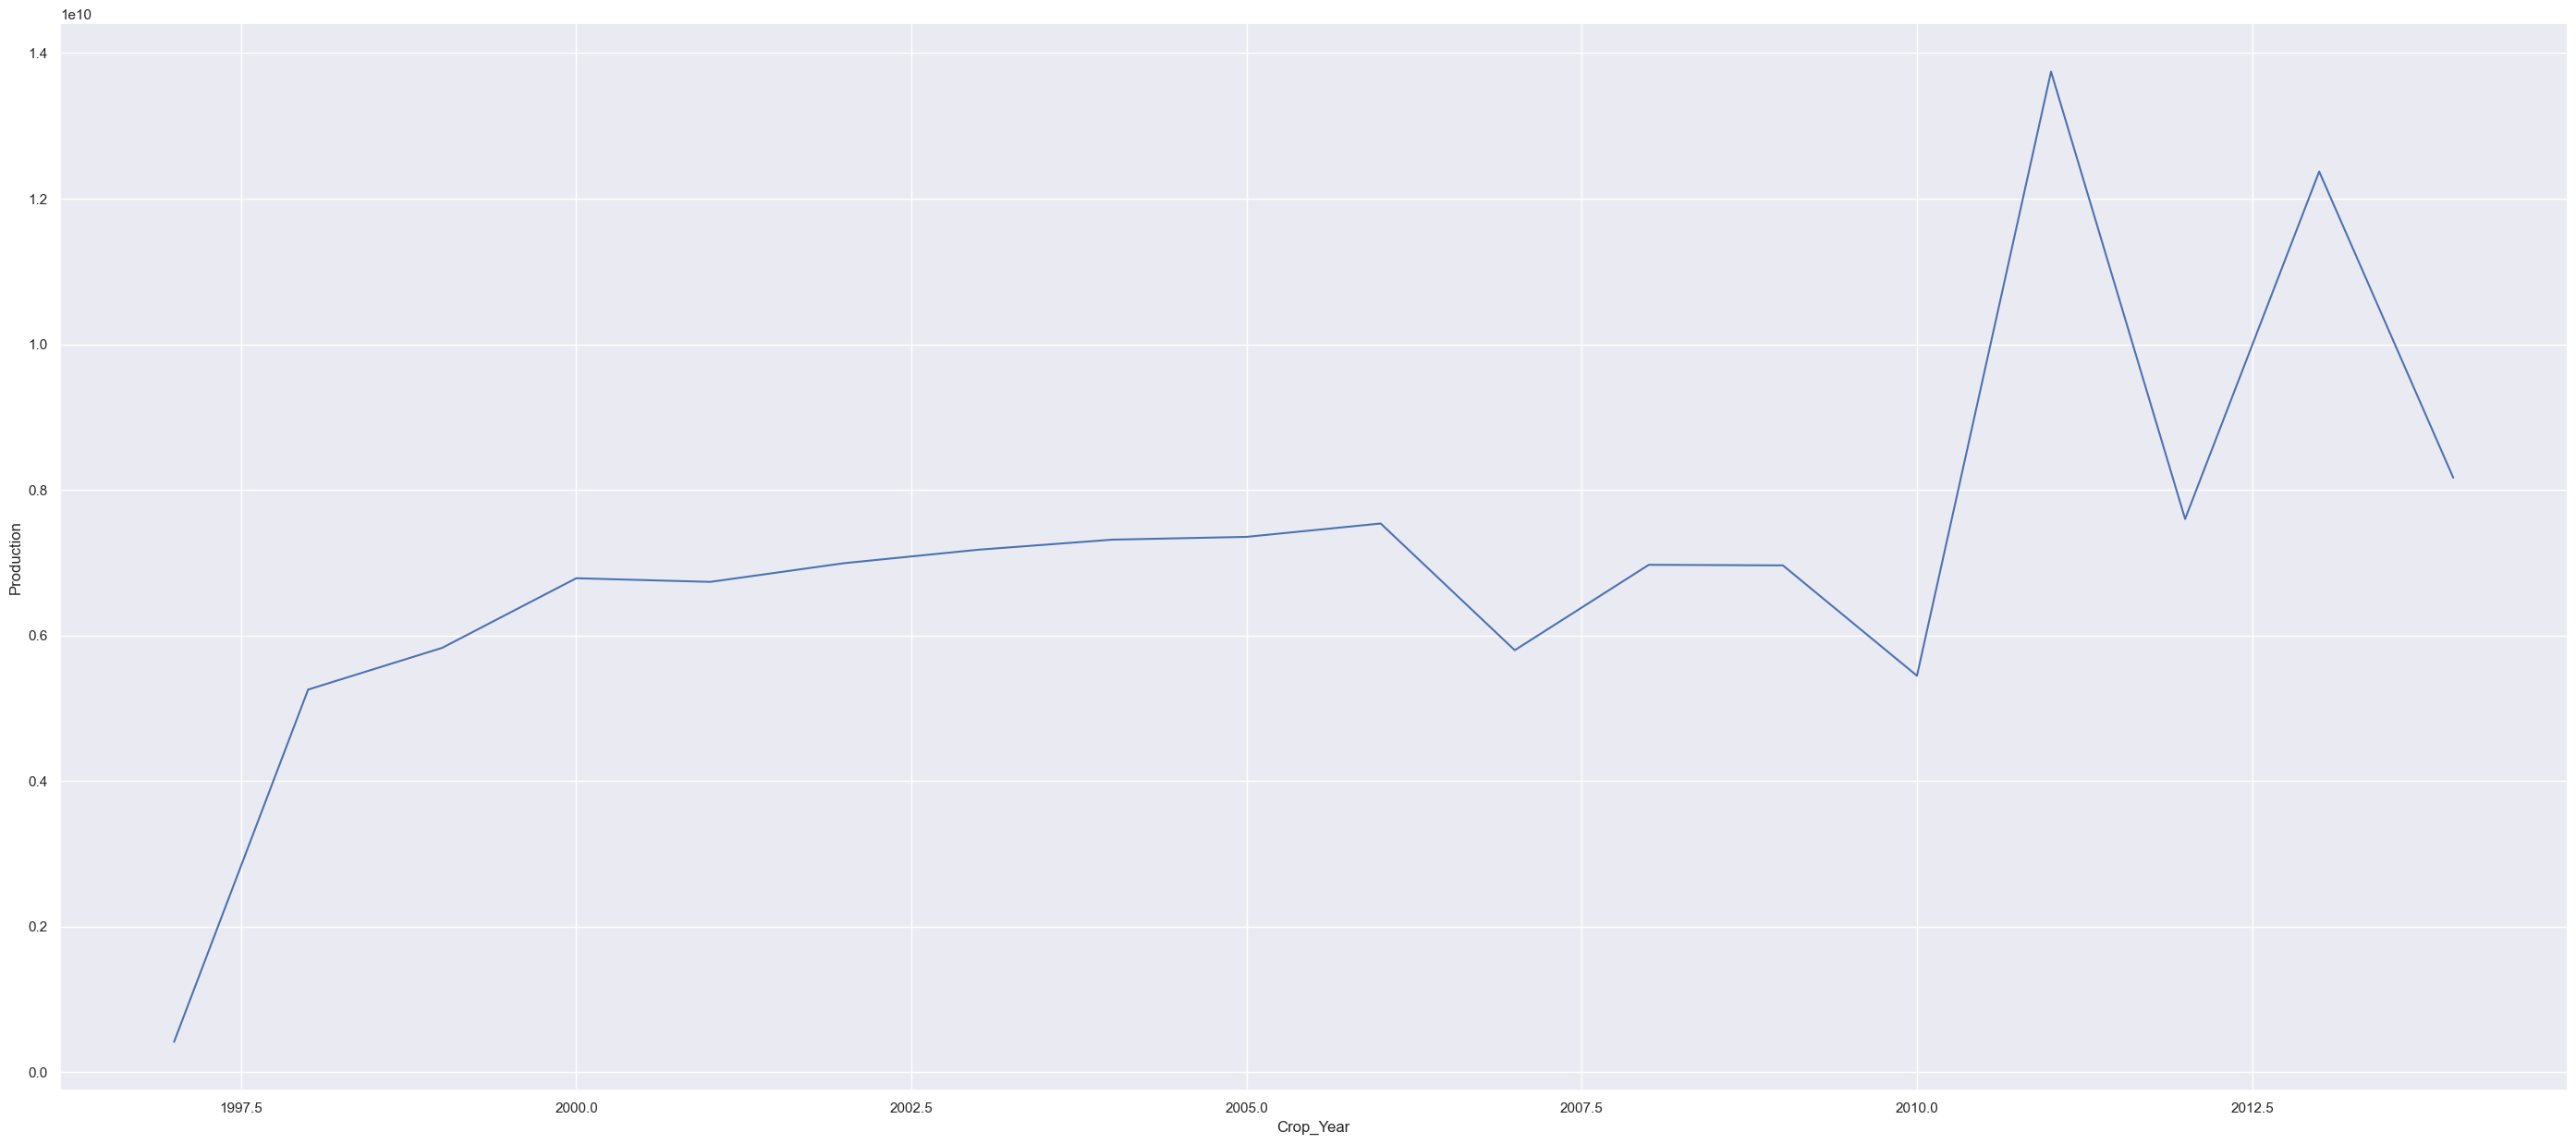

In [110]:
plt.figure(figsize=(35,15))
sns.lineplot(x=df3['Crop_Year'],y=df3.Production)
plt.show()

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone crop year vs Production')

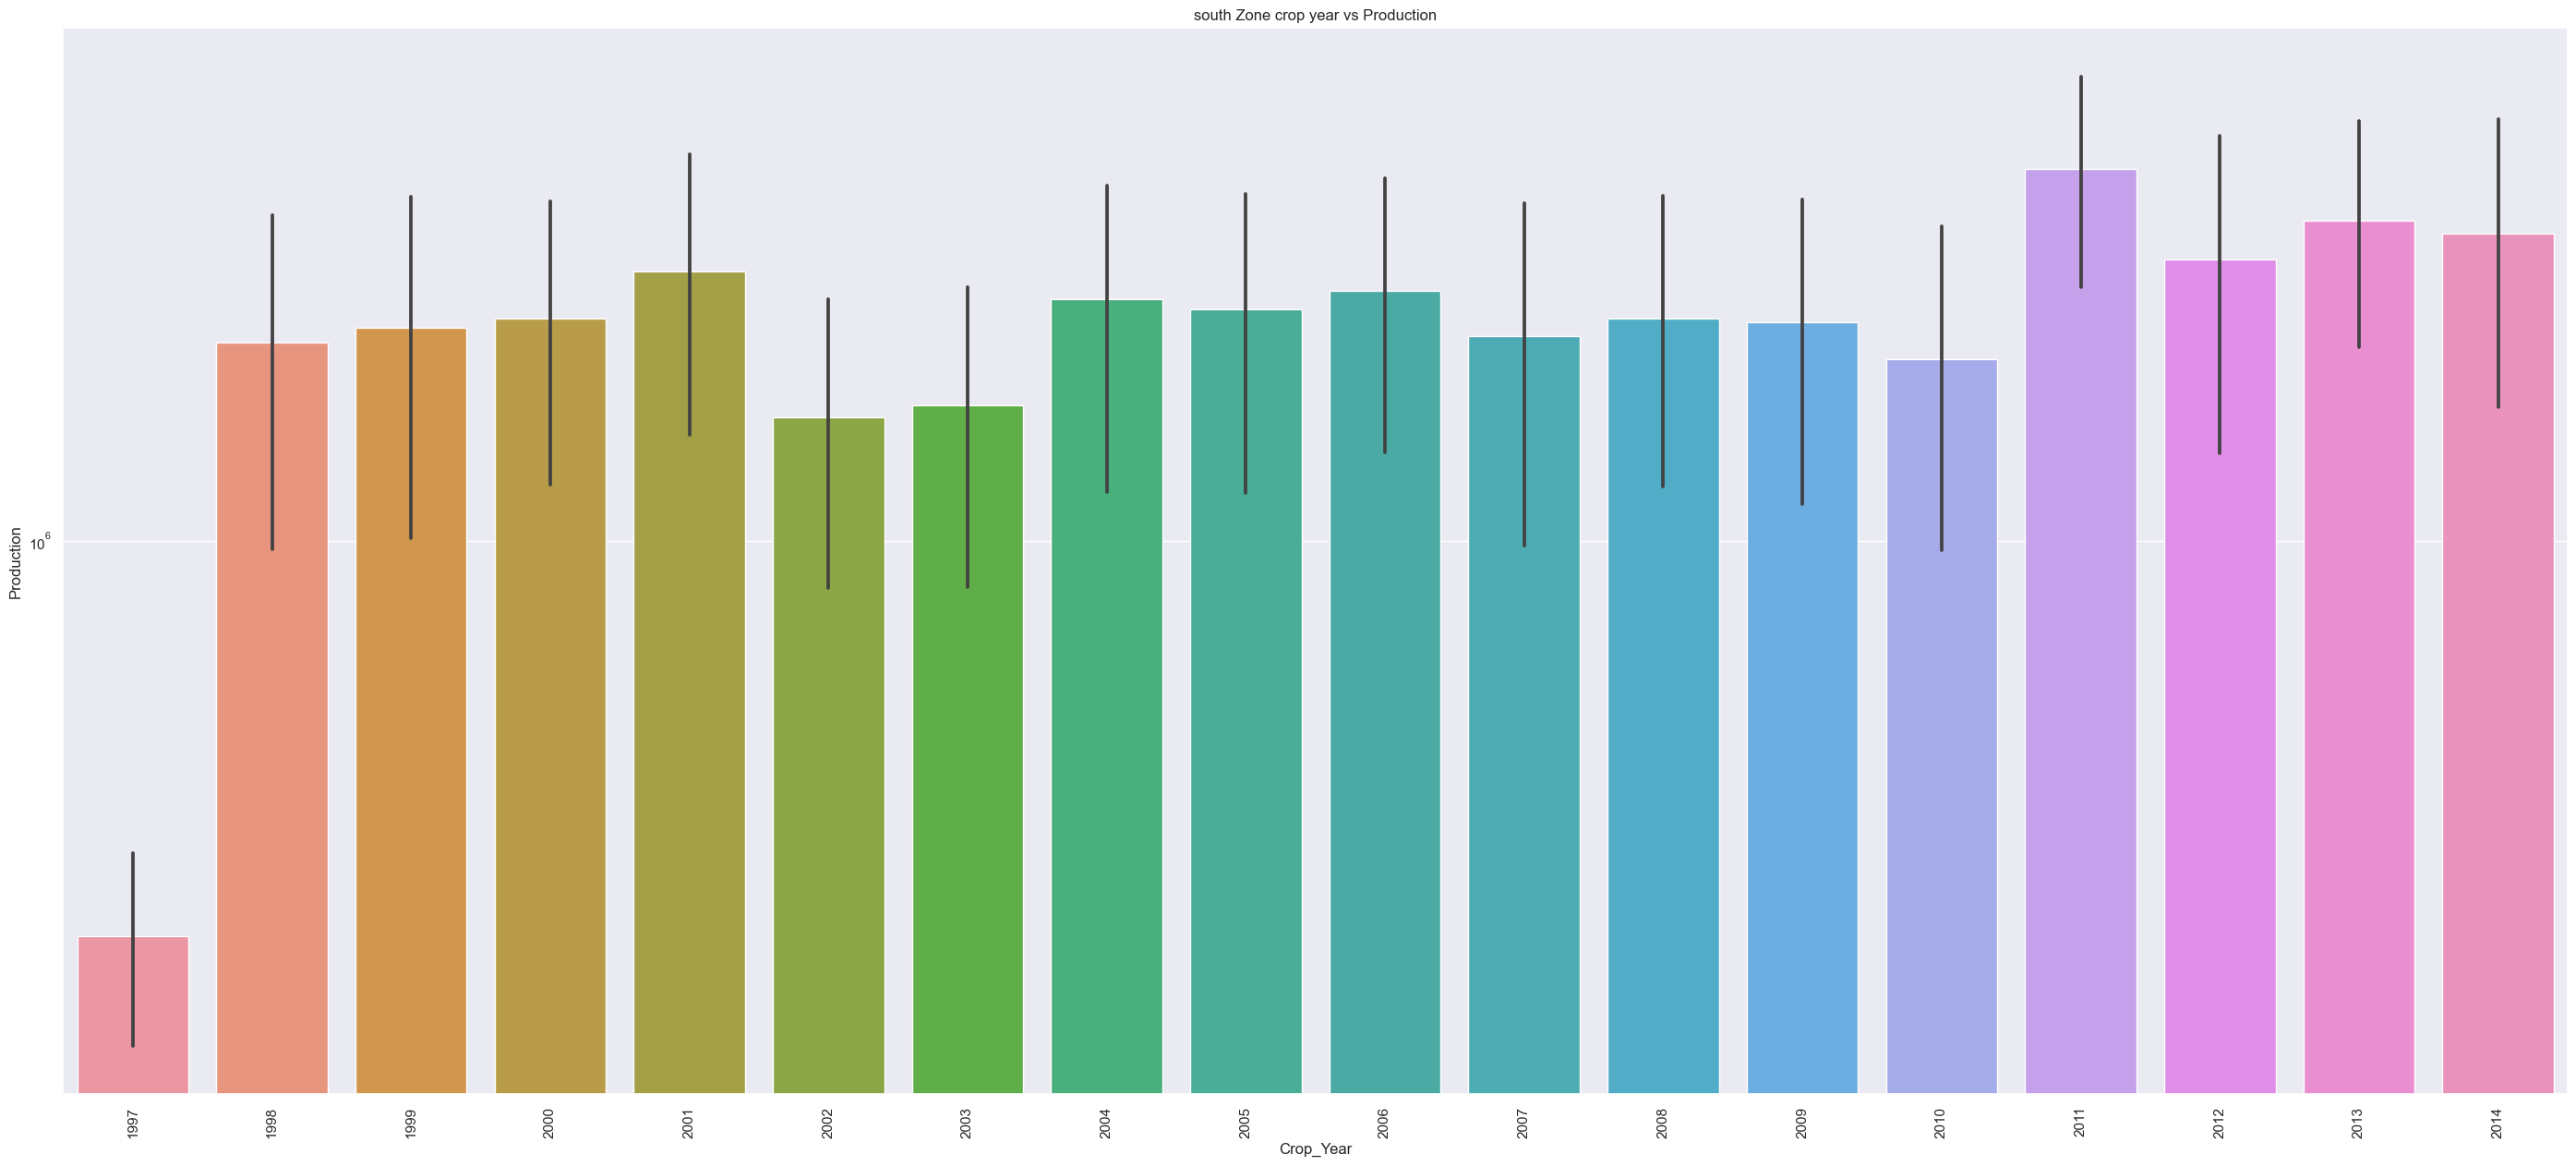

In [111]:
plt.figure(figsize=(35,15))
sns.barplot(south_zone_df.Crop_Year, south_zone_df.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone crop year vs Production')

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone district vs Production')

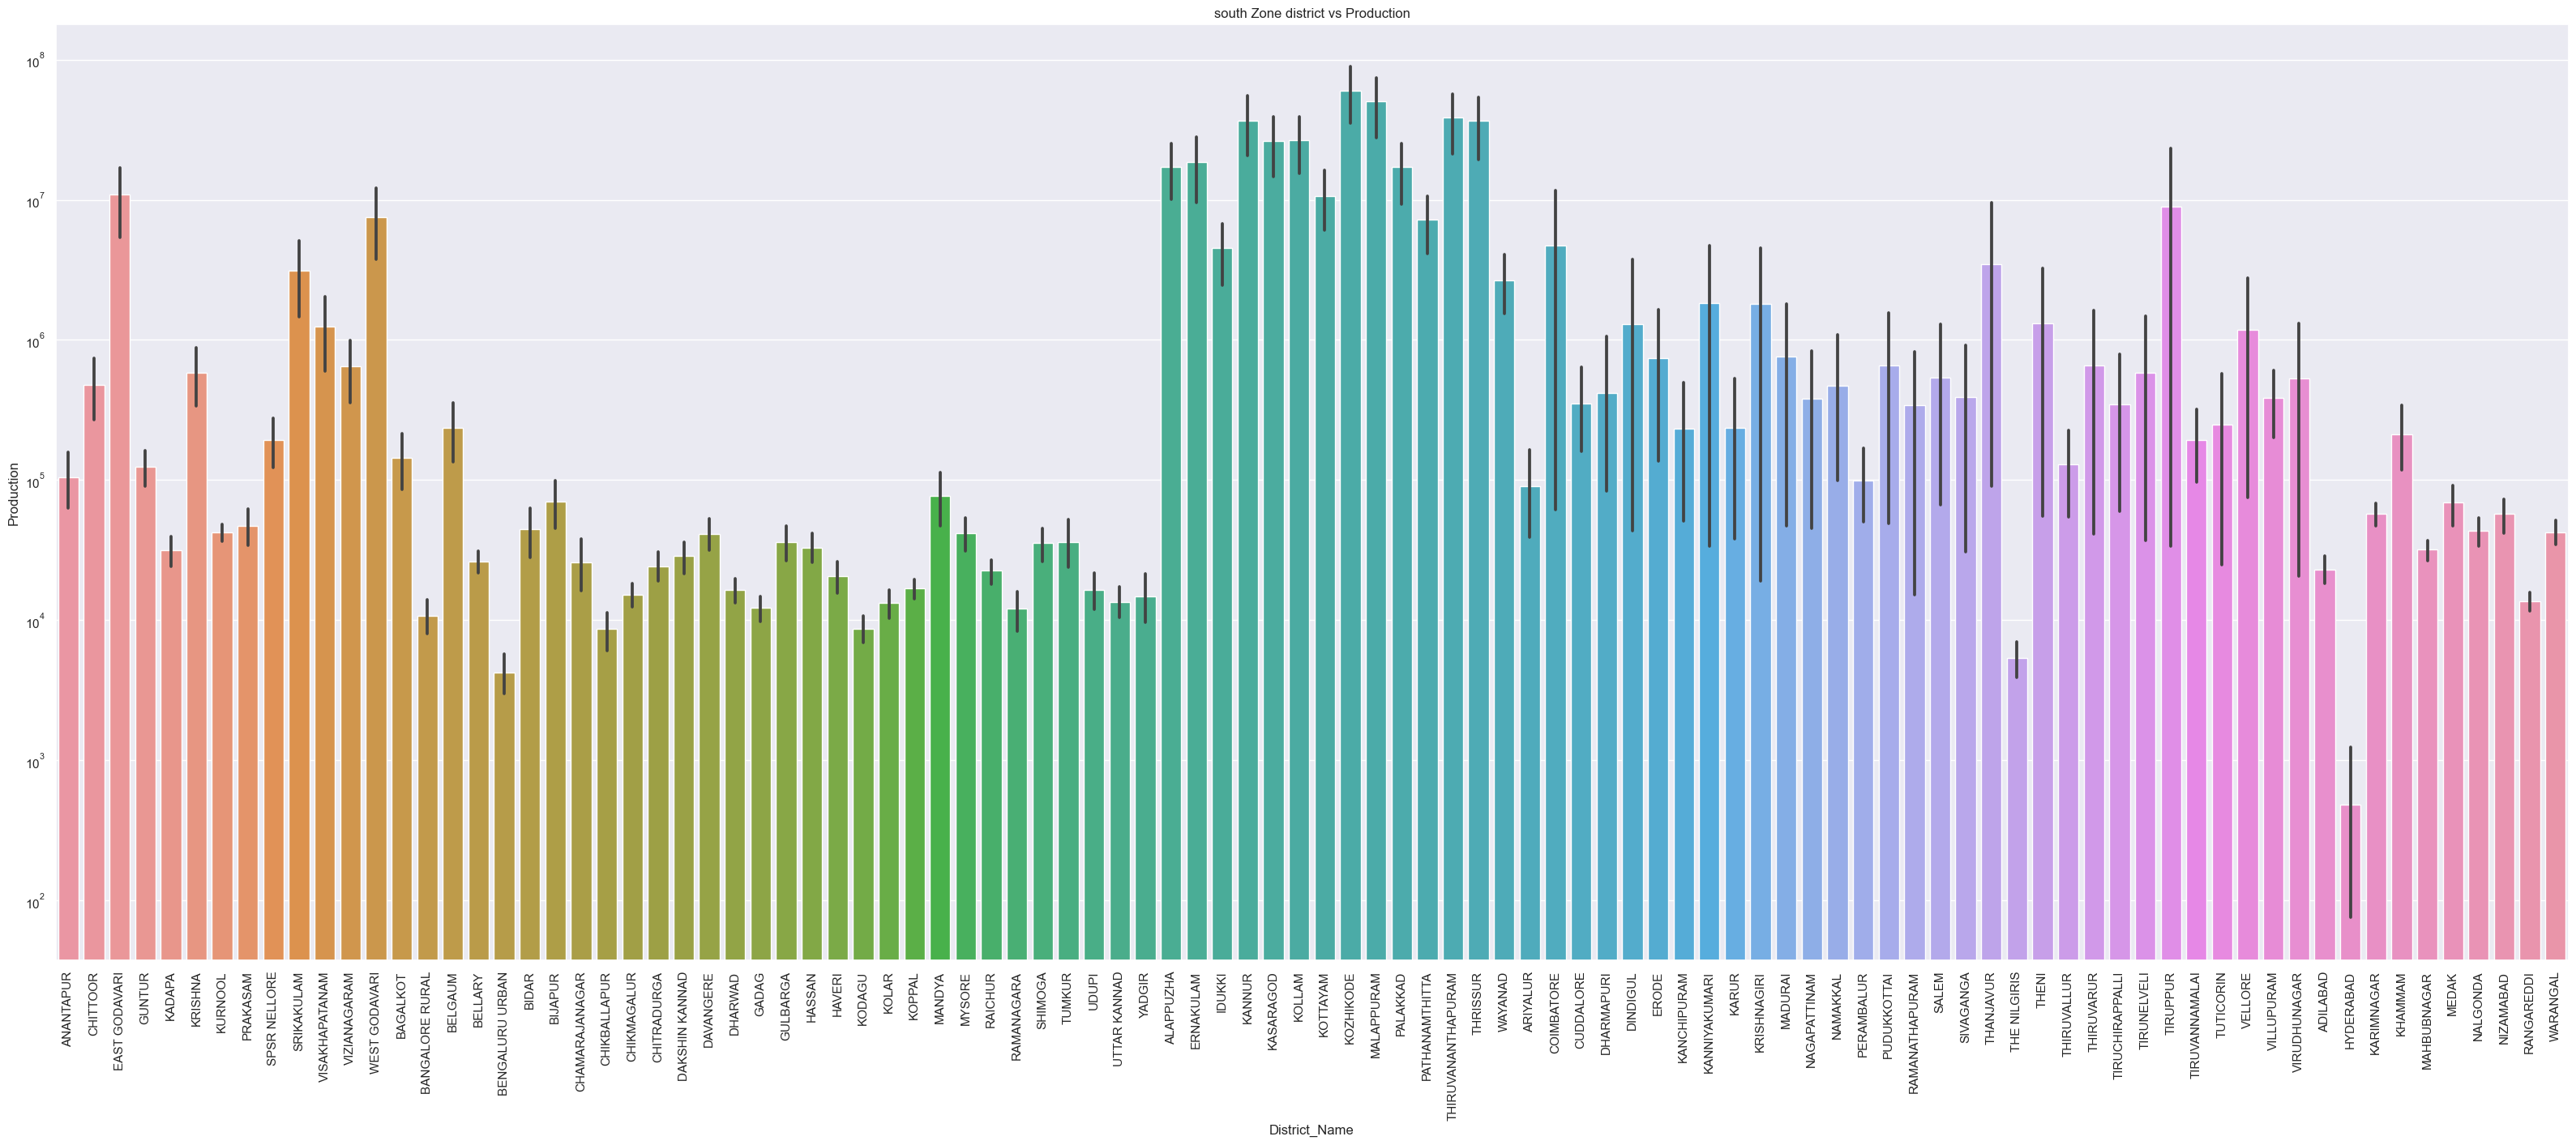

In [112]:
plt.figure(figsize=(40,15))
sns.barplot(south_zone_df.District_Name, south_zone_df.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone district vs Production')

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='District_Name', ylabel='Production'>

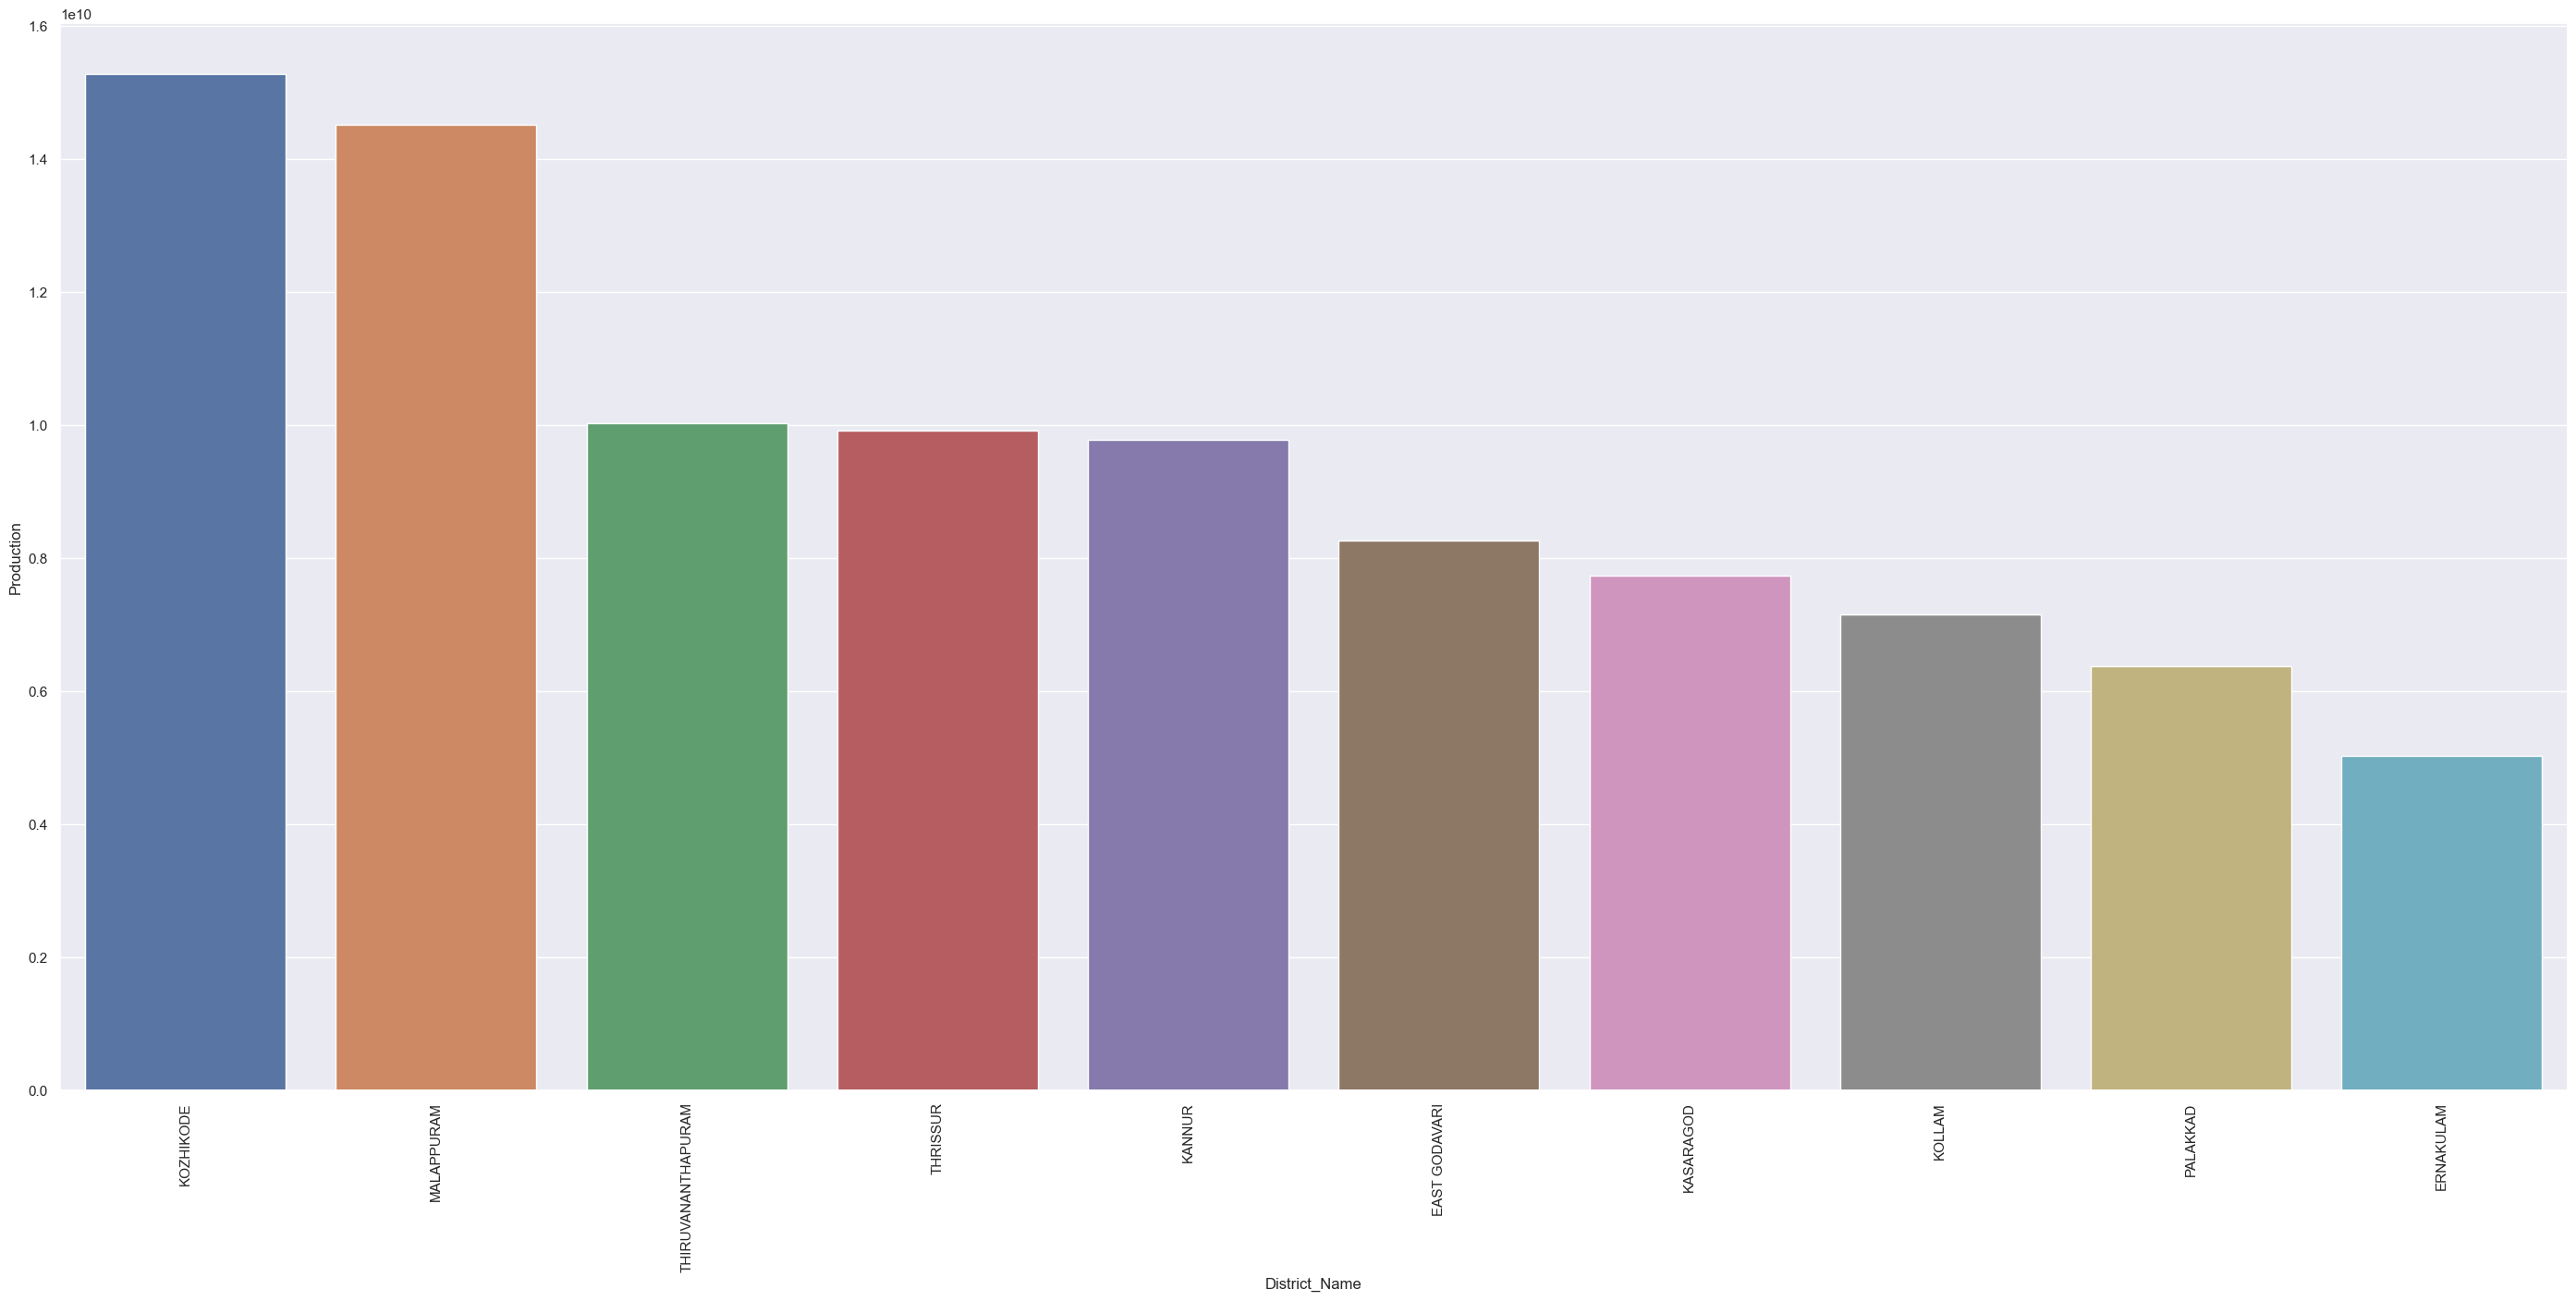

In [113]:
df4 = south_zone_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
df4=df4[:10]
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
sns.barplot(df4.District_Name,df4.Production)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'south Zone vs Production')

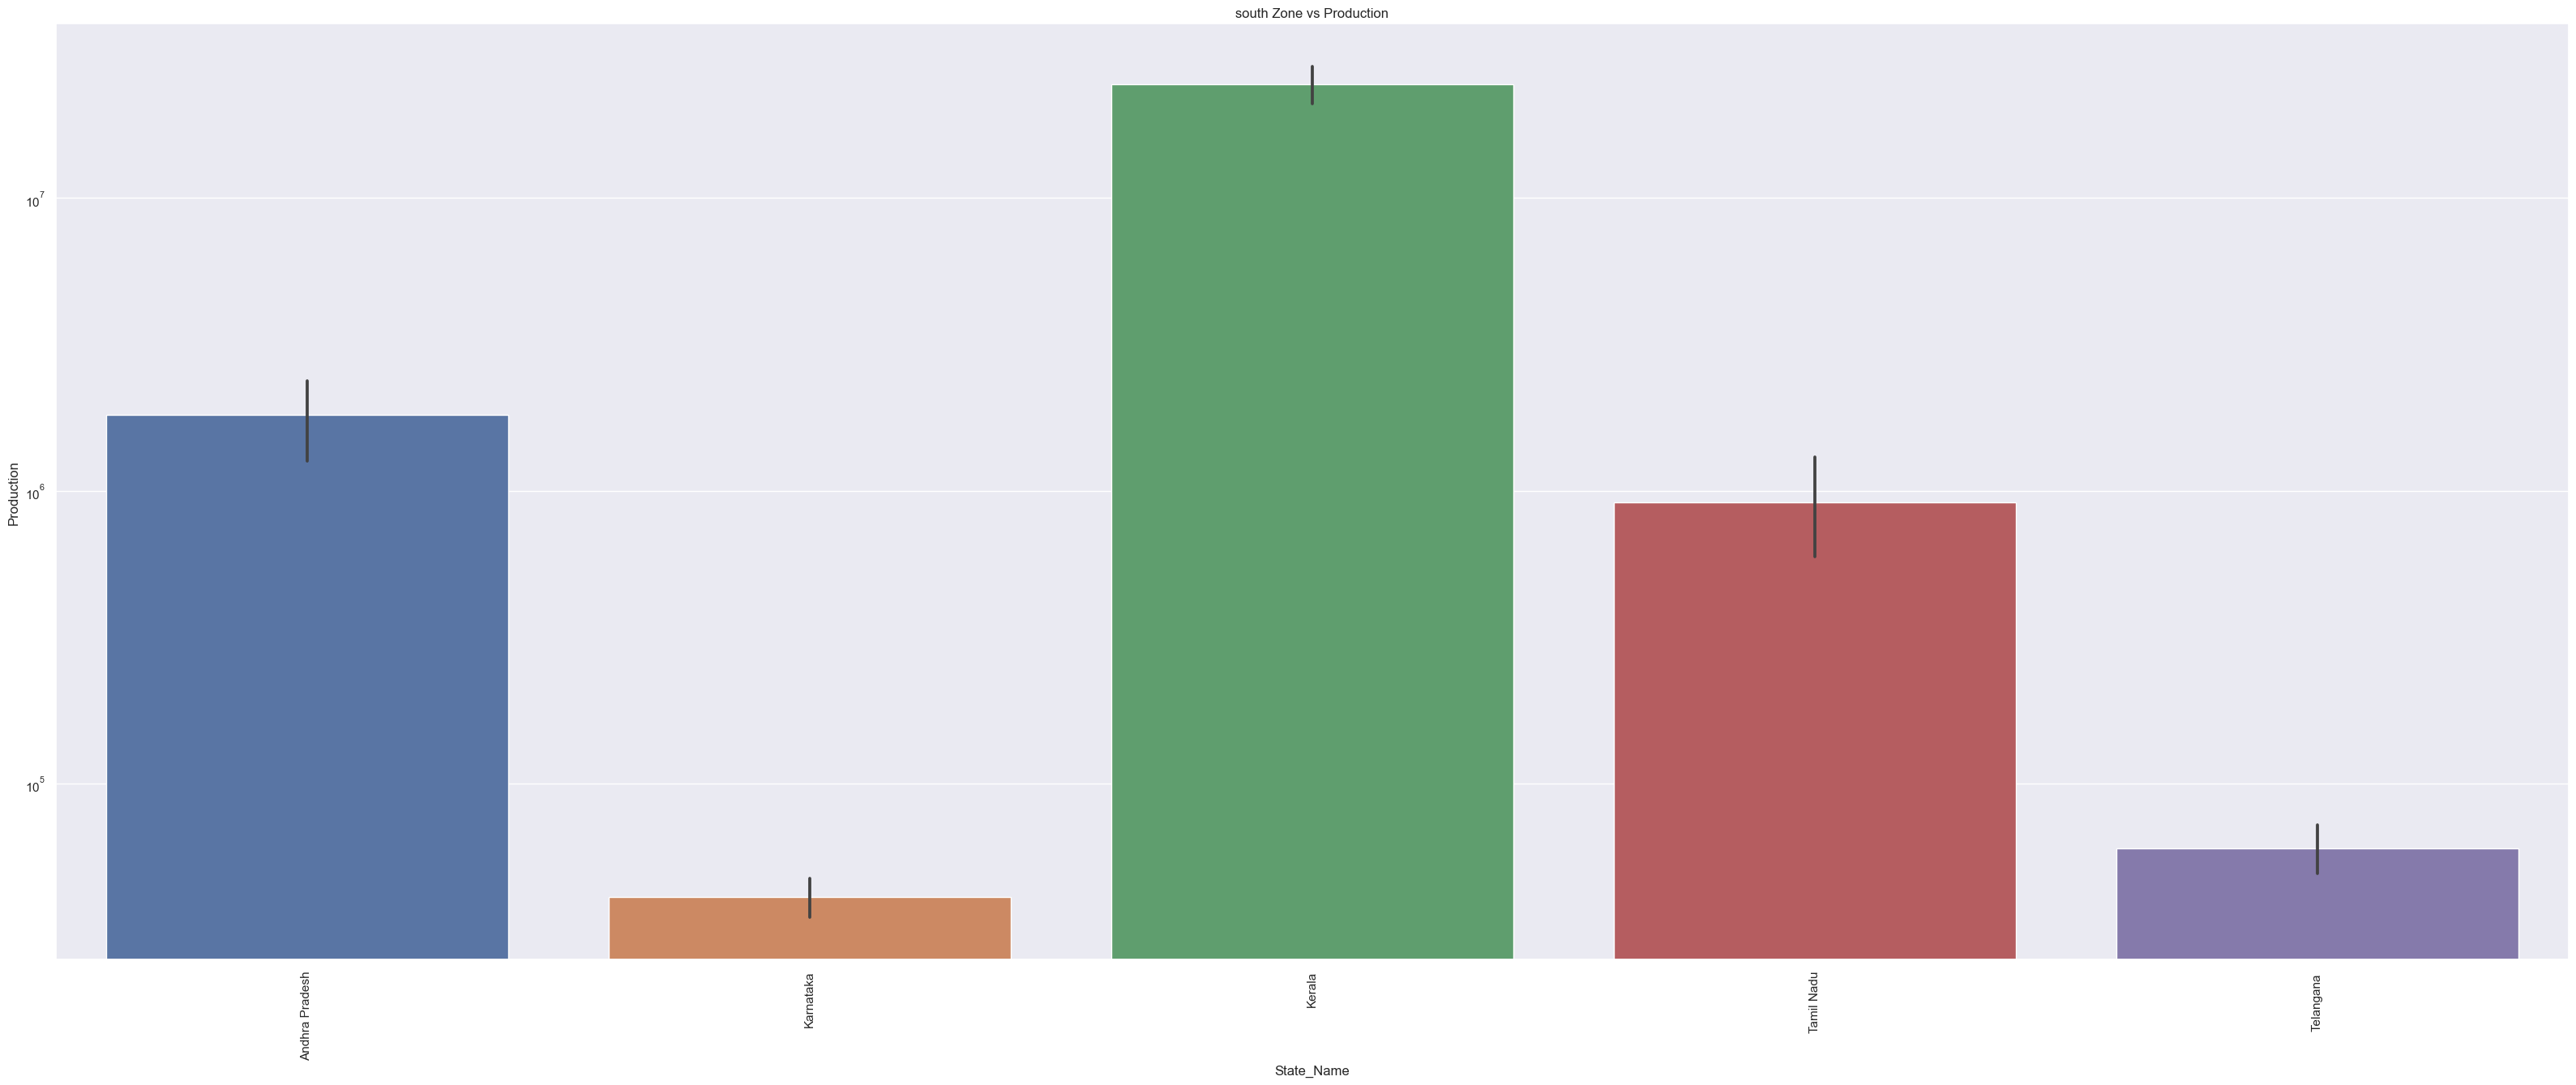

In [114]:
plt.figure(figsize=(40,15))
sns.barplot(south_zone_df.State_Name, south_zone_df.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('south Zone vs Production')

([<matplotlib.patches.Wedge at 0x21181537fa0>,
 [Text(-0.8061883900310172, 0.7483717523926171, 'Kerala'),
  Text(0.5254083263090866, -0.9664088630828489, 'Andhra Pradesh'),
  Text(1.0318275058697355, -0.38122434094721874, 'Tamil Nadu'),
  Text(1.0992265352312387, -0.04124347516306766, 'Karnataka'),
  Text(1.0999630618546556, -0.0090145746062426, 'Telangana ')])

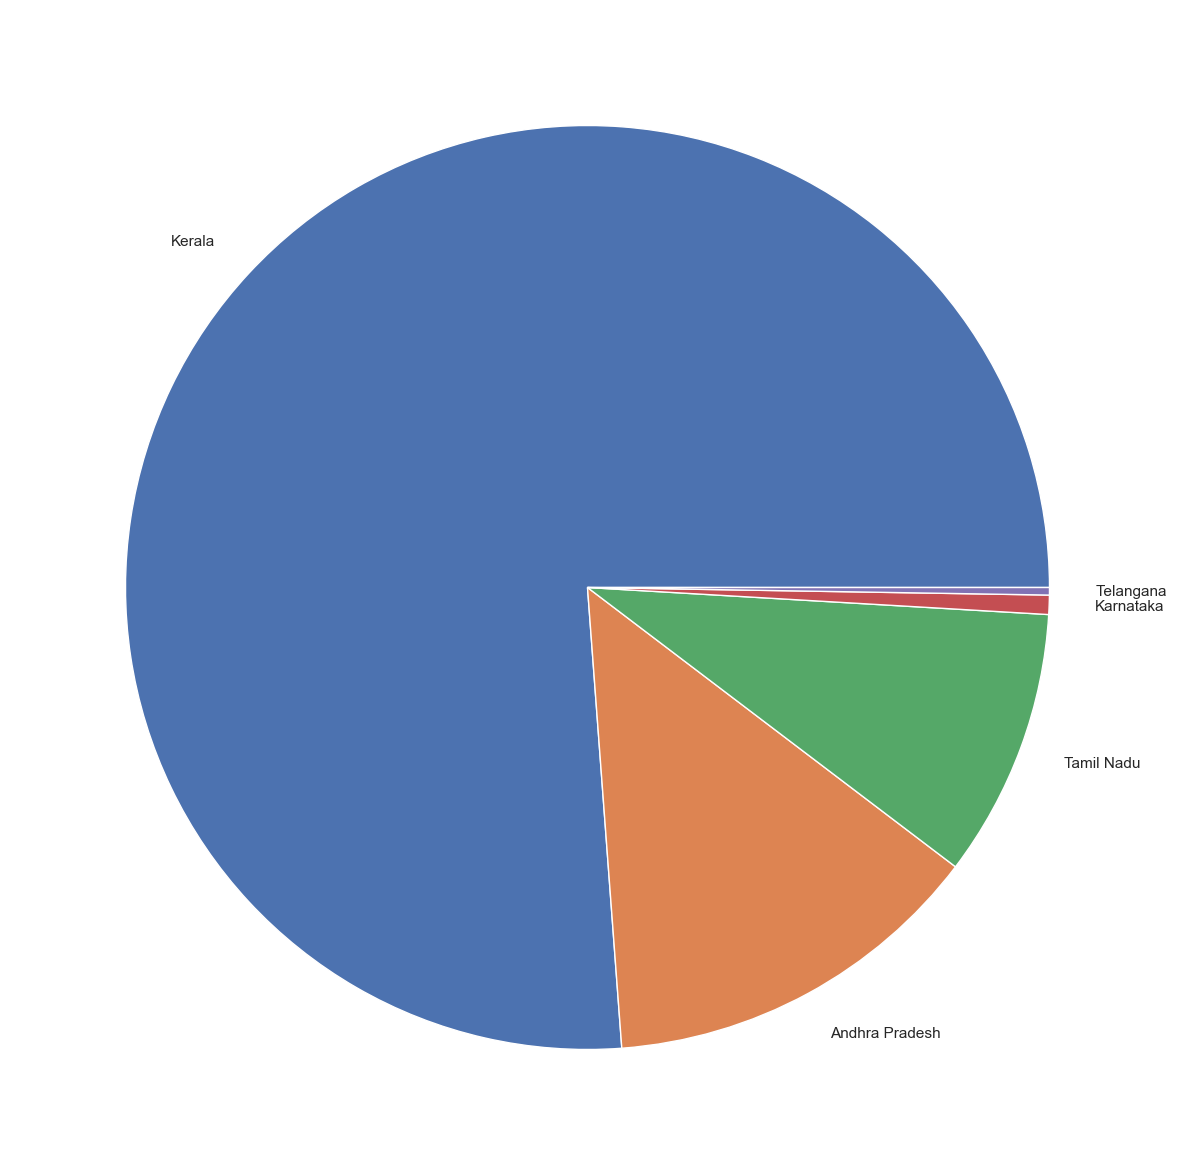

In [115]:
df4 = south_zone_df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,15))
plt.pie(x= df4.Production,labels=df4.State_Name)

<AxesSubplot:xlabel='Production', ylabel='Area'>

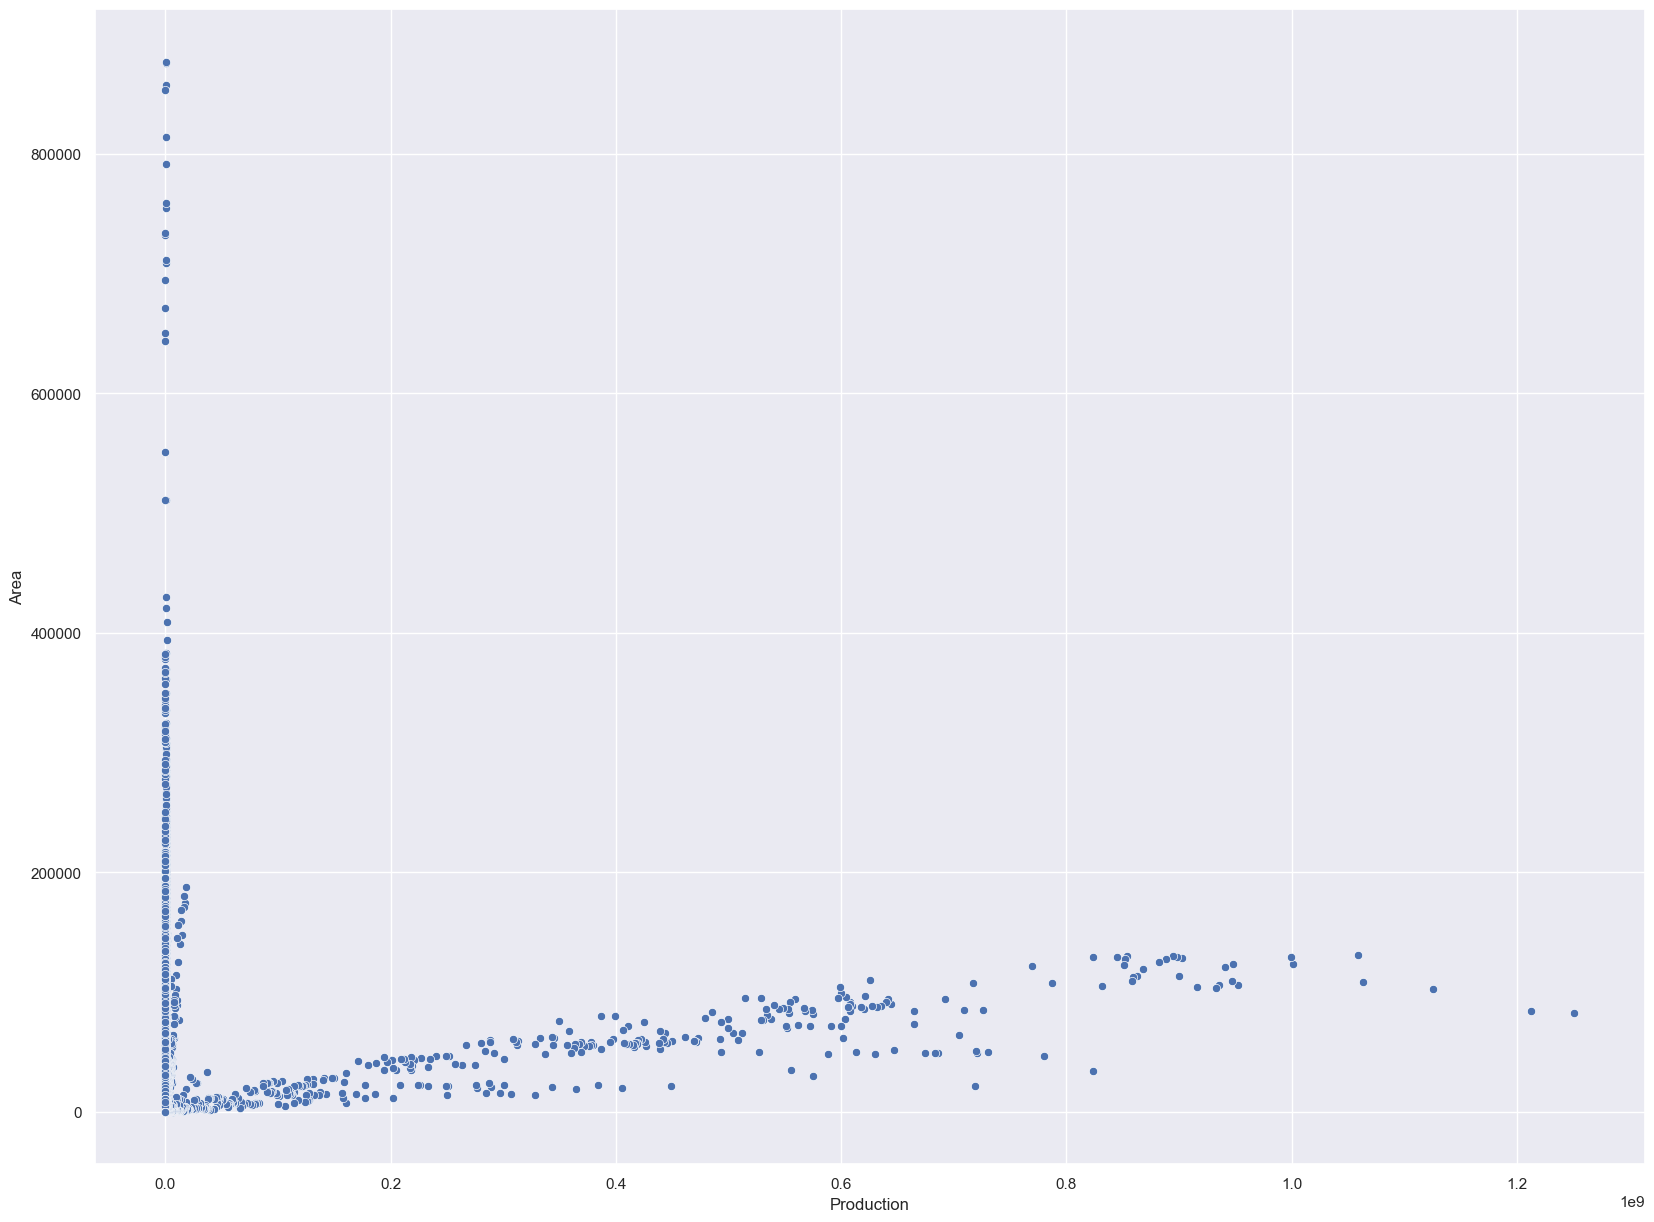

In [116]:
plt.figure(figsize=(20,15))
df4 = south_zone_df.groupby(by='Area')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
sns.scatterplot(x = df4.Production,y= df4.Area)

In [117]:
crop_southzone_df = south_zone_df[south_zone_df['Crop']=='Coconut ']
crop_southzone_df

State_Name District_Name  Crop_Year       Season      Crop   Area  \
329     Andhra Pradesh     ANANTAPUR       2000  Whole Year   Coconut   908.0   
375     Andhra Pradesh     ANANTAPUR       2001  Whole Year   Coconut   851.0   
422     Andhra Pradesh     ANANTAPUR       2002  Whole Year   Coconut   869.0   
479     Andhra Pradesh     ANANTAPUR       2003  Whole Year   Coconut   839.0   
528     Andhra Pradesh     ANANTAPUR       2004  Whole Year   Coconut   837.0   
...                ...           ...        ...          ...       ...    ...   
196074      Telangana     RANGAREDDI       2008  Whole Year   Coconut     1.0   
196112      Telangana     RANGAREDDI       2009  Whole Year   Coconut     2.0   
196200      Telangana     RANGAREDDI       2011  Whole Year   Coconut     1.0   
196243      Telangana     RANGAREDDI       2013  Whole Year   Coconut     2.0   
196254      Telangana     RANGAREDDI       2014  Kharif       Coconut     2.0   

        Production       Zones   Crop_type  
329      3896970.0  South Zone  Commercial  
375      3053700.0  South Zone  Commercial  
422      3691149.0  South Zone  Commercial  
479      3285828.0  South Zone  Commercial  
528      6413350.0  South Zone  Commercial  
...            ...         ...         ...  
196074      9321.0  South Zone  Commercial  
196112     22344.0  South Zone  Commercial  
196200     14606.0  South Zone  Commercial  
196243        33.0  South Zone  Commercial  
196254        42.0  South Zone  Commercial  

[1244 rows x 9 columns]

Text(0.5, 1.0, 'Coconut year wise Production')

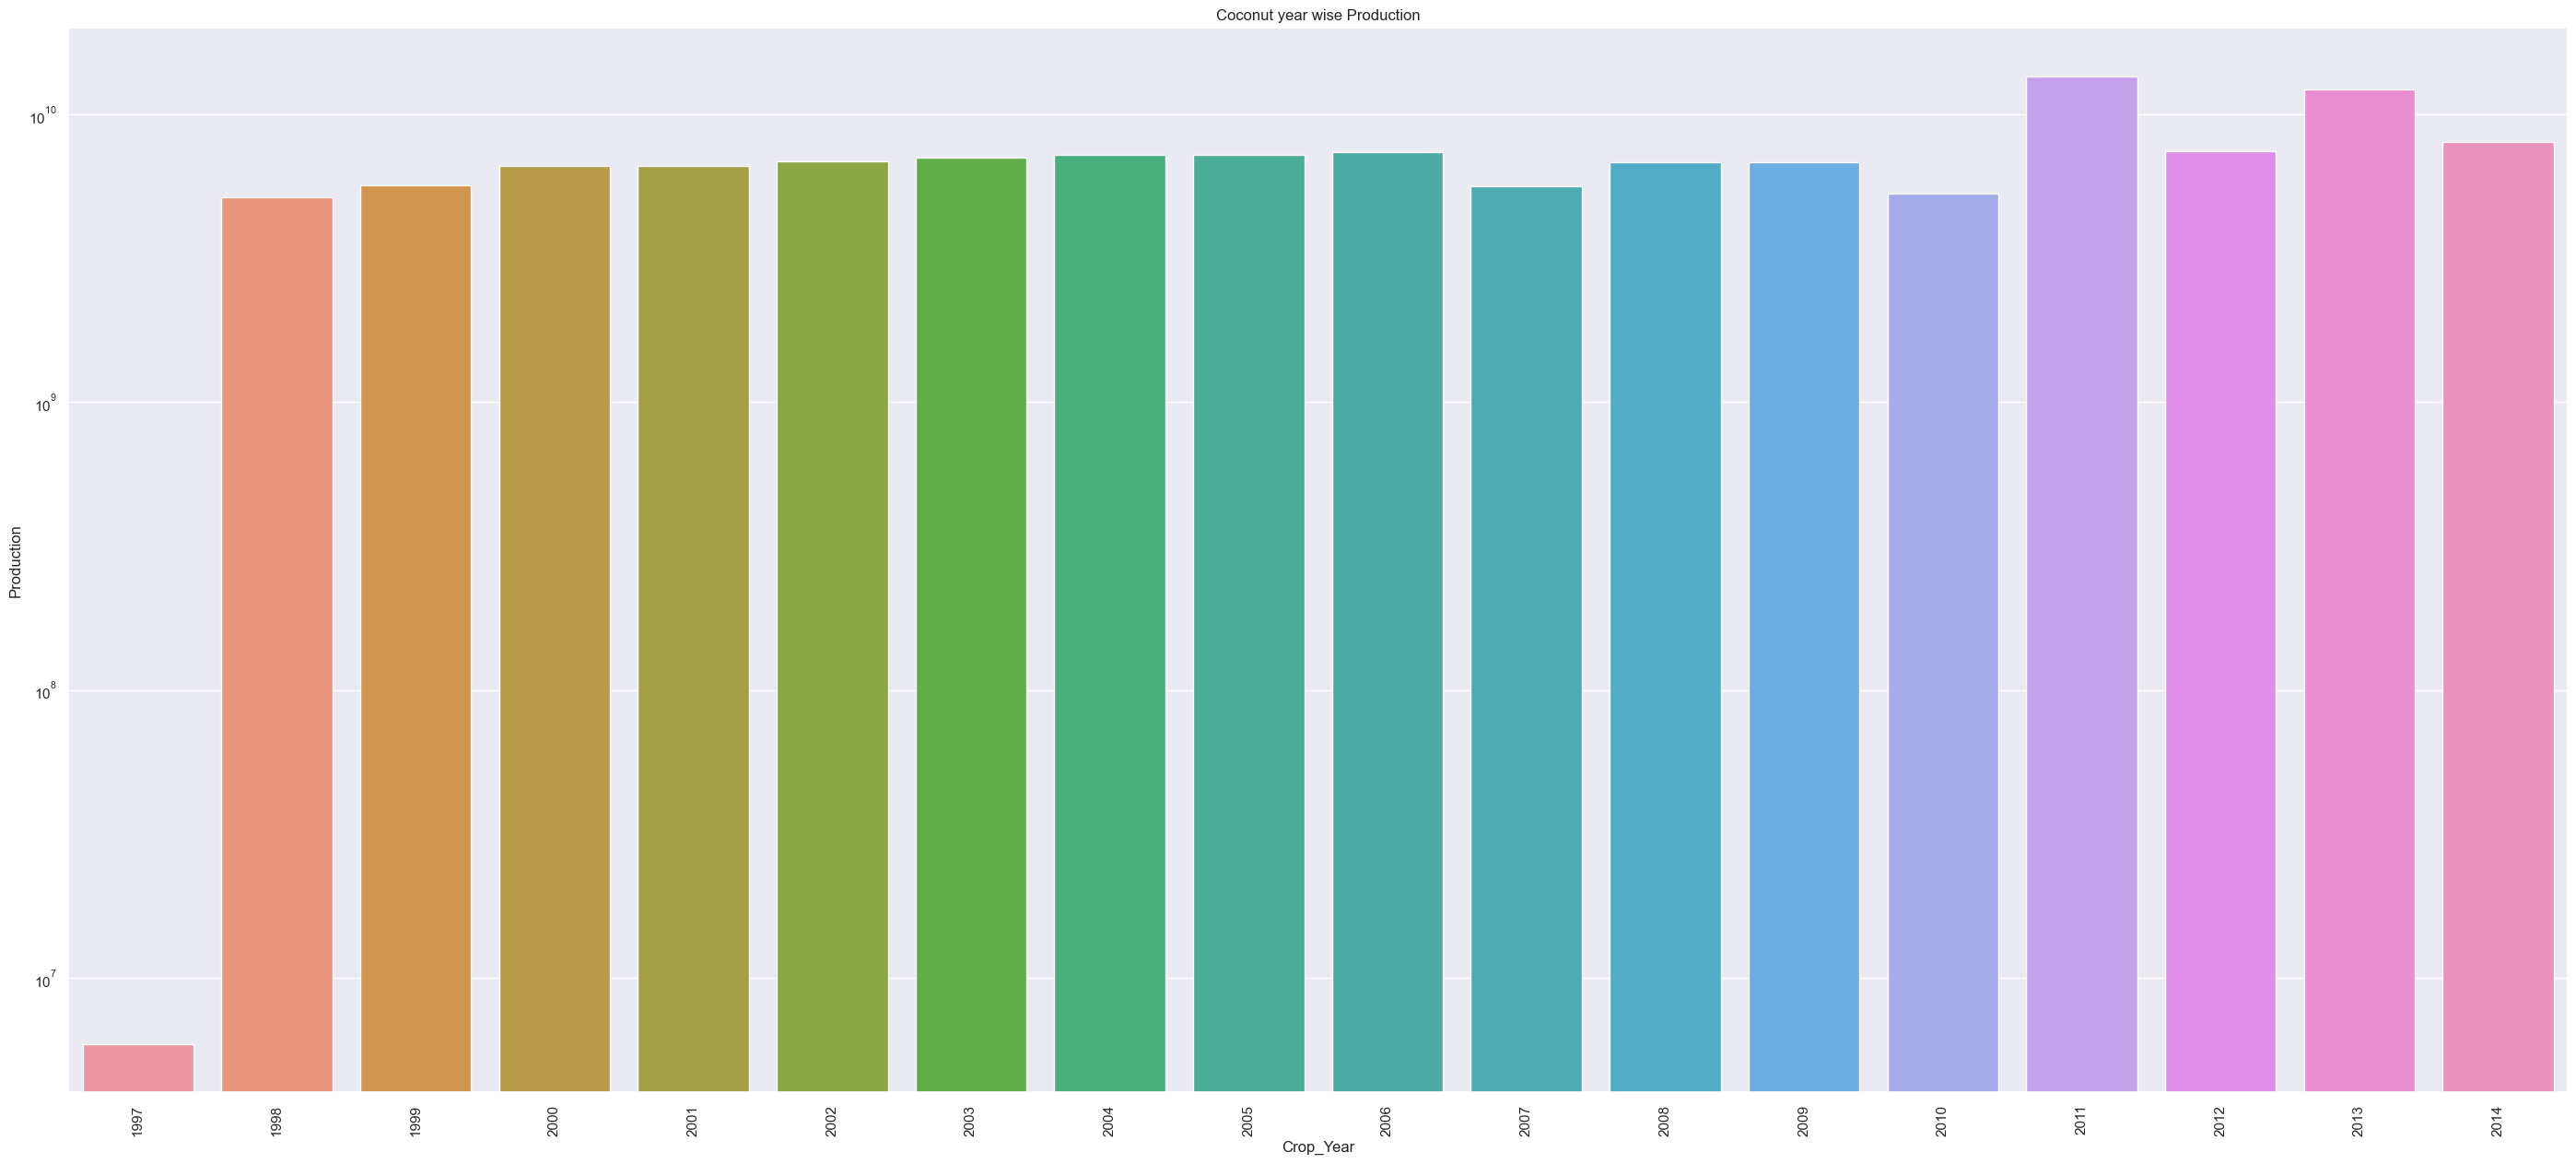

In [118]:
df3 = crop_southzone_df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,15))
sns.barplot(x=df3.Crop_Year, y=df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut year wise Production')

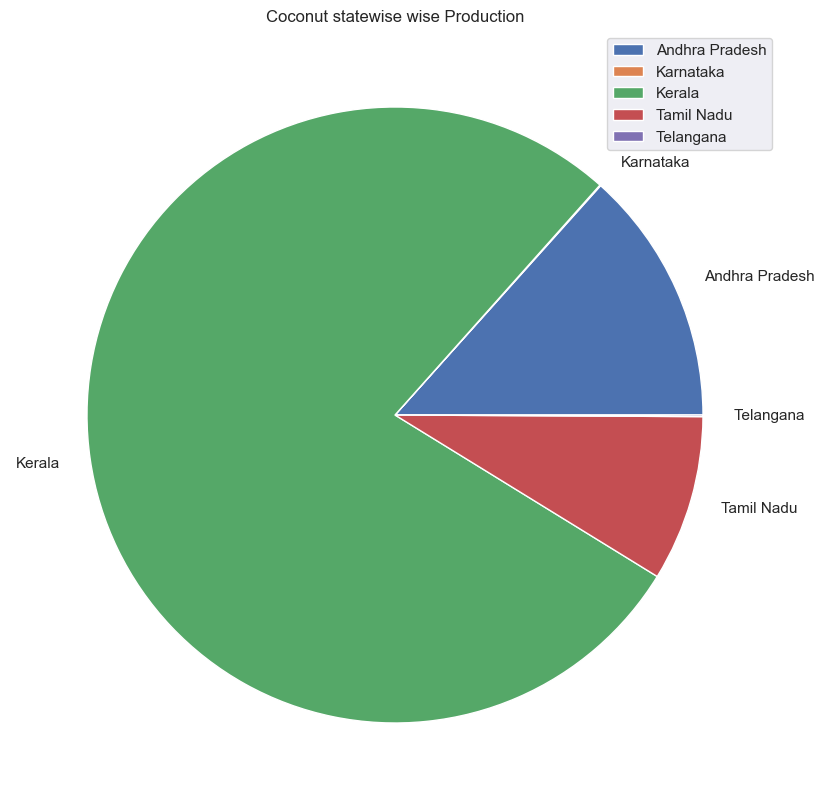

In [119]:
plt.figure(figsize=(20,10))
df3 = crop_southzone_df.groupby(by='State_Name')['Production'].sum().reset_index()
plt.pie( x = df3.Production,labels = df3.State_Name)
plt.legend()
plt.title('Coconut statewise wise Production')
plt.show()

Text(0.5, 1.0, 'Coconut District wise Production')

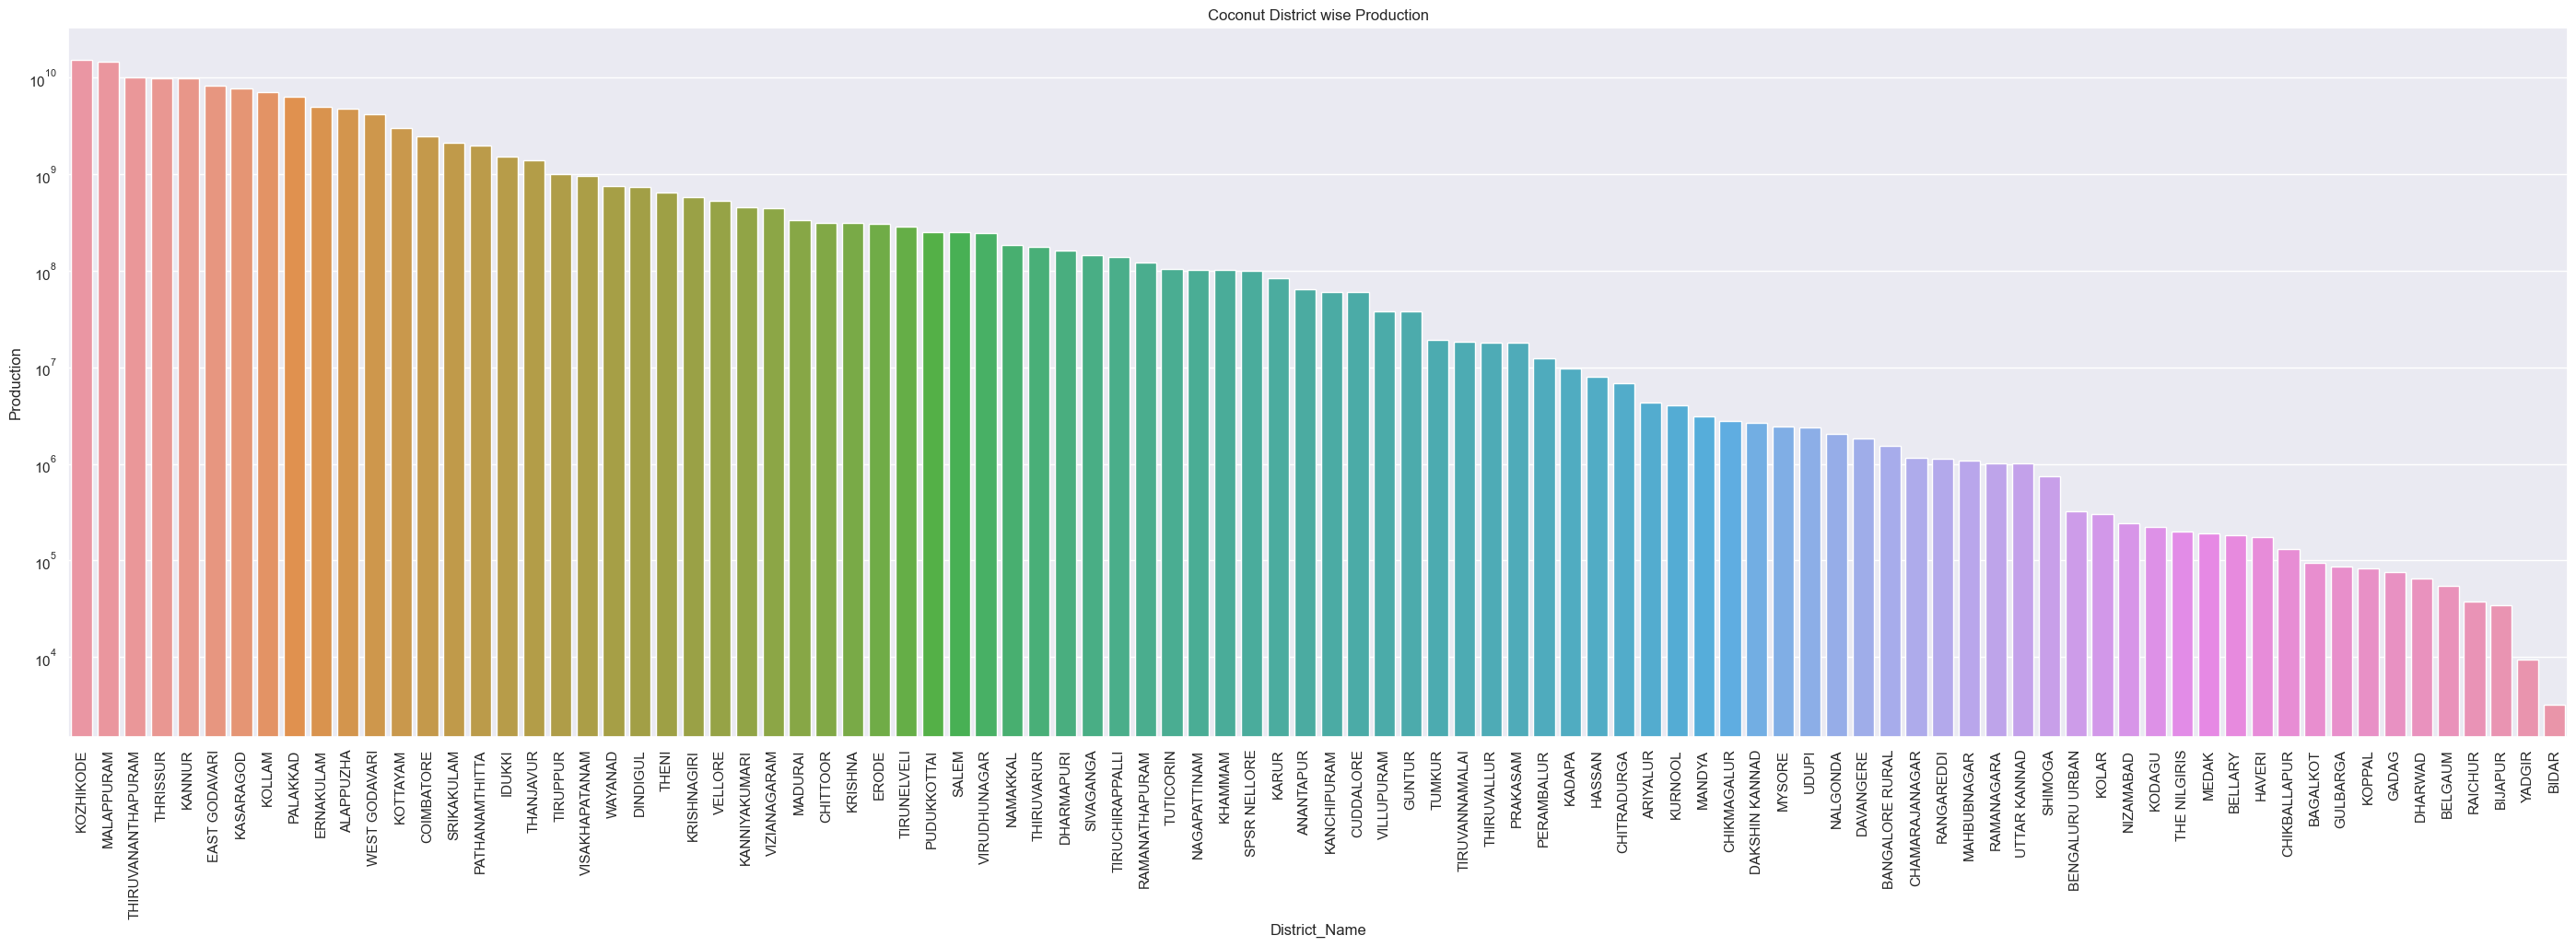

In [120]:
df3 = crop_southzone_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
plt.figure(figsize=(35,10))
sns.barplot(x=df3.District_Name, y=df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut District wise Production')

In [121]:
crop_southzone_df.Season.unique()

array(['Whole Year ', 'Kharif     '], dtype=object)

## South zone overview

1. In south zone produces mostly the commercial and cereal crop types.
2. Coconut, Sugarcane, rice and maize are grown abundantly in south.
3. The production will be higher during kharif and rabi season.
4. The production is highest during the year 2011
5. khozikhodu and mallapuram produces higher than other districts.
6. kerela is largest producer state in south followed by Andra pradesh.
7. Coconut production impacts the whole crop production in south as per charts.


## North Zone Analysis

In [122]:
north_zone_df = df[df['Zones']=='North Zone']

In [123]:
north_zone_df

State_Name District_Name  Crop_Year       Season               Crop  \
45890    Chandigarh    CHANDIGARH       1998  Kharif               Arhar/Tur   
45891    Chandigarh    CHANDIGARH       1998  Kharif                   Maize   
45892    Chandigarh    CHANDIGARH       1998  Kharif       Moong(Green Gram)   
45893    Chandigarh    CHANDIGARH       1998  Kharif                    Rice   
45894    Chandigarh    CHANDIGARH       1998  Kharif                    Urad   
...             ...           ...        ...          ...                ...   
236473  Uttarakhand   UTTAR KASHI       2014  Whole Year               Onion   
236474  Uttarakhand   UTTAR KASHI       2014  Whole Year        Pulses total   
236475  Uttarakhand   UTTAR KASHI       2014  Whole Year                Rice   
236476  Uttarakhand   UTTAR KASHI       2014  Whole Year           Sunflower   
236477  Uttarakhand   UTTAR KASHI       2014  Whole Year     Total foodgrain   

           Area  Production       Zones   Crop_type  
45890       8.0         8.0  North Zone      Pulses  
45891     380.0      1330.0  North Zone      Cereal  
45892       3.0         3.0  North Zone  Commercial  
45893     120.0       360.0  North Zone      Cereal  
45894      12.0        10.0  North Zone      Pulses  
...         ...         ...         ...         ...  
236473     26.0       172.0  North Zone  Vegetables  
236474   5346.0      4630.0  North Zone      Pulses  
236475   9919.0     16499.0  North Zone      Cereal  
236476      3.0         3.0  North Zone    oilseeds  
236477  35417.0     49689.0  North Zone      Cereal  

[49874 rows x 9 columns]

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'North Zone Crops vs Production')

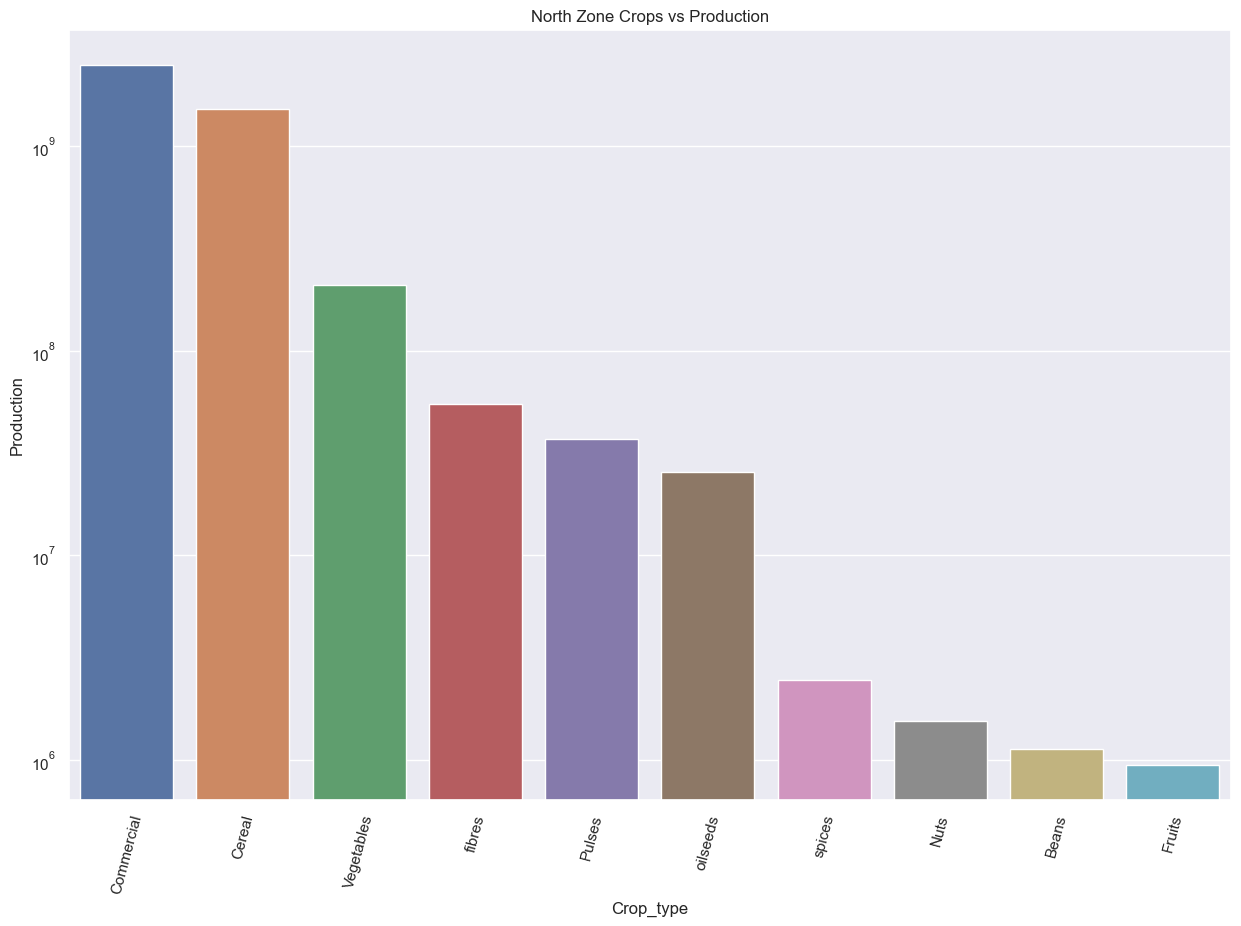

In [124]:
df3 = north_zone_df.groupby(by='Crop_type')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df3.Crop_type, df3.Production)
plt.xticks(rotation=75)
plt.yscale('log')
plt.title('North Zone Crops vs Production')

Text(0.5, 1.0, 'North Zone Crops vs Production')

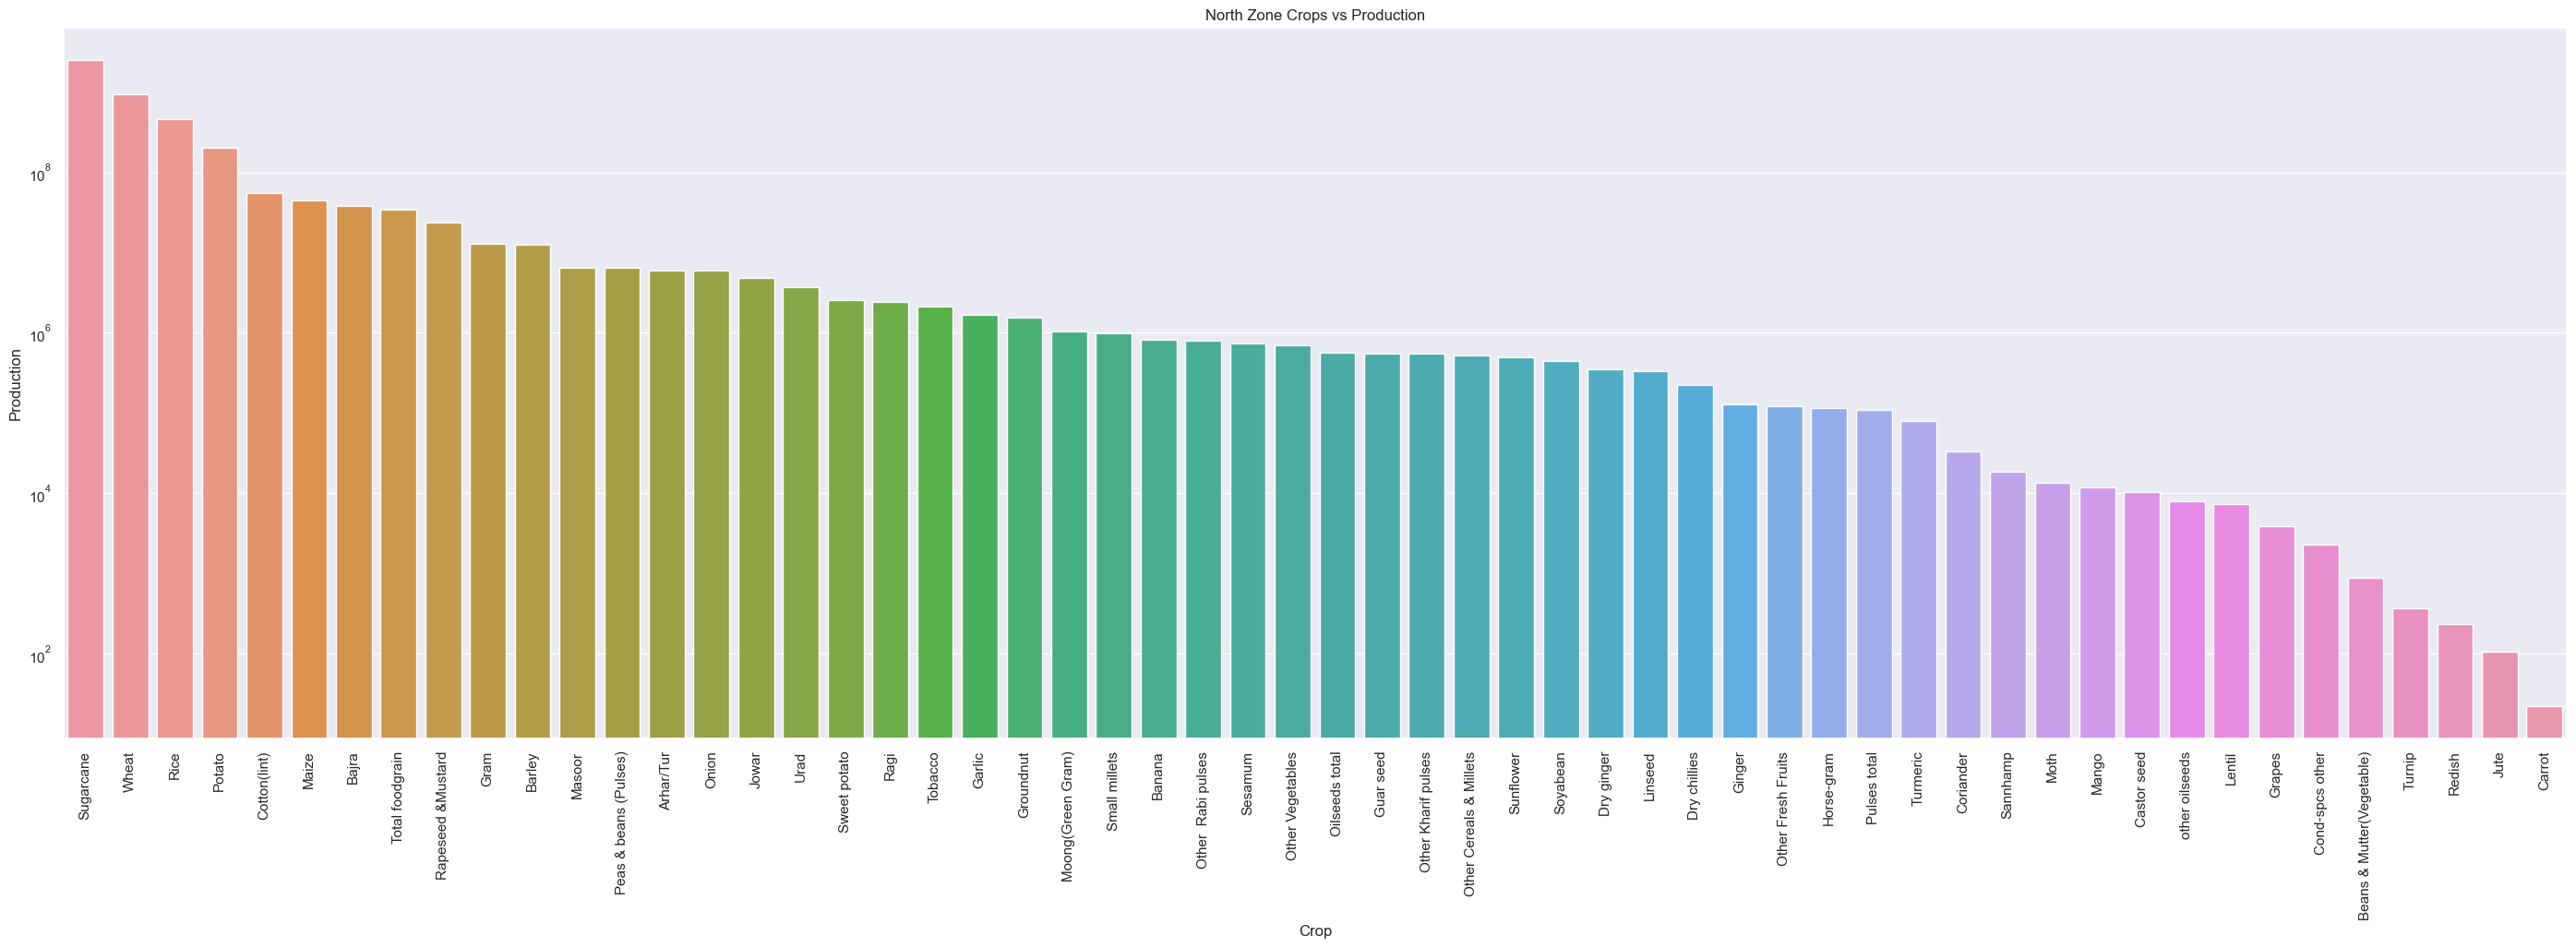

In [125]:
df3 = north_zone_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(35,10))
sns.barplot(x=df3.Crop, y=df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('North Zone Crops vs Production')

Text(0.5, 1.0, 'North Zone Production')

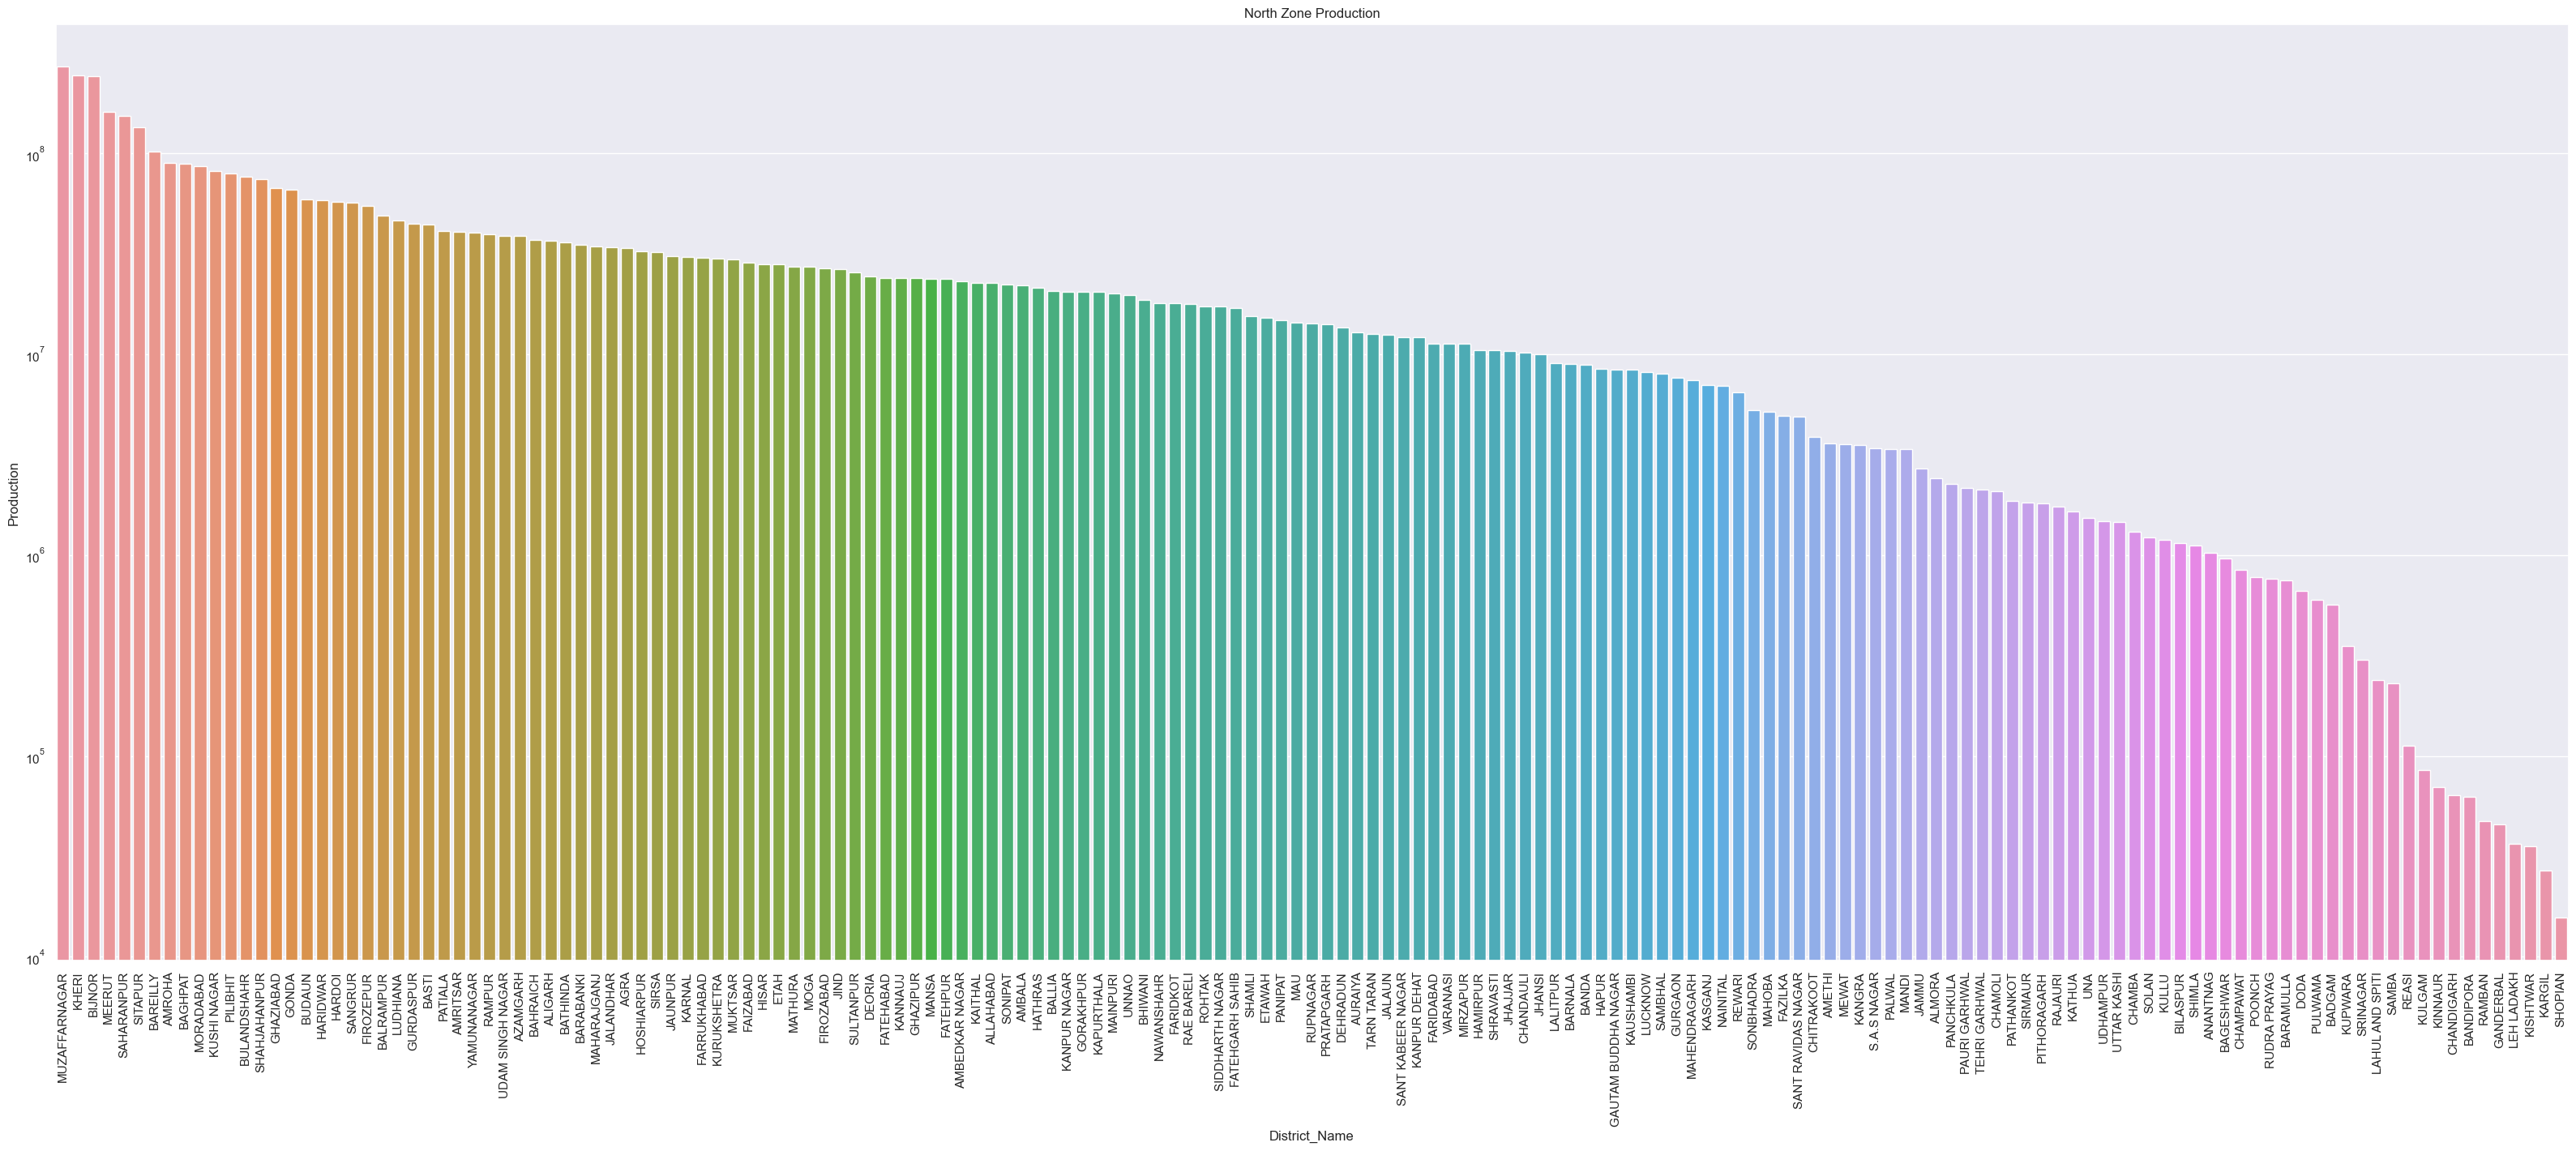

In [126]:
df3 = north_zone_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x=df3.District_Name, y=df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('North Zone Production')

Text(0.5, 1.0, 'North Zone Production')

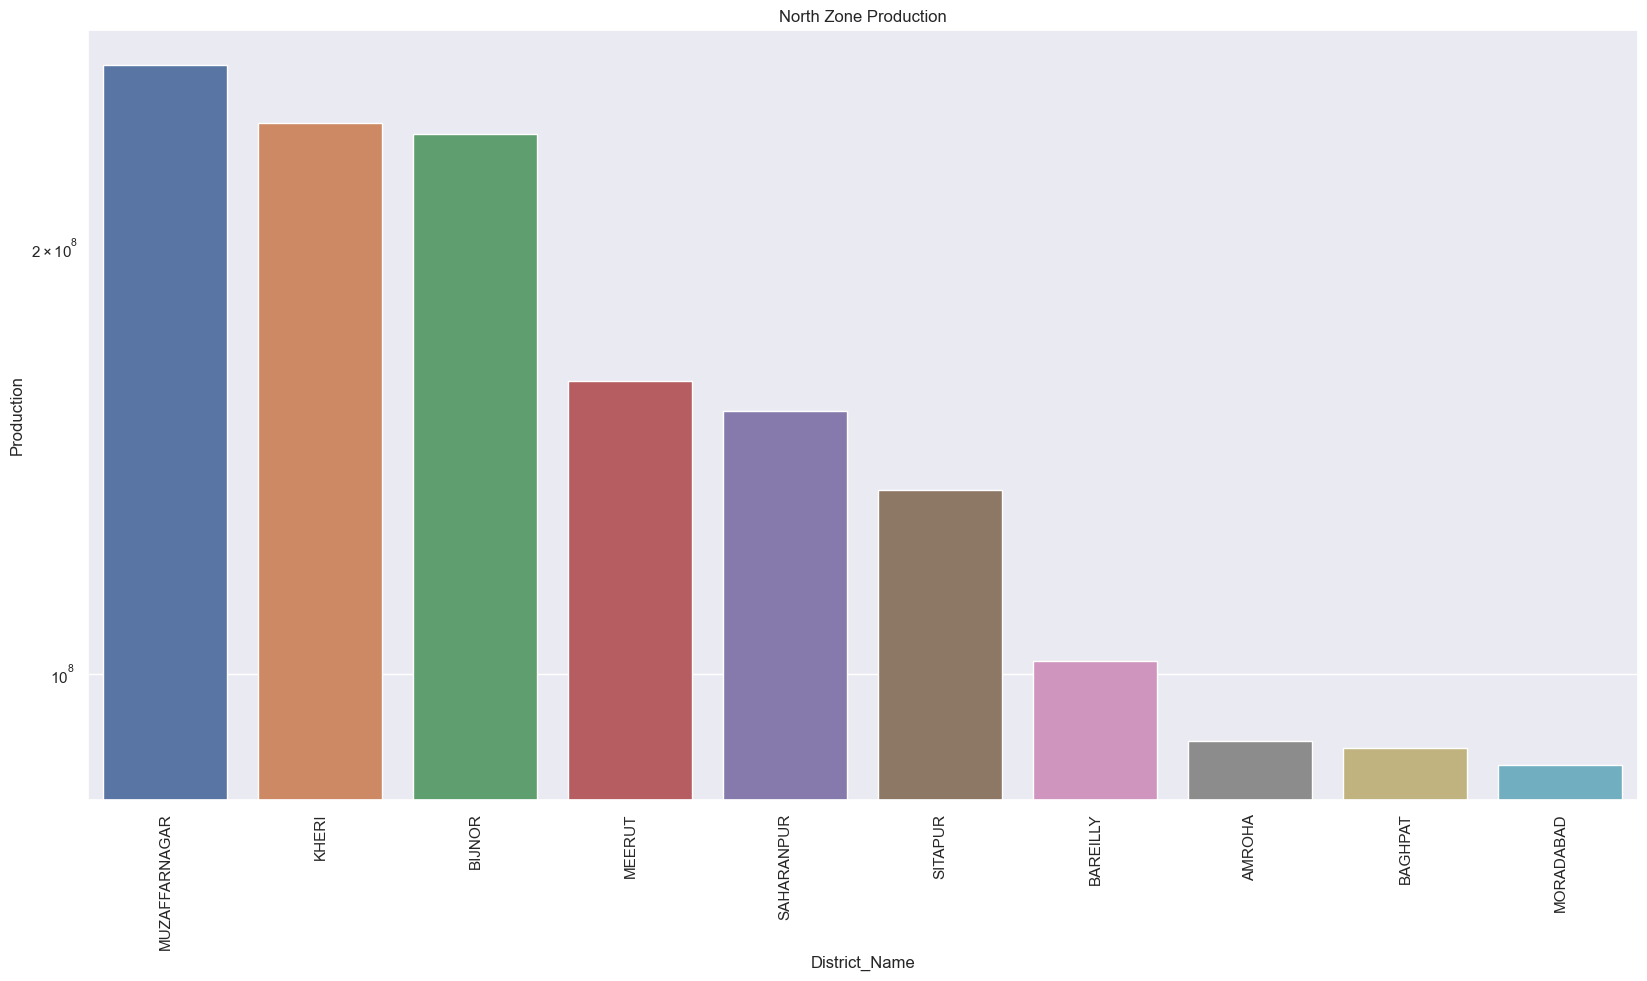

In [127]:
df3_5 = df3[:10]
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=df3_5.District_Name, y=df3_5.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('North Zone Production')

Text(0.5, 1.0, 'North Zone Production')

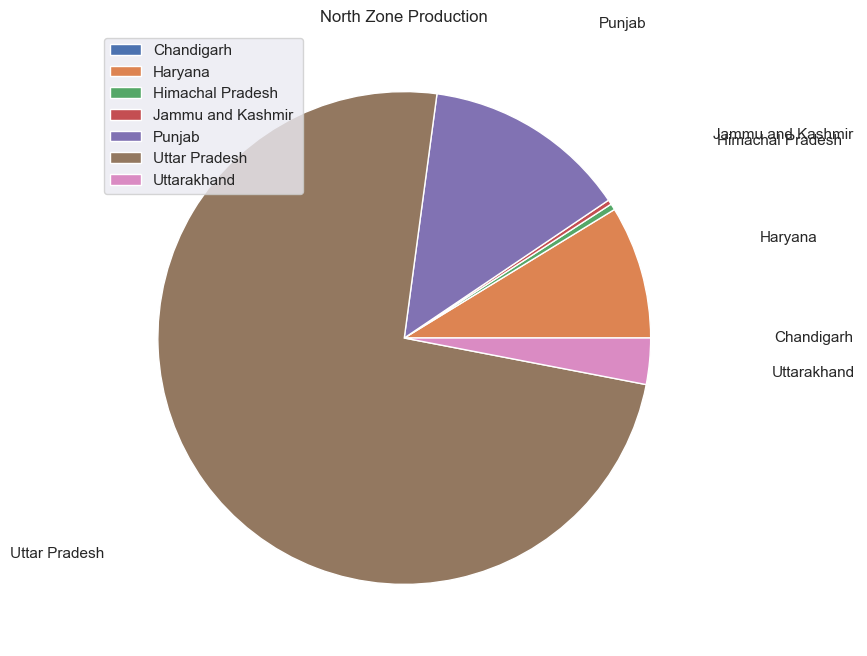

In [128]:
df3 = north_zone_df.groupby(by='State_Name')['Production'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,8))
plt.pie(labels = df3.State_Name, x=df3.Production,labeldistance=1.5,pctdistance=1)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('North Zone Production')

## Northzone Overview

1. Uttar Pradesh is the largest producer in the North Zone
2. Muzzaffarinagar, kheri and bijinor districts are largest producers in North.
3. Sugarcane,  wheat, rice and potato are highly produced in north zone. 

## Coconut
As per reports coconut has been largely producing crop in india mainly south

In [129]:
coco_df = df[df['Crop']=='Coconut ']
coco_df

State_Name District_Name  Crop_Year       Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
32      Andaman and Nicobar Islands      NICOBARS       2003  Whole Year    
41      Andaman and Nicobar Islands      NICOBARS       2004  Whole Year    
...                             ...           ...        ...          ...   
245719                  West Bengal       PURULIA       2004  Whole Year    
245756                  West Bengal       PURULIA       2005  Whole Year    
245792                  West Bengal       PURULIA       2006  Whole Year    
245837                  West Bengal       PURULIA       2007  Whole Year    
245879                  West Bengal       PURULIA       2008  Whole Year    

            Crop      Area  Production       Zones   Crop_type  
5       Coconut   18168.00  65100000.0  Union Terr  Commercial  
14      Coconut   18190.00  64430000.0  Union Terr  Commercial  
23      Coconut   18240.00  67490000.0  Union Terr  Commercial  
32      Coconut   18284.74  68580000.0  Union Terr  Commercial  
41      Coconut   18394.70  52380000.0  Union Terr  Commercial  
...          ...       ...         ...         ...         ...  
245719  Coconut      66.00       296.1   East Zone  Commercial  
245756  Coconut      74.00       311.0   East Zone  Commercial  
245792  Coconut      73.00    365000.0   East Zone  Commercial  
245837  Coconut      58.00    898000.0   East Zone  Commercial  
245879  Coconut      58.00       598.0   East Zone  Commercial  

[1958 rows x 9 columns]

Text(0.5, 1.0, 'Coconut Production')

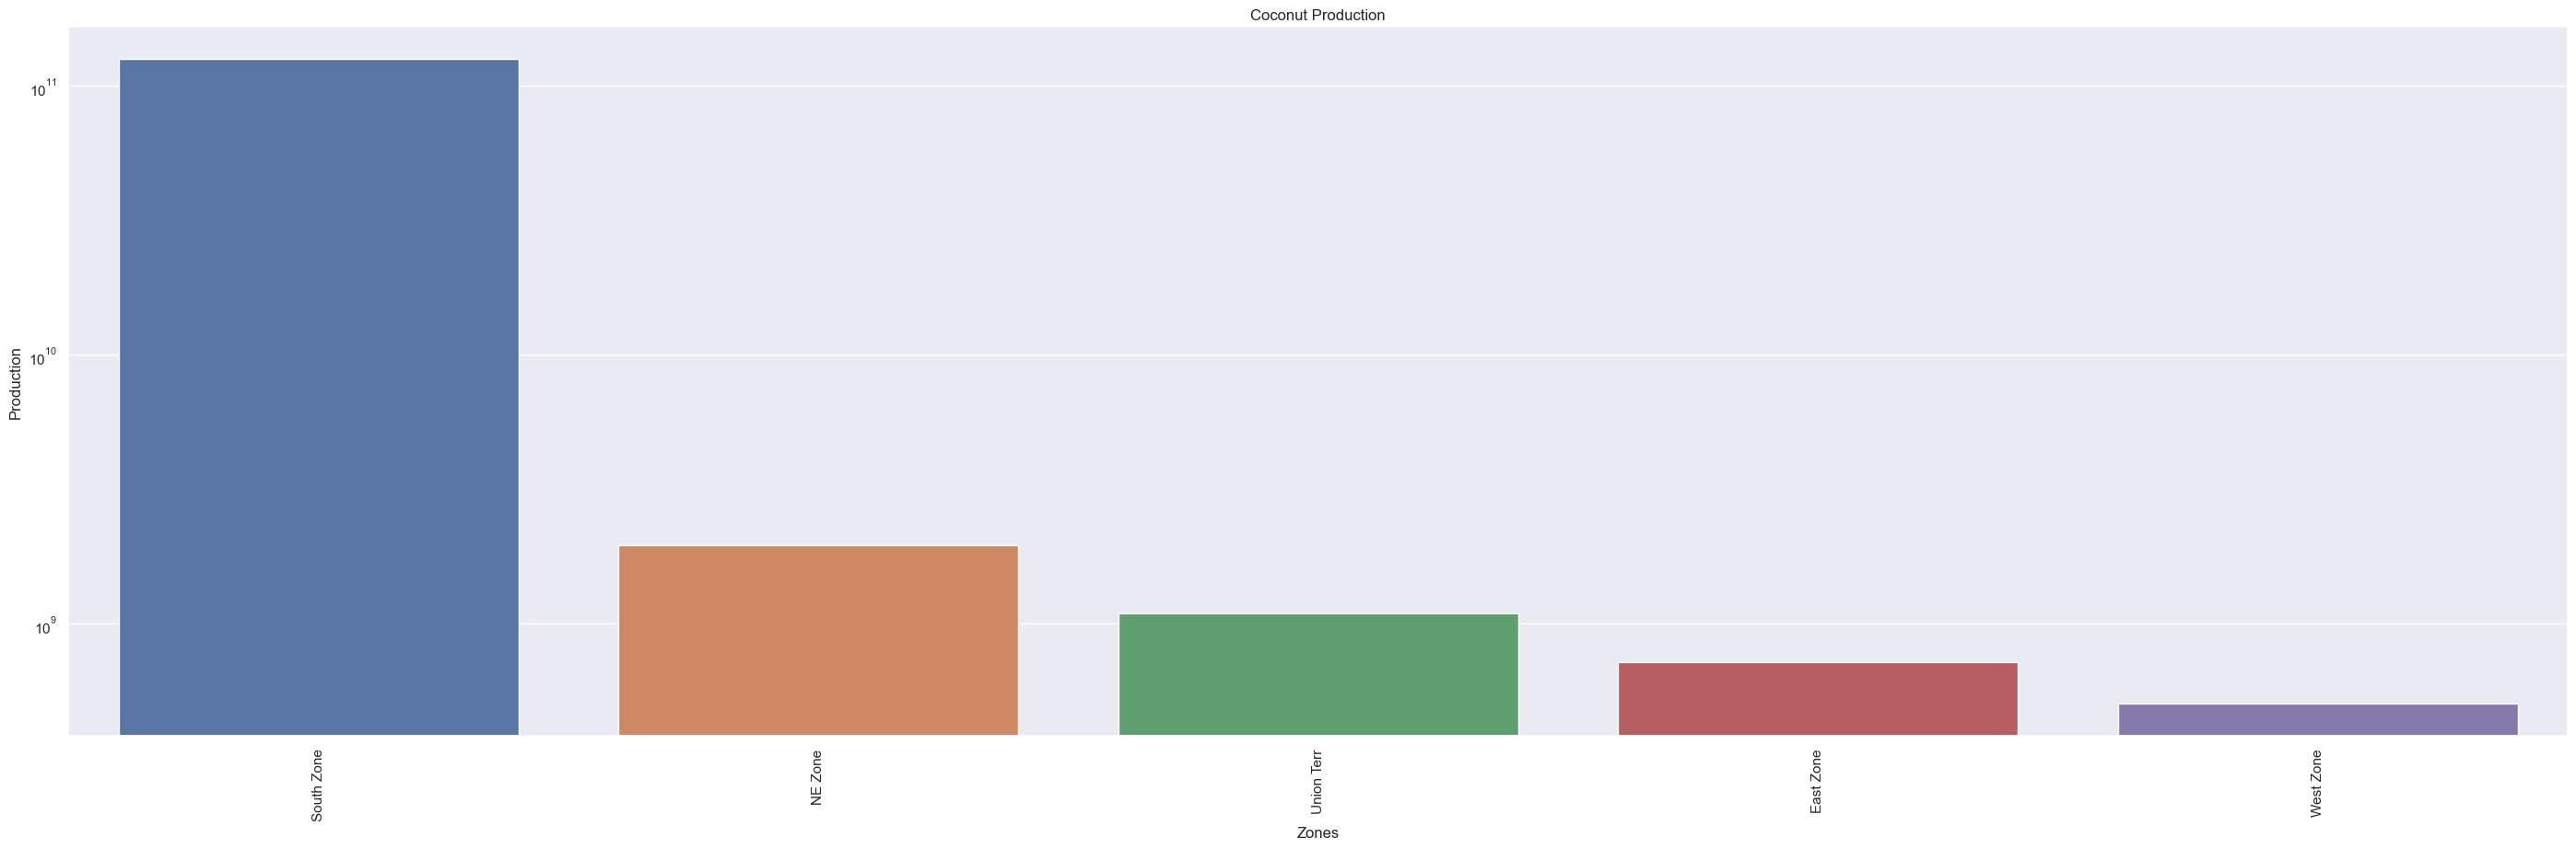

In [130]:
df3 = coco_df.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(35,10))
sns.barplot(x=df3.Zones, y=df3.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut Production')

Text(0.5, 1.0, 'Coconut Zones wise Production')

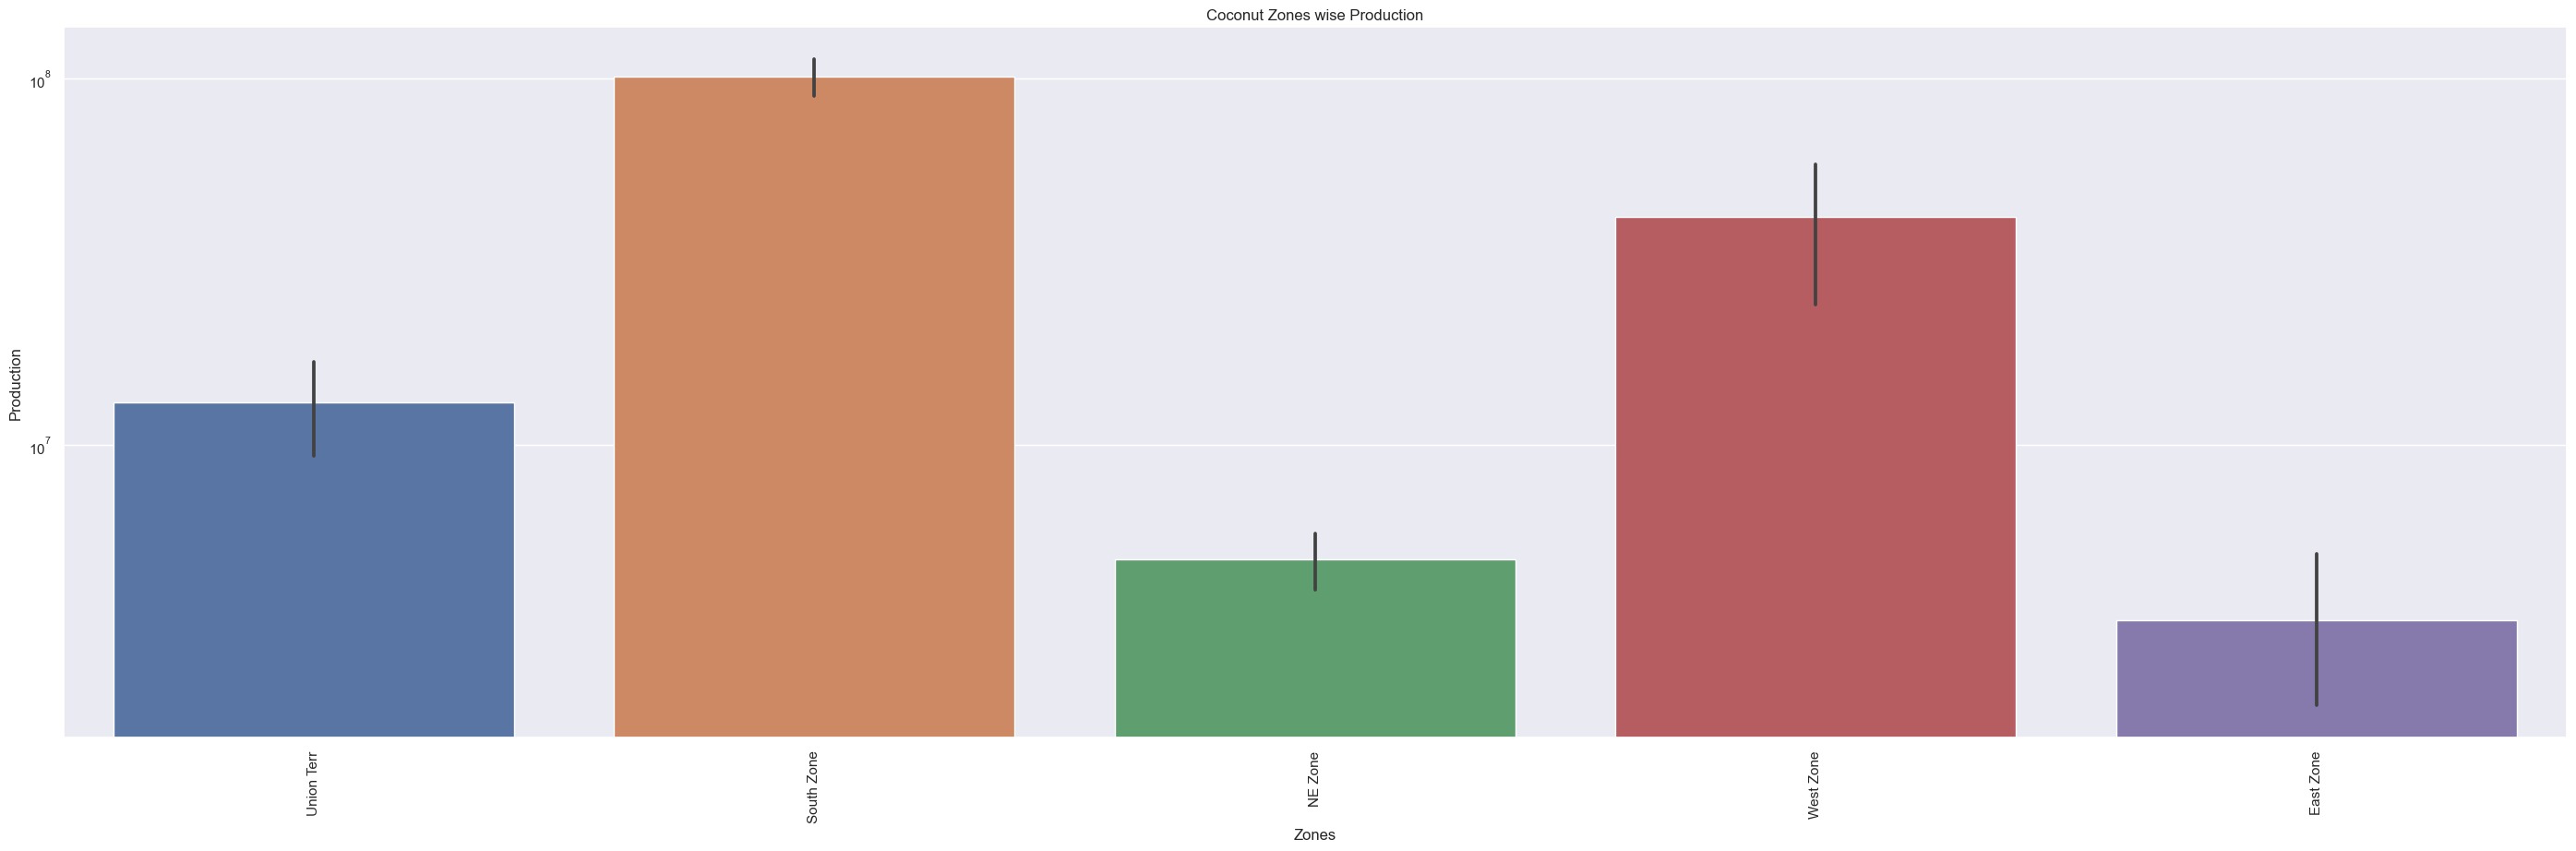

In [131]:
fig, ax = plt.subplots(figsize=(35,10))
sns.barplot(x='Zones', y='Production',data=coco_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut Zones wise Production')

Text(0.5, 1.0, 'Coconut district wise Production')

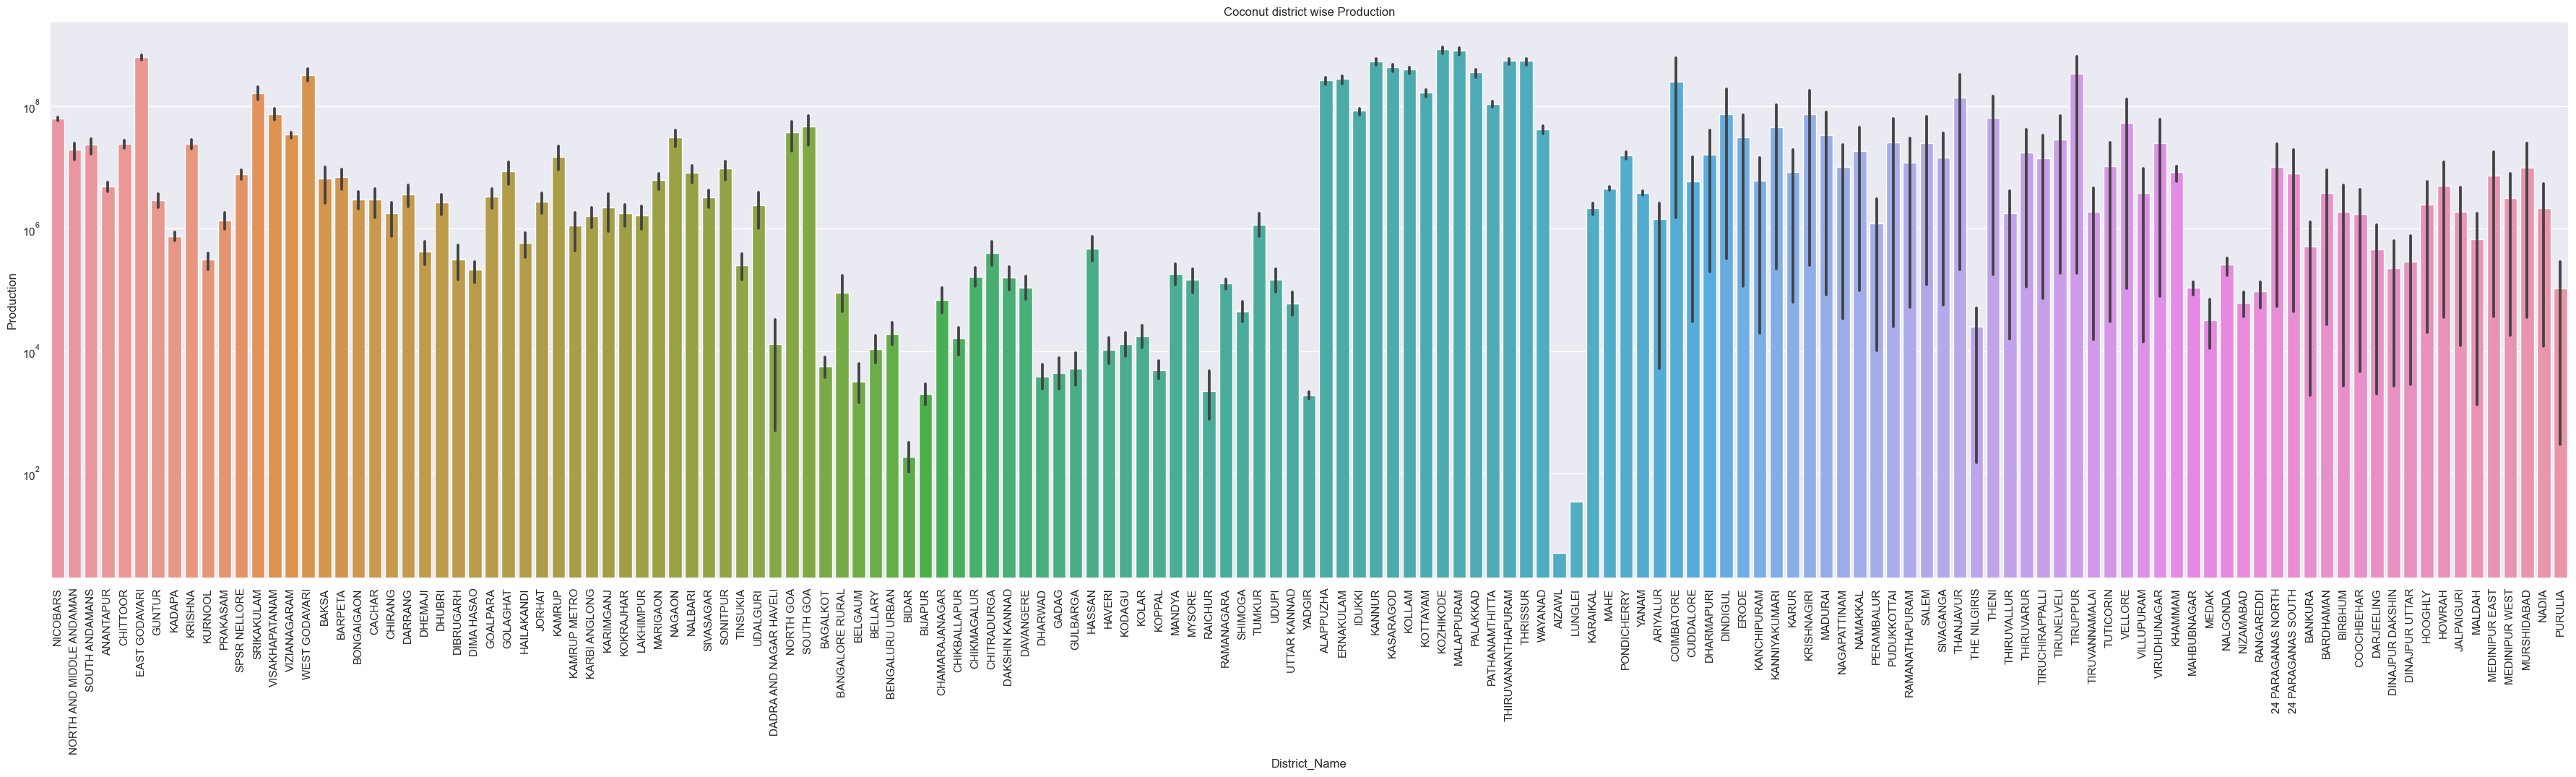

In [132]:
fig, ax = plt.subplots(figsize=(45,10))
sns.barplot(x='District_Name', y='Production',data=coco_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut district wise Production')

Text(0.5, 1.0, 'Coconut district wise Production')

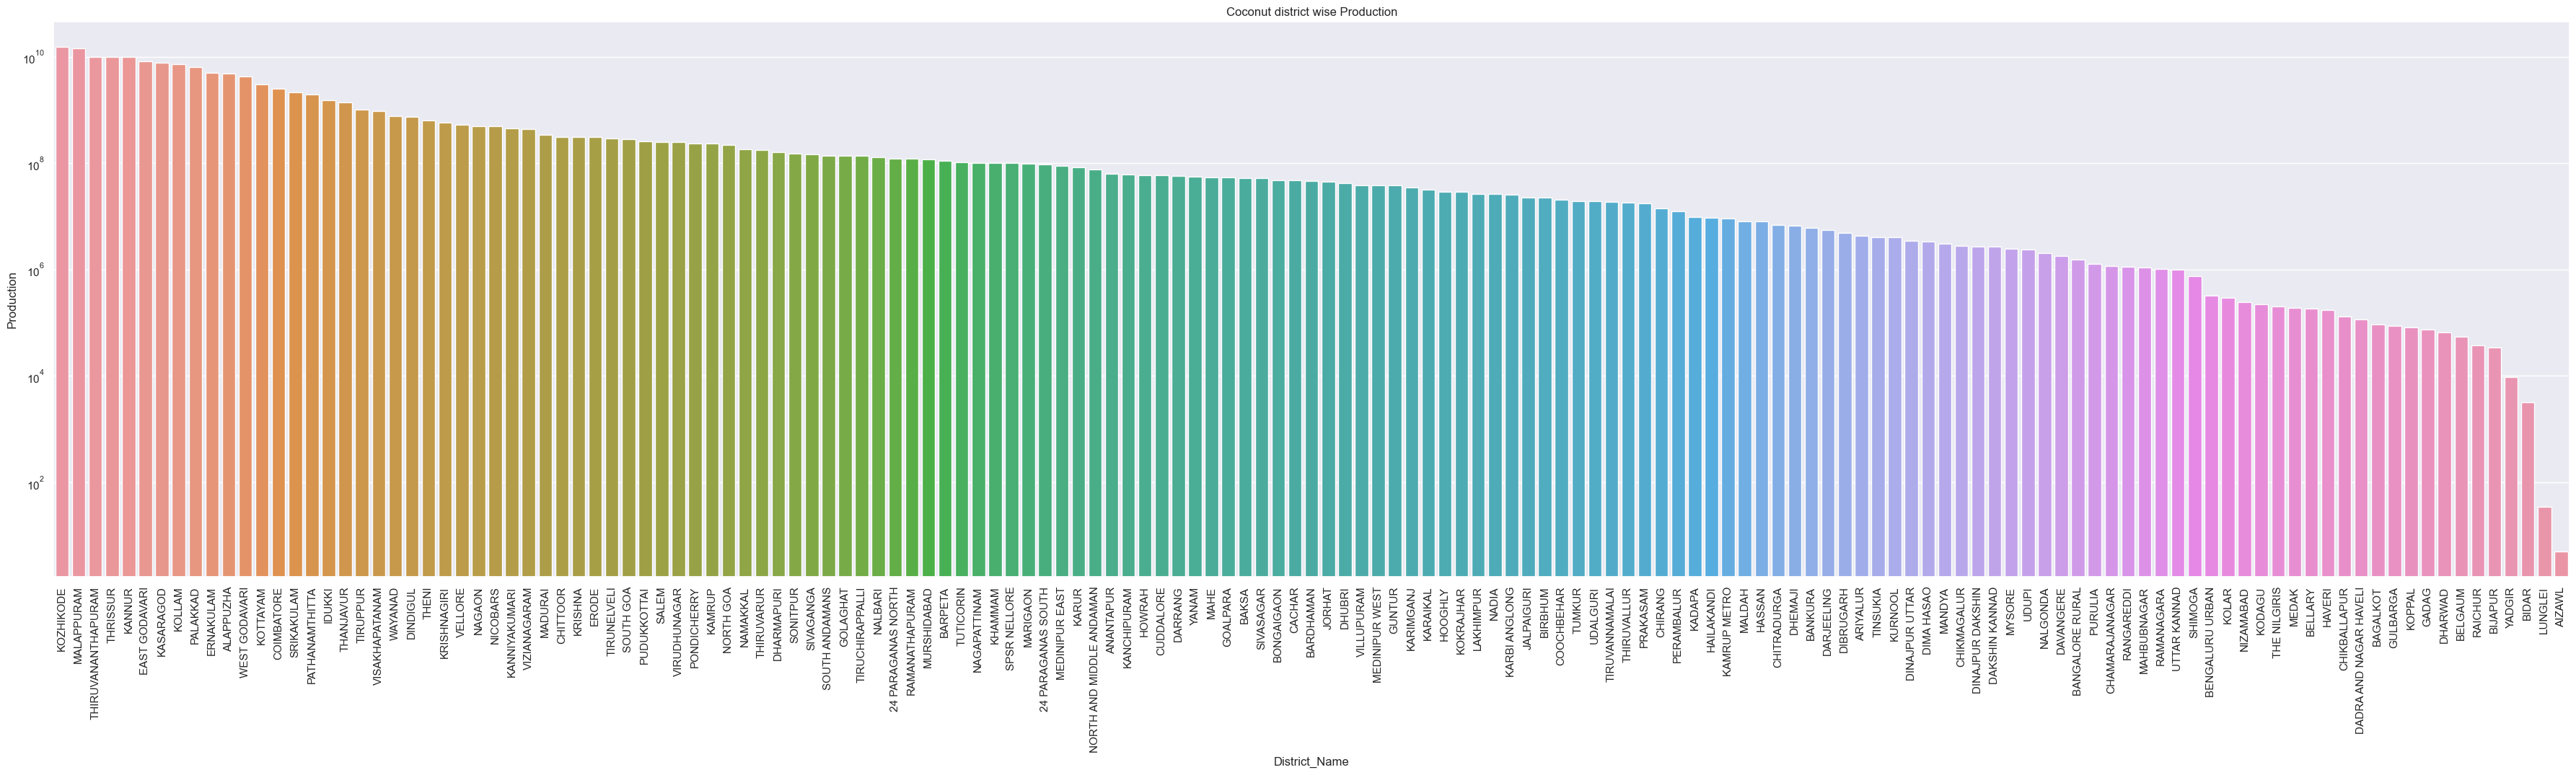

In [133]:
df3 = coco_df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(45,10))
sns.barplot(x='District_Name', y='Production',data=df3)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut district wise Production')

Text(0.5, 1.0, 'Coconut district wise Production')

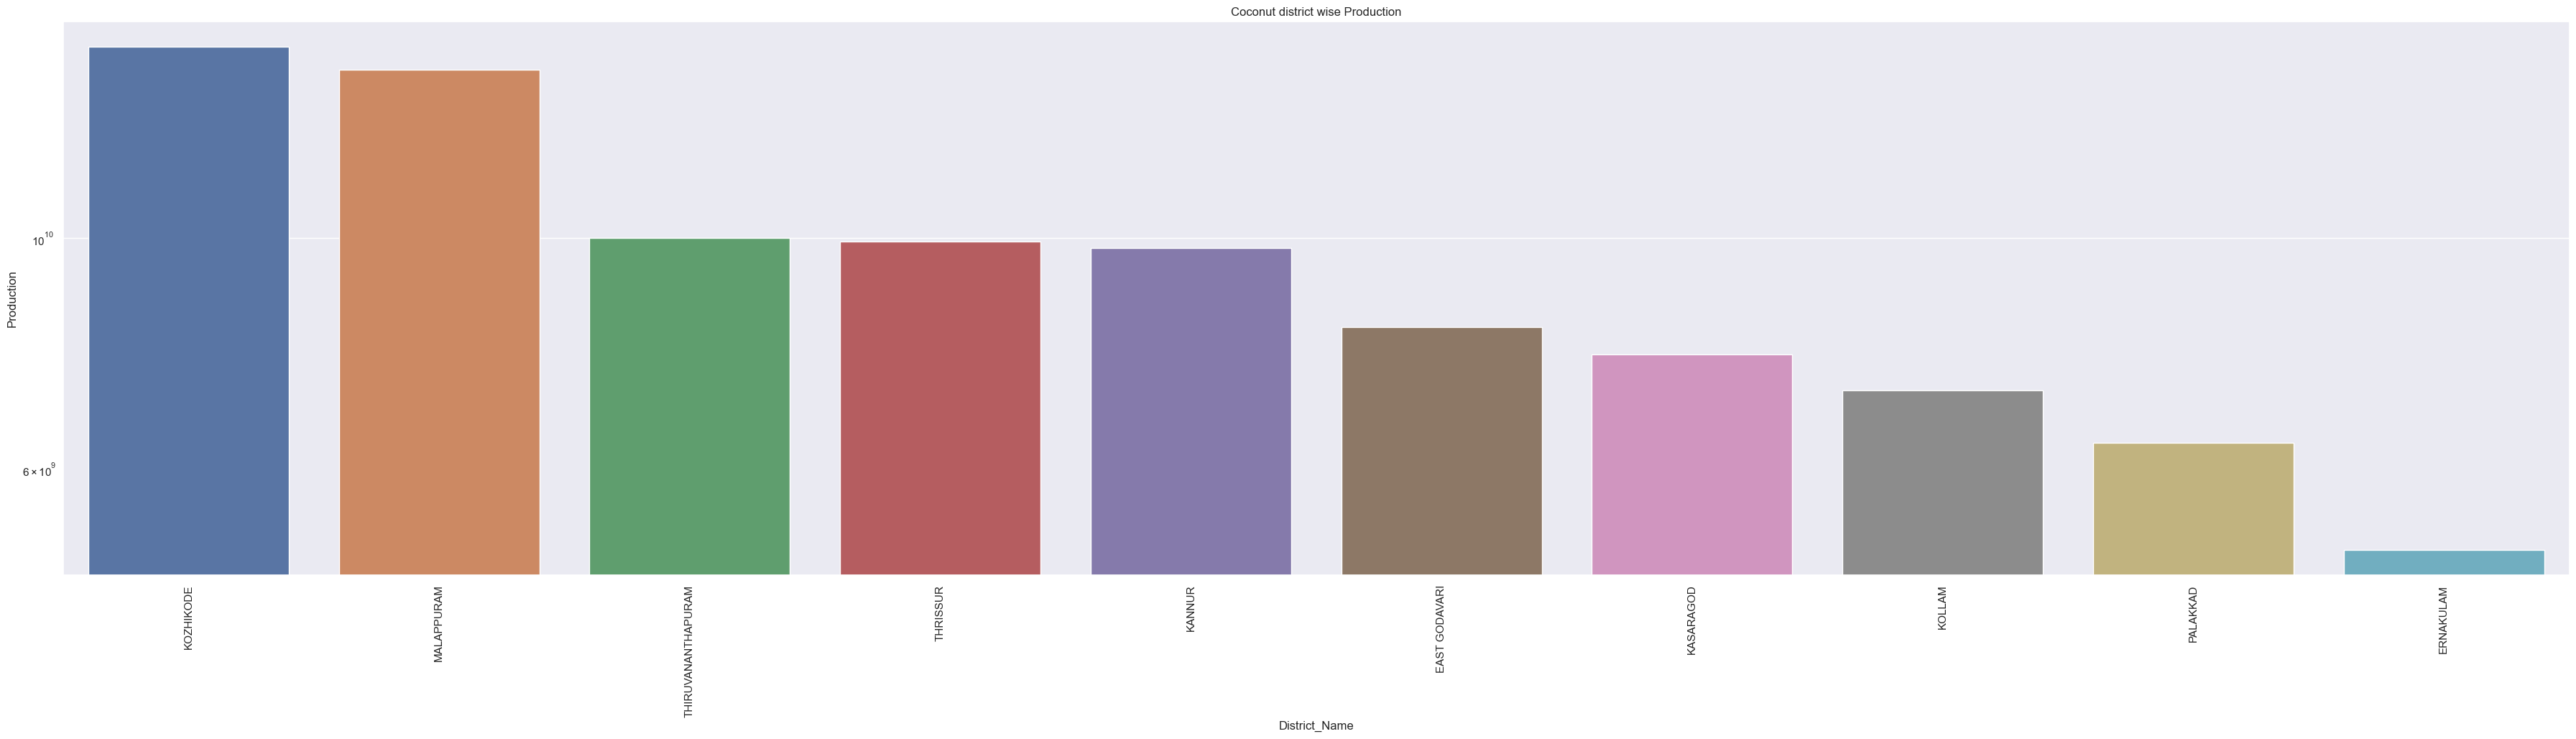

In [134]:
df3 = df3[:10]
fig, ax = plt.subplots(figsize=(45,10))
sns.barplot(x='District_Name', y='Production',data=df3)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Coconut district wise Production')

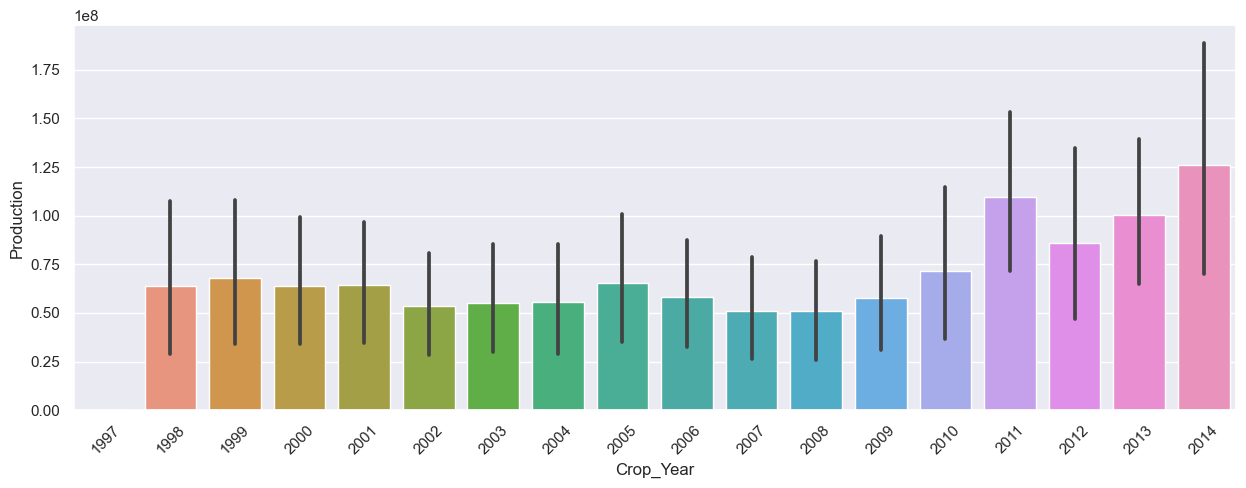

In [135]:
plt.figure(figsize=(15,5))
sns.barplot(x="Crop_Year",y="Production",data=coco_df)
plt.xticks(rotation=45)
plt.show()

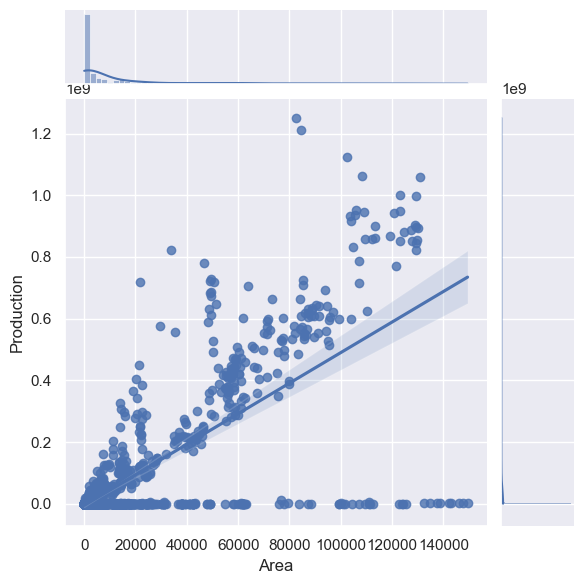

In [136]:
sns.jointplot(x="Area",y="Production",data=coco_df,kind="reg")

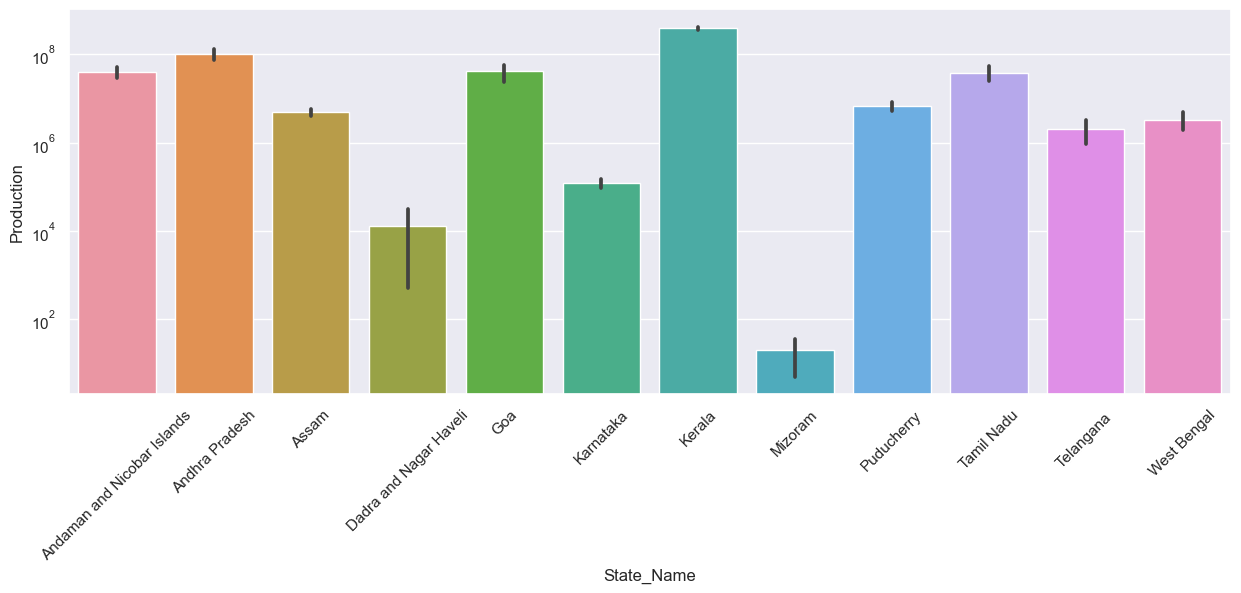

In [137]:
plt.figure(figsize=(15,5))
sns.barplot(x="State_Name",y="Production",data=coco_df)
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

In [138]:
coco_per_df = coco_df.groupby(by='State_Name')['Production'].sum().reset_index()
coco_per_df

State_Name    Production
0   Andaman and Nicobar Islands  7.177900e+08
1                Andhra Pradesh  1.680600e+10
2                         Assam  1.954408e+09
3        Dadra and Nagar Haveli  1.172880e+05
4                           Goa  5.031126e+08
5                     Karnataka  5.676710e+07
6                        Kerala  9.780304e+10
7                       Mizoram  4.000000e+01
8                    Puducherry  3.791390e+08
9                    Tamil Nadu  1.093774e+10
10                   Telangana   1.056730e+08
11                  West Bengal  7.178412e+08

In [139]:
coco_prod_total = coco_per_df['Production'] /coco_per_df['Production'].sum()
coco_per_df['percentage'] = coco_prod_total

In [140]:
coco_per_df

State_Name    Production    percentage
0   Andaman and Nicobar Islands  7.177900e+08  5.522242e-03
1                Andhra Pradesh  1.680600e+10  1.292952e-01
2                         Assam  1.954408e+09  1.503603e-02
3        Dadra and Nagar Haveli  1.172880e+05  9.023429e-07
4                           Goa  5.031126e+08  3.870644e-03
5                     Karnataka  5.676710e+07  4.367317e-04
6                        Kerala  9.780304e+10  7.524374e-01
7                       Mizoram  4.000000e+01  3.077358e-10
8                    Puducherry  3.791390e+08  2.916866e-03
9                    Tamil Nadu  1.093774e+10  8.414837e-02
10                   Telangana   1.056730e+08  8.129841e-04
11                  West Bengal  7.178412e+08  5.522636e-03

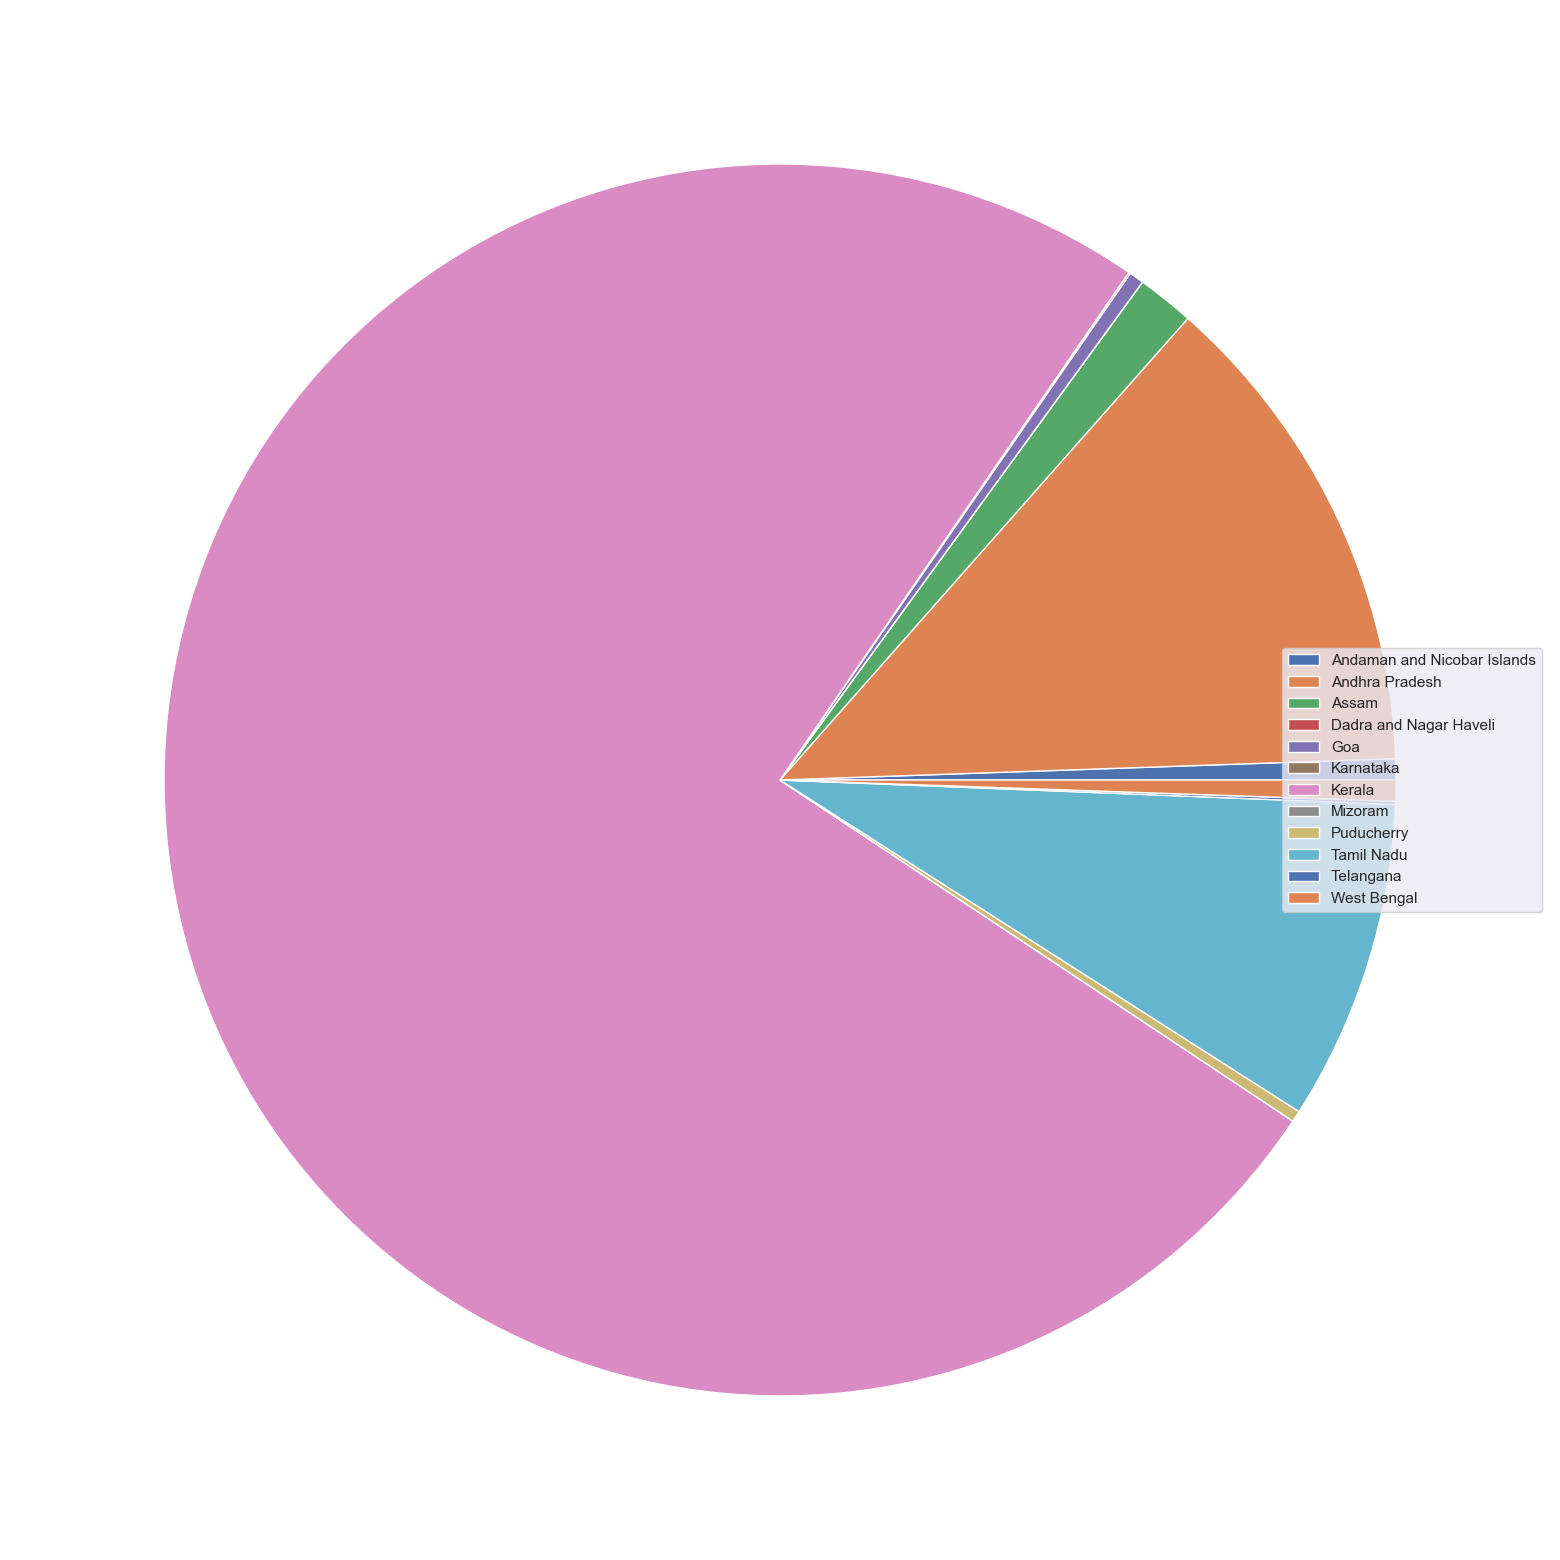

In [141]:
plt.figure(figsize=(25,20))
plt.pie(x=coco_per_df["percentage"])
plt.legend(labels=coco_per_df.State_Name,loc='right')
plt.show()

## Coconut Overview
1. Coconut farming is year-round and not only permitted during certain seasons.
2. Top producing states for coconuts include Kerala, Andhra Pradesh, and Tamil Nadu.
3. The top three districts producing coconuts are KOZHIKODE (11.75%), MALAPPURAM (11.16%), and THIRUVANANTHAPURAM (7.7%).
4. Yearly coconut production is robust and expanding healthfully.
5. The area under cultivation directly correlates with high coconut cultivation.
6. Coconut production increased along the years abundantly.